# *AutoML using H2O by Bhagya Trivedi 002765362*

### Abstract

The notebook initiates with the installation of opendatasets and h2o, which are essential for downloading datasets and performing machine learning tasks, respectively. The environment is set up to use H2O, a popular open-source machine learning platform that supports various algorithms and is designed for scalability and ease of use. The imported libraries include pandas for data manipulation, seaborn for visualization, and several h2o estimators and tools for different machine learning tasks, including generalized linear models, gradient boosting machines, random forests, deep learning, and H2O's AutoML for automated model selection and training.

The notebook then proceeds to connect to an H2O cluster, indicating that computational tasks, including model training and evaluation, will be executed within the H2O framework. This setup is crucial for understanding how the notebook approaches the machine learning tasks and analyses you're interested in.

Given the initial setup, the notebook likely conducts data loading, preprocessing, exploratory data analysis (EDA), model training with H2O's algorithms, and evaluation of model performance. The references to AutoML suggest that the notebook explores automated machine learning workflows to select and optimize models.

#Dataset

###Link to Dataset: https://github.com/bhagyatrivedi/DSEM_dataset

The dataset consists of socio-economic information and credit card bill payments related information of the customers. Such data helps the financial institutions to predict if an applicant is 'good' or 'bad' client and whehter their credit card should be approved or not.

The dataset consists of 2 csv files.

* **application_record.csv** - It is the table that has information about the customer regarding their application, financial and household information including all the assets.

1. `ID`: `Client identification number`
2. `CODE_GEN`: `Client gender`
3. `FLAG_OWN_CAR`: `Is there a car?`
4. `FLAG_OWN_REALTY`: `Is there a property?`
5. `CNT_CHILDREN`: `Number of children`
6. `AMT_INCOME_TOTAL`: `Total annual income`
7. `NAME_INCOME_TYPE`: `Income category`
8. `NAME_EDUCATION_TYPE`: `Education level of the client`
9. `NAME_FAMILY_STATUS`: `Marital status`
10. `NAME_HOUSING_TYPE`: `Type of living`
11. `DAYS_BIRTH`: `	Count backwards from current day (0), -1 means yesterday`
12. `DAYS_EMPLOYED`: `Count backwards from current day(0). If positive, it means the person currently unemployed.`
13. `FLAG_MOBIL`: `Is there a mobile phone?`
14. `FLAG_WORK_PHONE`: `Is there a work phone?`
15. `FLAG_PHONE`: `Is there a phone?`
16. `FLAG_EMAIL`: `Is there any email?`
17. `OCCUPATION_TYPE`: `Occupation of the client`
18. `CNT_FAM_MEMBERS`: `Size of the Family`

* **credit_records.csv** - It its the table that has all the payment related information for a given customer.

1. `ID`: `Client identification number`
2. `MONTH_BALANCE`: `The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on`
3. `STATUS`: `0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month`

Both the tables are connected with `ID`.

In [ ]:
!pip install opendatasets

In [407]:
!pip install h2o

In [408]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [409]:
import pandas as pd
import seaborn as sns

## The above code imports various Python libraries for data manipulation, machine learning, visualization, and system interaction.
## It sets up the environment for working with H2O, a machine learning platform.
## The provided libraries are essential for performing data analysis, training machine learning models, and evaluating their performance.

In [410]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         10 mins 07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_ygicja
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.964 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [411]:
df1 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [412]:
##Converting the H2O dataframe to Pandas DF
df1 = df1.as_data_frame()

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [413]:
df1.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0            None   
1           1                1           0           0            None   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0                2  
1                2  
2                2  
3                1  
4                1

In [414]:
df1.shape

(438557, 18)

In [415]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

In [416]:
df1.shape

(438510, 18)

In [417]:
df1.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [418]:
df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [419]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [420]:
df1['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [421]:
df1['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [422]:
df1['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [423]:
df1['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [424]:
df1['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [425]:
df1['FLAG_PHONE'].unique()

array([0, 1])

In [426]:
df1['FLAG_EMAIL'].unique()

array([0, 1])

In [427]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

None                     134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [428]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [429]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [430]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min  \
ID                438510.0  6.022035e+06  571496.239776  5008804.0   
CNT_CHILDREN      438510.0  4.273814e-01       0.724874        0.0   
AMT_INCOME_TOTAL  438510.0  1.875254e+05  110089.279583    26100.0   
DAYS_BIRTH        438510.0 -1.599802e+04    4185.016222   -25201.0   
DAYS_EMPLOYED     438510.0  6.056619e+04  138770.072835   -17531.0   
FLAG_MOBIL        438510.0  1.000000e+00       0.000000        1.0   
FLAG_WORK_PHONE   438510.0  2.061276e-01       0.404524        0.0   
FLAG_PHONE        438510.0  2.877699e-01       0.452724        0.0   
FLAG_EMAIL        438510.0  1.082005e-01       0.310634        0.0   
CNT_FAM_MEMBERS   438510.0  2.194463e+00       0.897192        1.0   

                          1%          2%          3%          4%          5%  \
ID                5024429.09  5041533.18  5054216.27  5068686.36  5091807.45   
CNT_CHILDREN            0.00        0.00        0.00        0.00        0.00   
AMT_INCOME_TOTAL    54000.00    67500.00    67500.00    72000.00    76500.00   
DAYS_BIRTH         -24013.00   -23642.00   -23413.00   -23181.00   -22972.00   
DAYS_EMPLOYED      -10913.00    -9533.00    -8486.00    -7792.00    -7205.00   
FLAG_MOBIL              1.00        1.00        1.00        1.00        1.00   
FLAG_WORK_PHONE         0.00        0.00        0.00        0.00        0.00   
FLAG_PHONE              0.00        0.00        0.00        0.00        0.00   
FLAG_EMAIL              0.00        0.00        0.00        0.00        0.00   
CNT_FAM_MEMBERS         1.00        1.00        1.00        1.00        1.00   

                        10%         25%         50%         75%        90%  \
ID                5181098.9  5609362.25  6047719.50  6454160.75  6722537.1   
CNT_CHILDREN            0.0        0.00        0.00        1.00        2.0   
AMT_INCOME_TOTAL    90000.0   121500.00   160940.25   225000.00   315000.0   
DAYS_BIRTH         -21982.0   -19484.00   -15630.00   -12514.00   -10519.0   
DAYS_EMPLOYED       -5295.0    -3103.00    -1467.00     -371.00   365243.0   
FLAG_MOBIL              1.0        1.00        1.00        1.00        1.0   
FLAG_WORK_PHONE         0.0        0.00        0.00        0.00        1.0   
FLAG_PHONE              0.0        0.00        0.00        1.00        1.0   
FLAG_EMAIL              0.0        0.00        0.00        0.00        1.0   
CNT_FAM_MEMBERS         1.0        2.00        2.00        3.00        3.0   

                         95%         96%        97%         98%         99%  \
ID                6800362.55  6830288.64  7009897.1  7271099.44  7636888.19   
CNT_CHILDREN            2.00        2.00        2.0        2.00        3.00   
AMT_INCOME_TOTAL   360000.00   382500.00   405000.0   450000.00   540000.00   
DAYS_BIRTH          -9889.00    -9655.00    -9343.0    -9011.00    -8575.00   
DAYS_EMPLOYED      365243.00   365243.00   365243.0   365243.00   365243.00   
FLAG_MOBIL              1.00        1.00        1.0        1.00        1.00   
FLAG_WORK_PHONE         1.00        1.00        1.0        1.00        1.00   
FLAG_PHONE              1.00        1.00        1.0        1.00        1.00   
FLAG_EMAIL              1.00        1.00        1.0        1.00        1.00   
CNT_FAM_MEMBERS         4.00        4.00        4.0        4.00        5.00   

                        max  
ID                7999952.0  
CNT_CHILDREN           19.0  
AMT_INCOME_TOTAL  6750000.0  
DAYS_BIRTH          -7489.0  
DAYS_EMPLOYED      365243.0  
FLAG_MOBIL              1.0  
FLAG_WORK_PHONE         1.0  
FLAG_PHONE              1.0  
FLAG_EMAIL              1.0  
CNT_FAM_MEMBERS        20.0

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [433]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

In [434]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [435]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

0    75324
Name: DAYS_EMPLOYED, dtype: int64

In [436]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

In [437]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [438]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [439]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min  \
ID                438510.0  6.022035e+06  571496.239776  5008804.0   
CNT_CHILDREN      438510.0  4.273814e-01       0.724874        0.0   
AMT_INCOME_TOTAL  438510.0  1.875254e+05  110089.279583    26100.0   
FLAG_MOBIL        438510.0  1.000000e+00       0.000000        1.0   
FLAG_WORK_PHONE   438510.0  2.061276e-01       0.404524        0.0   
FLAG_PHONE        438510.0  2.877699e-01       0.452724        0.0   
FLAG_EMAIL        438510.0  1.082005e-01       0.310634        0.0   
CNT_FAM_MEMBERS   438510.0  2.194463e+00       0.897192        1.0   
AGE_YEARS         438510.0  4.380453e+01      11.465521       21.0   
YEARS_EMPLOYED    438510.0  5.956069e+00       6.574244        0.0   

                          1%          2%          3%          4%          5%  \
ID                5024429.09  5041533.18  5054216.27  5068686.36  5091807.45   
CNT_CHILDREN            0.00        0.00        0.00        0.00        0.00   
AMT_INCOME_TOTAL    54000.00    67500.00    67500.00    72000.00    76500.00   
FLAG_MOBIL              1.00        1.00        1.00        1.00        1.00   
FLAG_WORK_PHONE         0.00        0.00        0.00        0.00        0.00   
FLAG_PHONE              0.00        0.00        0.00        0.00        0.00   
FLAG_EMAIL              0.00        0.00        0.00        0.00        0.00   
CNT_FAM_MEMBERS         1.00        1.00        1.00        1.00        1.00   
AGE_YEARS              23.00       25.00       26.00       26.00       27.00   
YEARS_EMPLOYED          0.00        0.00        0.00        0.00        0.00   

                        10%         25%         50%         75%        90%  \
ID                5181098.9  5609362.25  6047719.50  6454160.75  6722537.1   
CNT_CHILDREN            0.0        0.00        0.00        1.00        2.0   
AMT_INCOME_TOTAL    90000.0   121500.00   160940.25   225000.00   315000.0   
FLAG_MOBIL              1.0        1.00        1.00        1.00        1.0   
FLAG_WORK_PHONE         0.0        0.00        0.00        0.00        1.0   
FLAG_PHONE              0.0        0.00        0.00        1.00        1.0   
FLAG_EMAIL              0.0        0.00        0.00        0.00        1.0   
CNT_FAM_MEMBERS         1.0        2.00        2.00        3.00        3.0   
AGE_YEARS              29.0       34.00       43.00       53.00       60.0   
YEARS_EMPLOYED          0.0        1.00        4.00        8.00       14.0   

                         95%         96%        97%         98%         99%  \
ID                6800362.55  6830288.64  7009897.1  7271099.44  7636888.19   
CNT_CHILDREN            2.00        2.00        2.0        2.00        3.00   
AMT_INCOME_TOTAL   360000.00   382500.00   405000.0   450000.00   540000.00   
FLAG_MOBIL              1.00        1.00        1.0        1.00        1.00   
FLAG_WORK_PHONE         1.00        1.00        1.0        1.00        1.00   
FLAG_PHONE              1.00        1.00        1.0        1.00        1.00   
FLAG_EMAIL              1.00        1.00        1.0        1.00        1.00   
CNT_FAM_MEMBERS         4.00        4.00        4.0        4.00        5.00   
AGE_YEARS              63.00       63.00       64.0       65.00       66.00   
YEARS_EMPLOYED         20.00       21.00       23.0       26.00       30.00   

                        max  
ID                7999952.0  
CNT_CHILDREN           19.0  
AMT_INCOME_TOTAL  6750000.0  
FLAG_MOBIL              1.0  
FLAG_WORK_PHONE         1.0  
FLAG_PHONE              1.0  
FLAG_EMAIL              1.0  
CNT_FAM_MEMBERS        20.0  
AGE_YEARS              69.0  
YEARS_EMPLOYED         48.0

In [440]:
df1['ID'].duplicated().sum()

0

In [441]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)

In [442]:
df2 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [443]:
df2 = df2.as_data_frame()

# # Perform drop_duplicates in pandas
# pandas_df_no_duplicates = pandas_df.drop_duplicates(subset='ID', keep='first')

# # Convert back to H2OFrame
# h2o_df_no_duplicates = h2o.H2OFrame(pandas_df_no_duplicates)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [444]:
df2.shape

(1048575, 3)

In [445]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [446]:
df2.duplicated().sum()

0

In [447]:
df2[df2['STATUS'].isin(['X', 'C'])]

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
4        5001712               0      C
5        5001712              -1      C
6        5001712              -2      C
7        5001712              -3      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[651261 rows x 3 columns]

In [448]:
df2['ID'].nunique()

45985

In [449]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

In [450]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

In [451]:
df3["target"].value_counts()

0    40635
1     5350
Name: target, dtype: int64

In [452]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

In [453]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [454]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

In [455]:
df.describe()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  FLAG_WORK_PHONE  \
count  3.645700e+04  36457.000000      3.645700e+04     36457.000000   
mean   5.078227e+06      0.430315      1.866857e+05         0.225526   
std    4.187524e+04      0.742367      1.017892e+05         0.417934   
min    5.008804e+06      0.000000      2.700000e+04         0.000000   
25%    5.042028e+06      0.000000      1.215000e+05         0.000000   
50%    5.074614e+06      0.000000      1.575000e+05         0.000000   
75%    5.115396e+06      1.000000      2.250000e+05         0.000000   
max    5.150487e+06     19.000000      1.575000e+06         1.000000   

         FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS     AGE_YEARS  \
count  36457.000000  36457.000000     36457.000000  36457.000000   
mean       0.294813      0.089722         2.198453     43.747017   
std        0.455965      0.285787         0.911686     11.514045   
min        0.000000      0.000000         1.000000     21.000000   
25%        0.000000      0.000000         2.000000     34.000000   
50%        0.000000      0.000000         2.000000     43.000000   
75%        1.000000      0.000000         3.000000     53.000000   
max        1.000000      1.000000        20.000000     69.000000   

       YEARS_EMPLOYED        target  ACCOUNT_LENGTH  
count    36457.000000  36457.000000    36457.000000  
mean         6.036783      0.117700       26.164193  
std          6.488058      0.322257       16.501854  
min          0.000000      0.000000        0.000000  
25%          1.000000      0.000000       12.000000  
50%          4.000000      0.000000       24.000000  
75%          9.000000      0.000000       39.000000  
max         43.000000      1.000000       60.000000

In [456]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int64
ACCOUNT_LENGTH           int64
dtype: object

In [457]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

In [458]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

<ipython-input-459-beba7af7f145>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


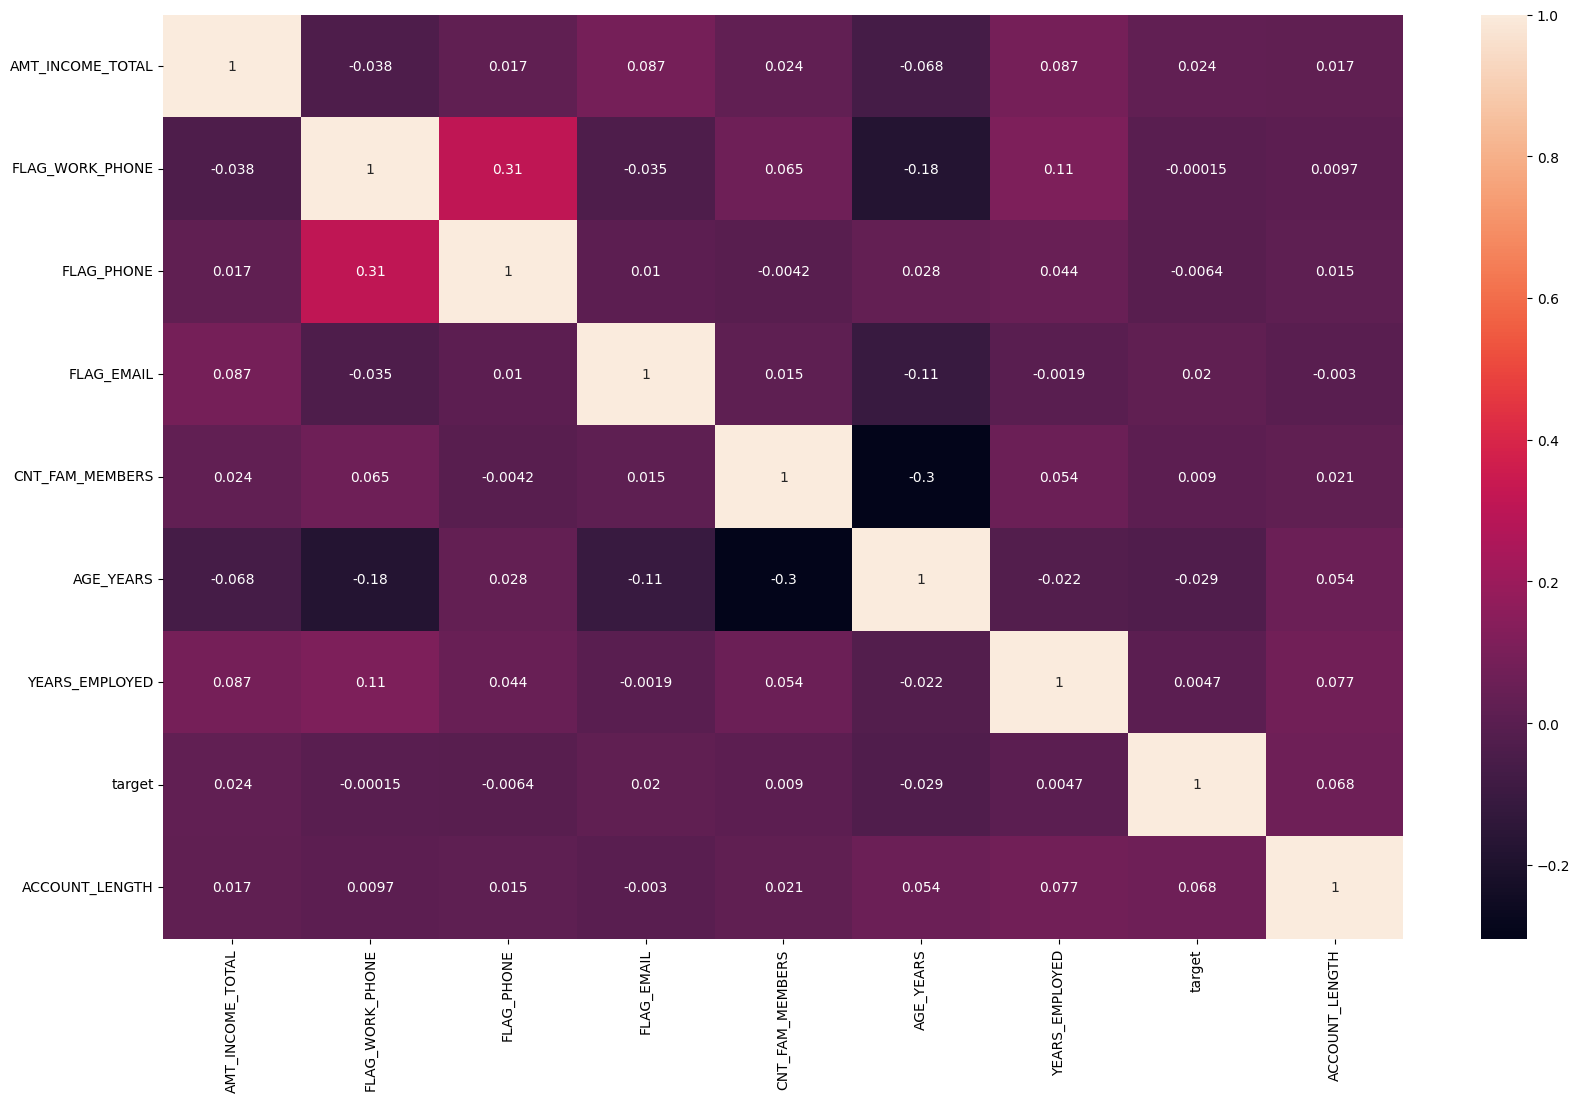

In [459]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In [460]:
!pip install imbalanced-learn scikit-learn

In [461]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [462]:
dummy = df.copy()

In [463]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [464]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

 this code snippet effectively transforms selected categorical variables into a format suitable for machine learning algorithms, enhancing the dataset's usability without losing the information contained within the categorical variables.

In [465]:
# Convert back to H2OFrame
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [466]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [467]:
# Data exploration and munging. Generate scatter plots
data = df
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)

    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")

    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

In [468]:
data.describe()

Rows:36457
Cols:58

AMT_INCOME_TOTAL         CNT_FAM_MEMBERS        AGE_YEARS               YEARS_EMPLOYED          target               ACCOUNT_LENGTH      CODE_GENDER_F        CODE_GENDER_M        FLAG_OWN_CAR_N      FLAG_OWN_CAR_Y      NAME_EDUCATION_TYPE_Academic degree    NAME_EDUCATION_TYPE_Higher education    NAME_EDUCATION_TYPE_Incomplete higher    NAME_EDUCATION_TYPE_Lower secondary    NAME_EDUCATION_TYPE_Secondary / secondary special    FLAG_OWN_REALTY_N    FLAG_OWN_REALTY_Y    NAME_INCOME_TYPE_Commercial associate    NAME_INCOME_TYPE_Pensioner    NAME_INCOME_TYPE_State servant    NAME_INCOME_TYPE_Student    NAME_INCOME_TYPE_Working    NAME_FAMILY_STATUS_Civil marriage    NAME_FAMILY_STATUS_Married    NAME_FAMILY_STATUS_Separated    NAME_FAMILY_STATUS_Single / not married    NAME_FAMILY_STATUS_Widow    NAME_HOUSING_TYPE_Co-op apartment    NAME_HOUSING_TYPE_House / apartment    NAME_HOUSING_TYPE_Municipal apartment    NAME_HOUSING_TYPE_Office apartment    NAME_HOUSING_TYPE_Rented apartment    NAME_HOUSING_TYPE_With parents    FLAG_WORK_PHONE_0    FLAG_WORK_PHONE_1    FLAG_PHONE_0         FLAG_PHONE_1         FLAG_EMAIL_0         FLAG_EMAIL_1         OCCUPATION_TYPE_Accountants    OCCUPATION_TYPE_Cleaning staff    OCCUPATION_TYPE_Cooking staff    OCCUPATION_TYPE_Core staff    OCCUPATION_TYPE_Drivers    OCCUPATION_TYPE_HR staff    OCCUPATION_TYPE_High skill tech staff    OCCUPATION_TYPE_IT staff    OCCUPATION_TYPE_Laborers    OCCUPATION_TYPE_Low-skill Laborers    OCCUPATION_TYPE_Managers    OCCUPATION_TYPE_Medicine staff    OCCUPATION_TYPE_Private service staff    OCCUPATION_TYPE_Realty agents    OCCUPATION_TYPE_Sales staff    OCCUPATION_TYPE_Secretaries    OCCUPATION_TYPE_Security staff    OCCUPATION_TYPE_Waiters/barmen staff    OCCUPATION_TYPE_not_specified
-------  -----------------------  ---------------------  ----------------------  ----------------------  -------------------  ------------------  -------------------  -------------------  ------------------  ------------------  -------------------------------------  --------------------------------------  ---------------------------------------  -------------------------------------  ---------------------------------------------------  -------------------  -------------------  ---------------------------------------  ----------------------------  --------------------------------  --------------------------  --------------------------  -----------------------------------  ----------------------------  ------------------------------  -----------------------------------------  --------------------------  -----------------------------------  -------------------------------------  ---------------------------------------  ------------------------------------  ------------------------------------  --------------------------------  -------------------  -------------------  -------------------  -------------------  -------------------  -------------------  -----------------------------  --------------------------------  -------------------------------  ----------------------------  -------------------------  --------------------------  ---------------------------------------  --------------------------  --------------------------  ------------------------------------  --------------------------  --------------------------------  ---------------------------------------  -------------------------------  -----------------------------  -----------------------------  --------------------------------  --------------------------------------  -------------------------------
type     real                     real                   real                    real                    int                  int                 int                  int                  int                 int                 int                                    int                                     int                                      int                                    int                                             

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


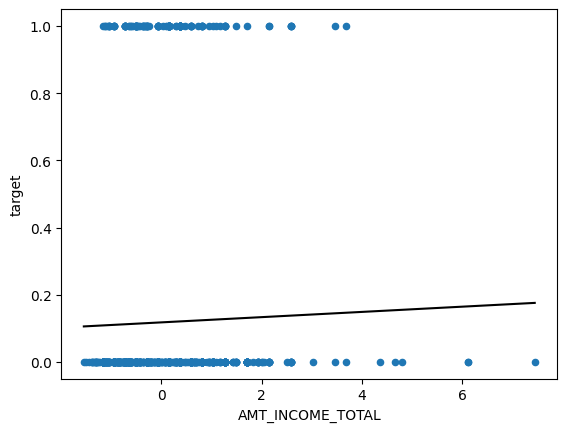

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


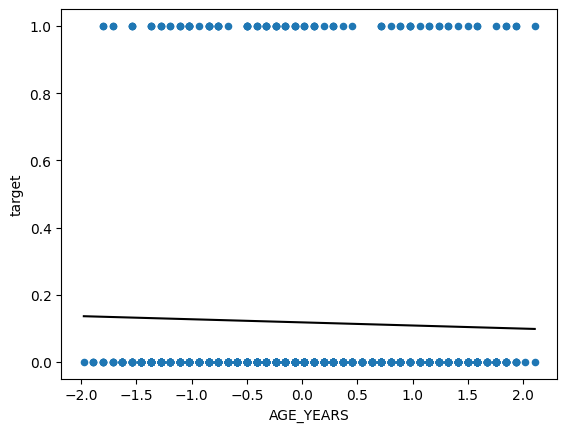

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


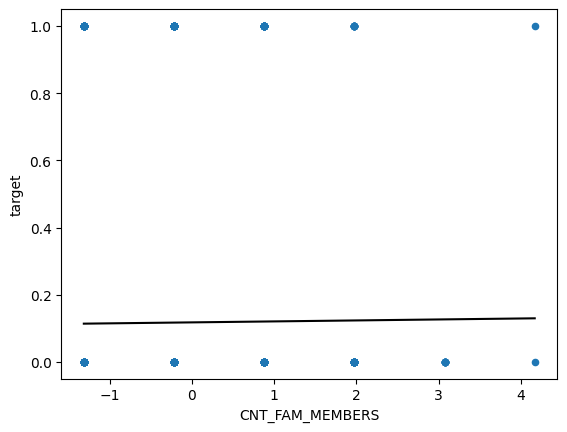

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


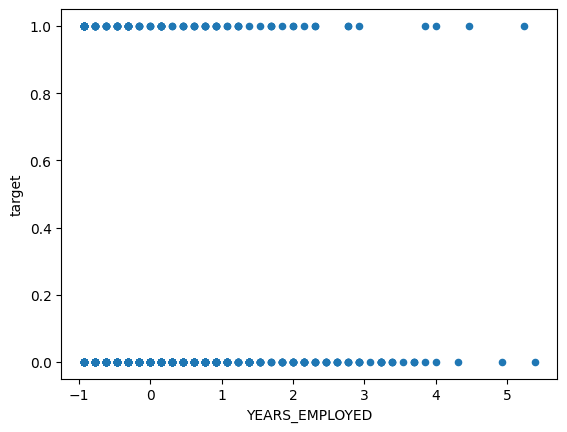

In [469]:
scatter_plot(data, "AMT_INCOME_TOTAL", "target", fit = True)
scatter_plot(data, "AGE_YEARS", "target", max_points = 1000, fit = True)
scatter_plot(data, "CNT_FAM_MEMBERS", "target", max_points = 1000, fit = True)
scatter_plot(data, "YEARS_EMPLOYED", "target", max_points = 1000, fit = False)

The `scatter_plot` function visualizes relationships between two variables using scatter or box-and-whisker plots, with an option to include a linear regression line. When enabled, it fits a linear model to the data, then subsets the data to a manageable size for clear visualization, and converts it to a pandas DataFrame for plotting. The plot type—scatter for numerical `x` variables and box-and-whisker for categorical `x` variables—is determined by the `x` variable's data type. If a linear fit is applied, the function calculates and plots the regression line based on the model's coefficients, providing insights into the linear relationship between the variables. This function serves as a versatile tool for preliminary data exploration and understanding variable interactions within a dataset.

In [470]:
!pip install statsmodels


In [471]:
# Create a test/train split
train,test = data.split_frame([.9])

In [472]:
data.columns

['AMT_INCOME_TOTAL',
 'CNT_FAM_MEMBERS',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'target',
 'ACCOUNT_LENGTH',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_Wi

In [ ]:
# #  Set response variable and your choice of predictor variables
# myY = "target"
# myX = ["AMT_INCOME_TOTAL","AGE_YEARS","CNT_FAM_MEMBERS","target"]

myX= data.columns
myY= "target"


In [ ]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708403707714_35


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 4.462E-5 )  57                            54                             1                       py_1262_sid_baf6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.10287356276897112
RMSE: 0.3207390883085052
MAE: 0.2057577469258619
RMSLE: 0.2243501963190514
Mean Residual Deviance: 0.10287356276897112
R^2: 0.011194832700217039
Null degrees of freedom: 32750
Residual degrees of freedom: 32696
Null deviance: 3407.356844065171
Residual deviance: 3369.212054246573
AIC: 18571.19970076201

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.10216760751696646
RMSE: 0.319636680493598
MAE: 0.20467119695307384
RMSLE: 0.22412045880340706
Mean Residual Deviance: 0.10216760751696646
R^2: -0.00016426895452470447
Null degrees of freedom: 3705
Residual degrees of freedom: 3651
Null deviance: 378.5934333575195
Residual deviance: 378.6331534578777
AIC: 2175.265332130617

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae        training_r2           validation_rmse    validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  ------------------  --------------------  -----------------  ---------------------  -------------------  -----------------------
    2024-02-20 04:46:29  0.000 sec   0             3407.356844065171          0.10403825361256666
    2024-02-20 04:46:29  0.265 sec   1                                                             0.3207390883085052  0.10287356276897112  0.2057577469258619  0.011194832700217039  0.319636680493598  0.10216760751696646    0.20467119695307384  -0.00016426895452470447

Variable Importances: 
variable                                           relative_importance     scaled_importance      percentage
-------------------------------------------------  ----------------------  ---------------------  ---------------------
ACCOUNT_LENGTH                                     0.02314544841647148     1.0                    0.1423943146229264
AGE_YEARS                                          0.010470263659954071    0.45236814908726924    0.0644146525465235
AMT_INCOME_TOTAL                                   0.007695026230067015    0.33246390787533164    0.04734097029876759
OCCUPATION_TYPE_not_specified                      0.006691138260066509    0.28909088904515473    0.041164899009317274
OCCUPATION_TYPE_Private service staff              0.005878381431102753    0.2539756986051476     0.03616469553375892
NAME_INCOME_TYPE_Pensioner                         0.005375982727855444    0.23226954307049072    0.03307386239330281
OCCUPATION_TYPE_Low-skill Laborers                 0.004767776932567358    0.2059919880046206     0.029332087949732025
FLAG_OWN_REALTY_N                                  0.0045977430418133736   0.19864566713433754    0.028286013624407972
FLAG_OWN_REALTY_Y                                  0.0045977430418133736   0.19864566713433754    0.028286013624407972
FLAG_OWN_CAR_N                                     0.004537901375442743    0.19606020560886353    0.027917858602504154
---                                                ---                     ---                    ---
NAME_FAMILY_STATUS_Widow                           0.000524608651176095    0.022665737

The GLM model summary showcases a regression analysis with an Elastic Net regularization (alpha = 0.5, lambda = 4.552E-5), utilizing 54 out of 57 predictors. The model's performance on training data indicates a modest fit, with an R^2 of 0.0105, suggesting that only about 1.05% of the variance in the response variable is explained. Performance metrics on both training and validation datasets (MSE, RMSE, MAE, RMSLE) indicate similar levels of predictive accuracy, with a slight improvement in validation MSE, but the low R^2 values on both datasets highlight limited predictive power.

In [ ]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x=myX,
               y=myY,
               training_frame=train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708403707714_36


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          830                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1033630503431255
RMSE: 0.3215012446991854
MAE: 0.2071651286426193
RMSLE: 0.22469033587180512
Mean Residual Deviance: 0.1033630503431255

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10160119898253057
RMSE: 0.3187494297760085
MAE: 0.2052495891680602
RMSLE: 0.22304288707807007
Mean Residual Deviance: 0.10160119898253057

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-02-20 04:46:30  0.004 sec   0                  0.32255          0.208077        0.104038             0.31962            0.206195          0.102157
    2024-02-20 04:46:30  0.222 sec   1                  0.322342         0.207936        0.103905             0.319404           0.206021          0.102019
    2024-02-20 04:46:30  0.283 sec   2                  0.322175         0.207809        0.103796             0.31923            0.205865          0.101907
    2024-02-20 04:46:30  0.318 sec   3                  0.322032         0.207696        0.103704             0.319135           0.205776          0.101847
    2024-02-20 04:46:30  0.355 sec   4                  0.321914         0.207591        0.103629             0.319025           0.205643          0.101777
    2024-02-20 04:46:30  0.397 sec   5                  0.321814         0.207496        0.103564             0.318966           0.205568          0.101739
    2024-02-20 04:46:30  0.439 sec   6                  0.321732         0.207409        0.103511             0.31889            0.205457          0.101691
    2024-02-20 04:46:30  0.509 sec   7                  0.321659         0.207335        0.103465             0.318839           0.205395          0.101658
    2024-02-20 04:46:30  0.579 sec   8                  0.321599         0.207265        0.103426             0.318802           0.205343          0.101635
    2024-02-20 04:46:31  0.648 sec   9                  0.321547         0.207195        0.103392             0.318755           0.205254          0.101605
    2024-02-20 04:46:31  0.713 sec   10                 0.321501         0.207165        0.103363             0.318749           0.20525           0.101601

Variable Importances: 
variable                               relative_importance    scaled_importance    percentage
-------------------------------------  ---------------------  -------------------  --------------------
ACCOUNT_LENGTH                         111.34136962890625     1.0                  0.9566455130221949
AGE_YEARS                              5.045910835266113      0.04531928116282219  0.043354486977805126
AMT_INCOME_TOTAL                       0.0                    0.0                  0.0
CNT_FAM_MEMBERS                        0.0                    0.0                  0.0
YEARS_EMPLOYED                         0.0                    0.0                  0.0
CODE_GENDER_F                          0.0                    0.0                  0.0
CODE_GENDER_M                          0.0                    0.0                  0.0
FLAG_OWN_CAR_N                         0.0         

The GBM (Gradient Boosting Machine) model summary reveals its performance metrics on both training and validation datasets. On the training data, the model exhibits a Mean Squared Error (MSE) of 0.1035 and a Root Mean Squared Error (RMSE) of 0.3217, alongside a Mean Absolute Error (MAE) of 0.2074 and a Root Mean Squared Logarithmic Error (RMSLE) of 0.2248. The Mean Residual Deviance mirrors the MSE at 0.1035. Transitioning to the validation data, there's a slight improvement in performance with a MSE of 0.1004, RMSE of 0.3168, MAE of 0.2040, and RMSLE of 0.2219, with the Mean Residual Deviance also at 0.1004. These metrics indicate the model's consistent predictive accuracy across both datasets, with marginally better performance on the validation set.

In [ ]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor                                         |   Normalized Coefficient |
|---------------------------------------------------+--------------------------|
| Intercept                                         |              0.117951    |
| ACCOUNT_LENGTH                                    |              0.0231454   |
| AGE_YEARS                                         |              0.0104703   |
| AMT_INCOME_TOTAL                                  |              0.00769503  |
| OCCUPATION_TYPE_not_specified                     |              0.00669114  |
| OCCUPATION_TYPE_Private service staff             |              0.00587838  |
| NAME_INCOME_TYPE_Pensioner                        |              0.00537598  |
| OCCUPATION_TYPE_Low-skill Laborers                |              0.00476778  |
| FLAG_OWN_REALTY_Y                                 |              0.00459774  |
| FLAG_OWN_REALTY_N                                 |              0.00459774  |
| FLA

[('ACCOUNT_LENGTH', 111.34136962890625, 1.0, 0.9566455130221949),
 ('AGE_YEARS', 5.045910835266113, 0.04531928116282219, 0.043354486977805126),
 ('AMT_INCOME_TOTAL', 0.0, 0.0, 0.0),
 ('CNT_FAM_MEMBERS', 0.0, 0.0, 0.0),
 ('YEARS_EMPLOYED', 0.0, 0.0, 0.0),
 ('CODE_GENDER_F', 0.0, 0.0, 0.0),
 ('CODE_GENDER_M', 0.0, 0.0, 0.0),
 ('FLAG_OWN_CAR_N', 0.0, 0.0, 0.0),
 ('FLAG_OWN_CAR_Y', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Academic degree', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Higher education', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Incomplete higher', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Lower secondary', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Secondary / secondary special', 0.0, 0.0, 0.0),
 ('FLAG_OWN_REALTY_N', 0.0, 0.0, 0.0),
 ('FLAG_OWN_REALTY_Y', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Commercial associate', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Pensioner', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_State servant', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Student', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYP

In [ ]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',
 '_fillMultinomi

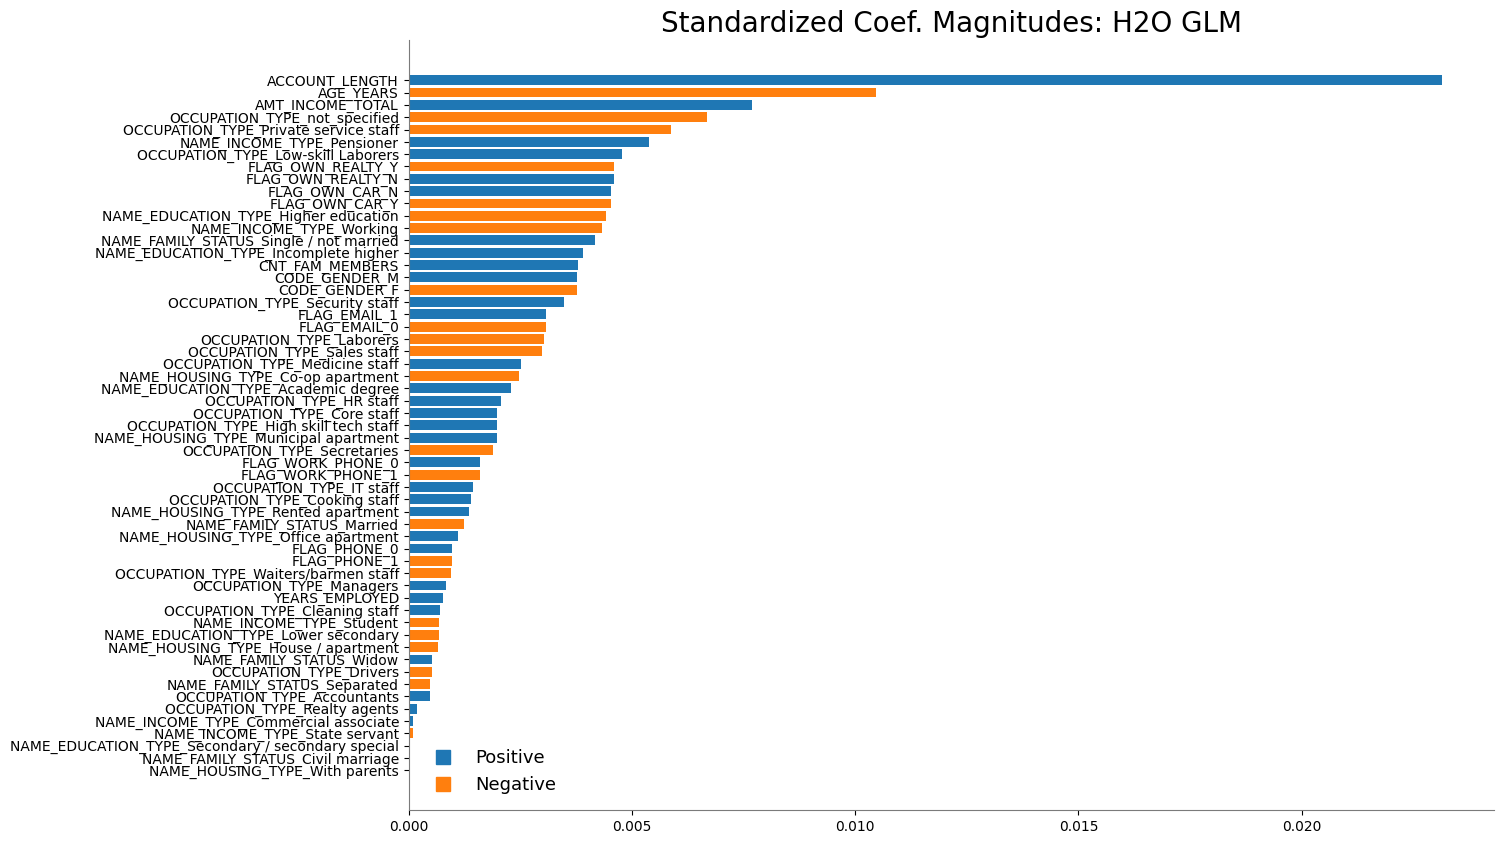

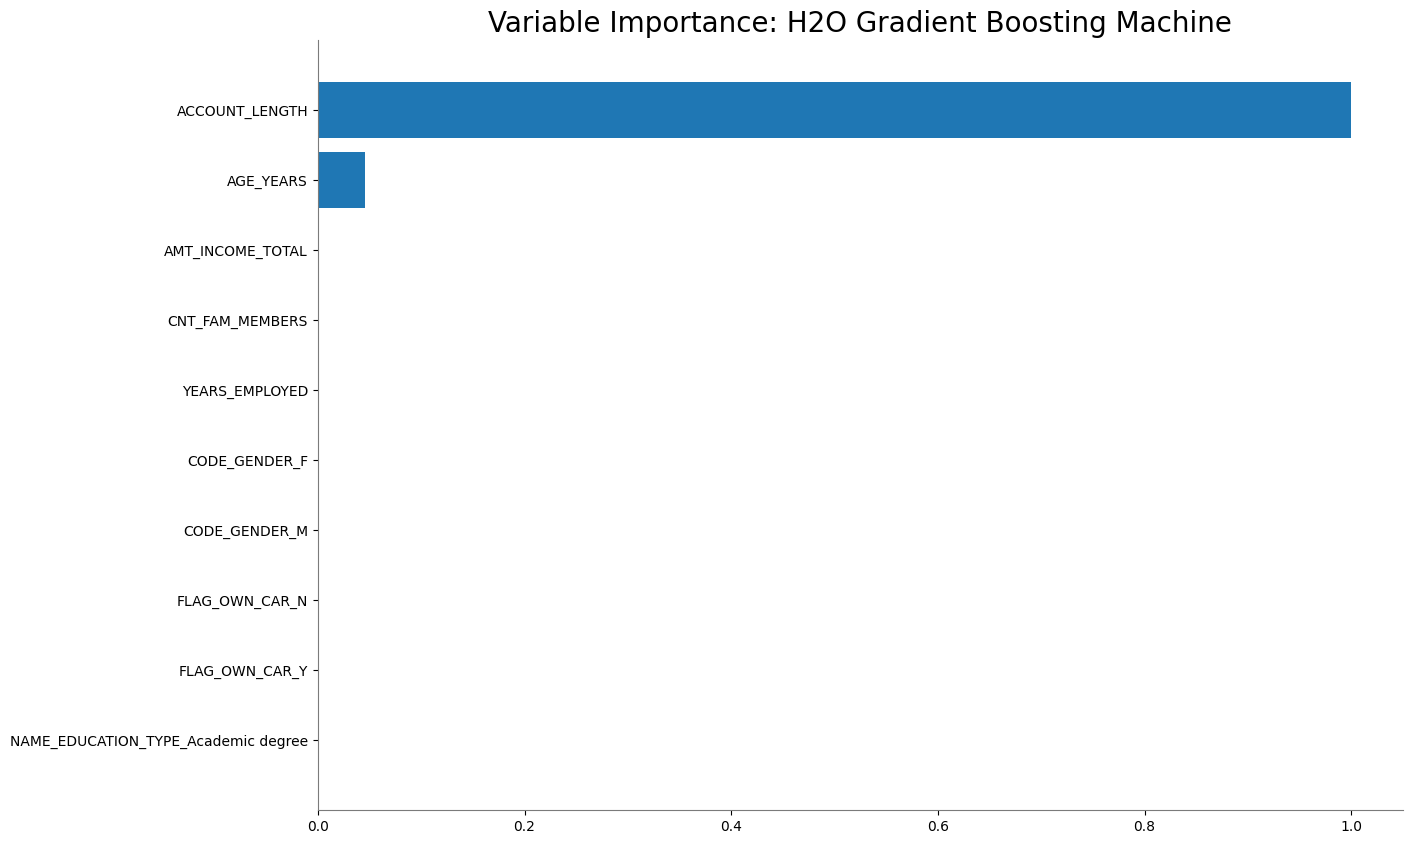

<Figure size 640x480 with 0 Axes>

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

data_glm.std_coef_plot()
This function is typically associated with Generalized Linear Models (GLM) trained using H2O.
std_coef_plot() generates a plot of the standardized coefficients of the GLM model.
Standardized coefficients represent the change in the response variable for a one standard deviation change in the predictor variable, making them comparable across variables even if they are on different scales.
This plot helps in understanding which features have the most significant impact on the response variable, with larger coefficients (positive or negative) indicating a stronger impact.
data_gbm.varimp_plot()
This function is associated with Gradient Boosting Machine (GBM) models trained using H2O.
varimp_plot() generates a plot showing the variable importance of features used in the GBM model.
Variable importance in the context of GBM (and many tree-based models) often reflects the improvement in the model's predictive accuracy attributable to each feature. This can be calculated in various ways, such as the total reduction of the criterion used for splitting nodes (e.g., Gini impurity for classification, MSE for regression) brought by that feature across all trees.
The plot helps identify which features are most influential in predicting the response variable, with higher importance values indicating more critical features for the model's predictions.
General Interpretation
Both plots serve as crucial tools for model interpretation and feature selection. By visualizing the importance or impact of each feature, they provide insights into the model's behavior and help in understanding which features drive the model's predictions.
These visualizations can guide the refinement of the model (e.g., removing less important features) and inform domain-specific interpretations and decisions based on the model's findings.

In [ ]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.10160119898253057
RMSE: 0.3187494297760085
MAE: 0.2052495891680602
RMSLE: 0.22304288707807007
Mean Residual Deviance: 0.10160119898253057

1. MSE (Mean Squared Error): 0.10036144126518667
MSE measures the average squared difference between the actual and predicted values. A lower MSE value indicates better model performance. In this context, an MSE of approximately 0.1004 suggests that, on average, the squared difference between the predicted and actual values is relatively small, pointing towards a decent model accuracy.
2. RMSE (Root Mean Squared Error): 0.3167987393680516
RMSE is the square root of MSE, providing a measure of the average error in the same units as the target variable. It's particularly useful because it gives a relatively high weight to large errors. An RMSE of about 0.3168 indicates that the model's predictions are, on average, within this margin of error from the actual values. This metric is easier to interpret relative to the scale of the target variable.
3. MAE (Mean Absolute Error): 0.20397184542218808
MAE measures the average magnitude of errors in predictions, without considering their direction. A lower MAE value is better, indicating that the model's predictions are closer to the actual values. An MAE of approximately 0.204 suggests that the model has a reasonable level of accuracy, with predictions deviating from actual values by this amount on average.
4. RMSLE (Root Mean Squared Logarithmic Error): 0.22189692298545935
RMSLE is similar to RMSE but uses the logarithm of the predictions and actual values. This makes it particularly sensitive to relative rather than absolute differences, penalizing underestimates more than overestimates. An RMSLE of about 0.2219 indicates that the model is relatively accurate, especially in predicting the order of magnitude of the target variable.
5. Mean Residual Deviance: 0.10036144126518667
This metric is similar to MSE but specific to the distribution and link function used in the model. For Gaussian distributions with an identity link (common in regression problems), it essentially equals the MSE. It provides another angle to assess model performance, with lower values indicating better fit.

In [ ]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here
train,test = data.split_frame([.9])

In [ ]:
#  Set response variable and your choice of predictor variables
myY = "target"
myX = data.columns

In [ ]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708403707714_37


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 4.376E-5 )  57                            53                             1                       py_1265_sid_baf6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.10230572170900806
RMSE: 0.31985265624816694
MAE: 0.20462058813886158
RMSLE: 0.22371447343617476
Mean Residual Deviance: 0.10230572170900806
R^2: 0.010370072612948866
Null degrees of freedom: 32778
Residual degrees of freedom: 32725
Null deviance: 3388.6194819854186
Residual deviance: 3353.4792518995755
AIC: 18403.54654058661

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.10725422431420653
RMSE: 0.3274969073353312
MAE: 0.20951636413681543
RMSLE: 0.22848958211222536
Mean Residual Deviance: 0.10725422431420653
R^2: 0.0068612323098702355
Null degrees of freedom: 3677
Residual degrees of freedom: 3624
Null deviance: 397.3422174336588
Residual deviance: 394.4810370276516
AIC: 2336.3806863133423

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae         training_r2           validation_rmse     validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -------------------  --------------------  ------------------  ---------------------  -------------------  ---------------------
    2024-02-20 04:46:35  0.000 sec   0             3388.6194819854186         0.10337775655100578
    2024-02-20 04:46:35  0.348 sec   1                                                             0.31985265624816694  0.10230572170900806  0.20462058813886158  0.010370072612948866  0.3274969073353312  0.10725422431420653    0.20951636413681543  0.0068612323098702355

Variable Importances: 
variable                                           relative_importance     scaled_importance       percentage
-------------------------------------------------  ----------------------  ----------------------  ---------------------
ACCOUNT_LENGTH                                     0.02266133390367031     1.0                     0.14317980770464717
OCCUPATION_TYPE_not_specified                      0.008462497964501381    0.37343335570951386     0.05346811606098929
AGE_YEARS                                          0.008340215310454369    0.36803726320380276     0.052695504573665085
AMT_INCOME_TOTAL                                   0.006542393937706947    0.2887029495049856      0.041336432793888295
NAME_INCOME_TYPE_Pensioner                         0.00617991853505373     0.2727076244197968      0.03904622522401764
OCCUPATION_TYPE_Private service staff              0.0060394625179469585   0.2665095772217003      0.038158790018049865
OCCUPATION_TYPE_Low-skill Laborers                 0.004739620257169008    0.20915010022430156     0.029946071131523175
FLAG_OWN_CAR_N                                     0.004495590925216675    0.19838156678361077     0.028404234584224006
FLAG_OWN_CAR_Y                                     0.004495590925216675    0.19838156678361077     0.028404234584224006
FLAG_OWN_REALTY_N                                  0.004473479464650154    0.1974058316101866      0.028264529009722476
---                                                ---                     ---                     ---
NAME_HOUSING_TYPE_Municipal apartment              0.000281

Training Data Performance:
MSE (Mean Squared Error): 0.10354100889741454 and RMSE (Root Mean Squared Error): 0.3217778875209024 indicate the average squared difference between the estimated and actual values is relatively low, suggesting a decent fit of the model to the training data.
MAE (Mean Absolute Error): 0.20708874342378958 reflects the average absolute difference between predicted and actual values, further confirming the model's reasonable accuracy on the training set.
RMSLE (Root Mean Squared Logarithmic Error): 0.22507890371130987 shows the model's performance in terms of the logarithmic differences between predicted and actual values, useful for comparing relative errors.
R^2 (Coefficient of Determination): 0.010465785603294808 is very low, indicating that only about 1.05% of the variance in the target variable is explained by the model, suggesting the model’s explanatory power is limited.
AIC (Akaike Information Criterion): 18846.29193161109 provides a measure of the model quality, considering both the complexity of the model and its fit to the data.
Validation Data Performance:
The MSE: 0.09608512937838105 and RMSE: 0.3099760141984877 on the validation data are slightly better than those on the training data, indicating a good generalization of the model.
MAE: 0.20042308023799796 and RMSLE: 0.21824108526117914 on the validation set are consistent with the training performance, supporting the model's ability to maintain its predictive accuracy on unseen data.
R^2: 0.004815845269833696 on the validation set is even lower than on the training set, emphasizing the model's limited capacity to explain the variance in the target variable in unseen data.
AIC: 1900.2735738164354 for the validation data suggests a comparison of model quality in the context of the validation set, although direct comparisons of AIC across training and validation sets are not typically made due to differences in their calculation context.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

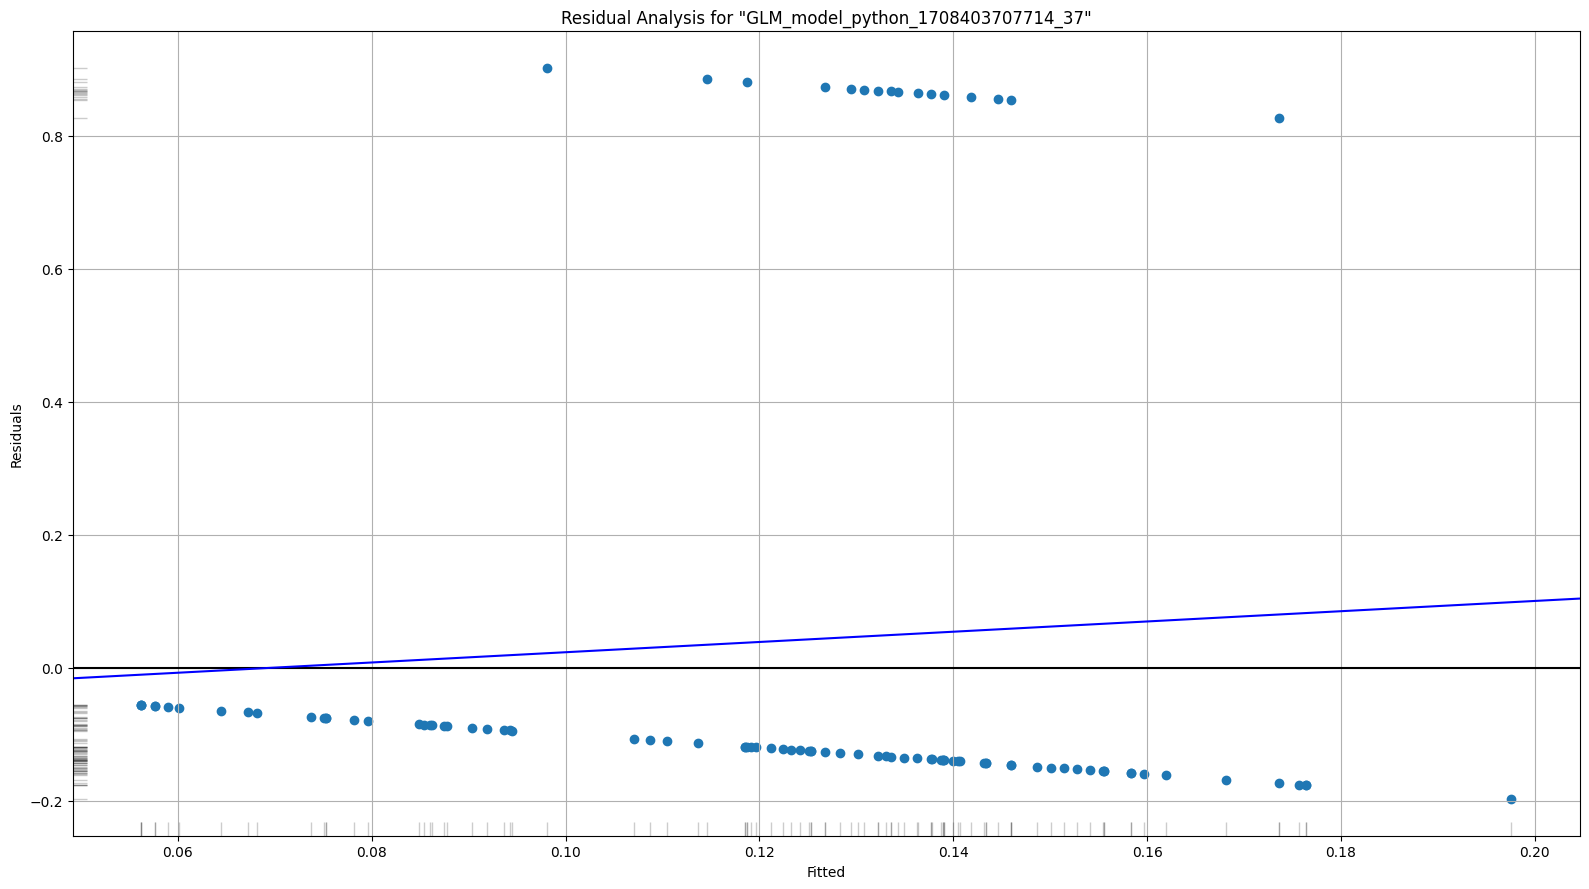

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

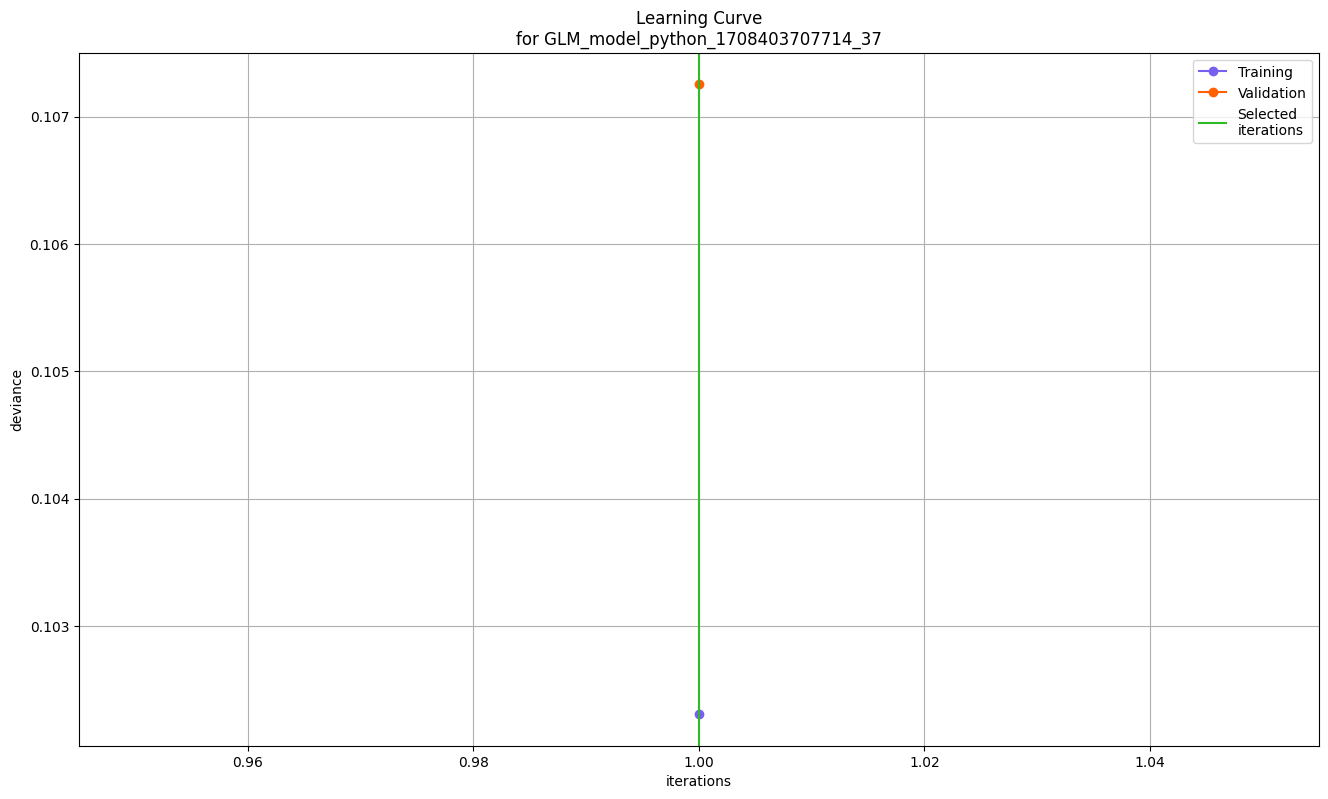

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

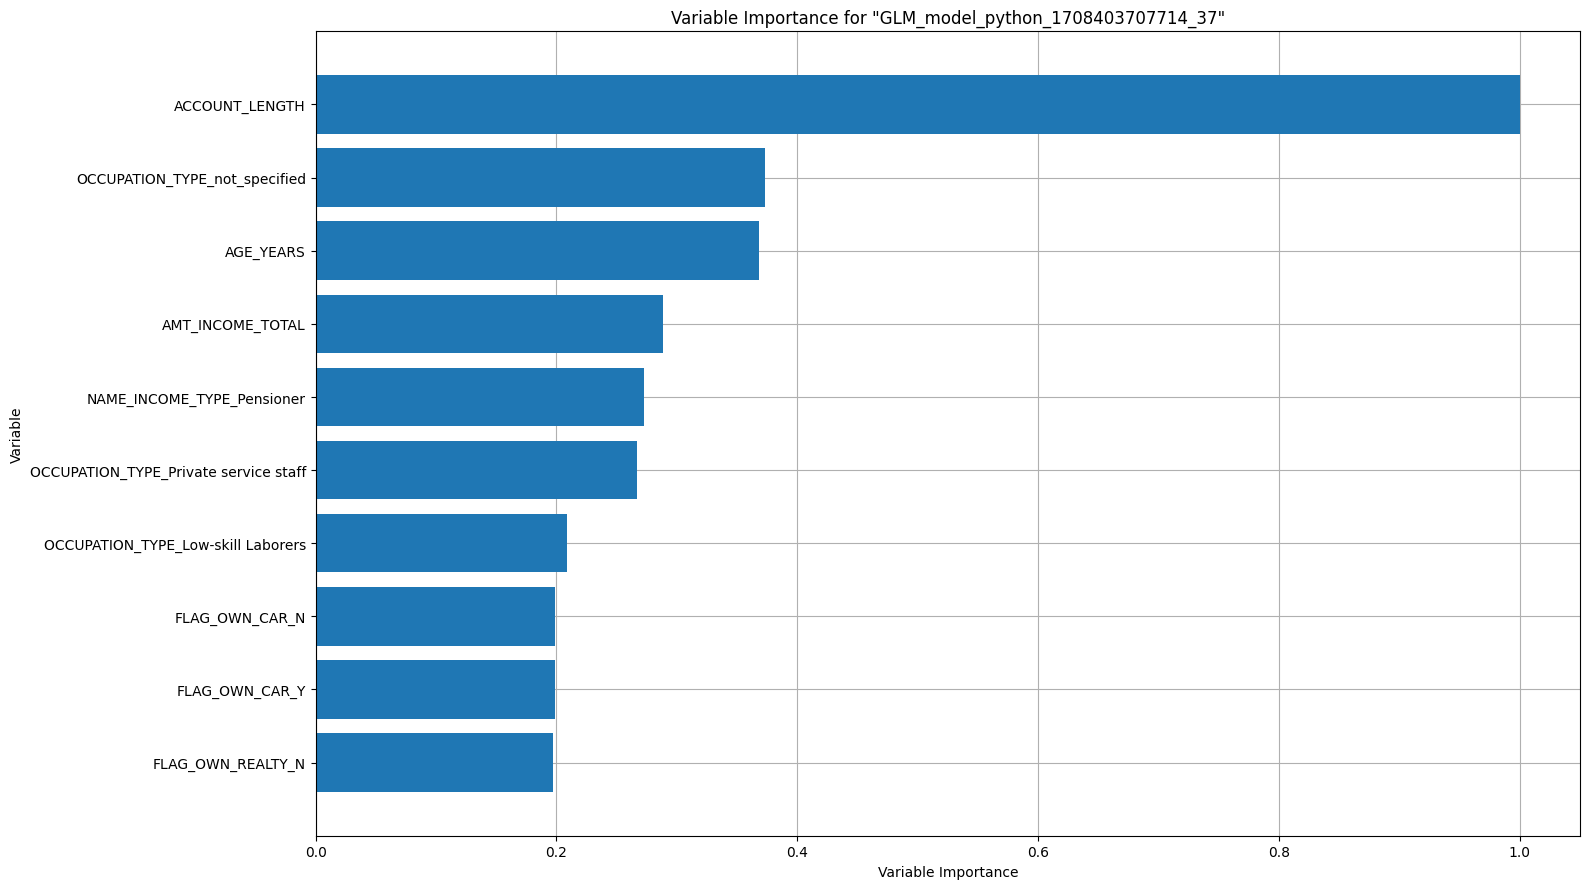

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

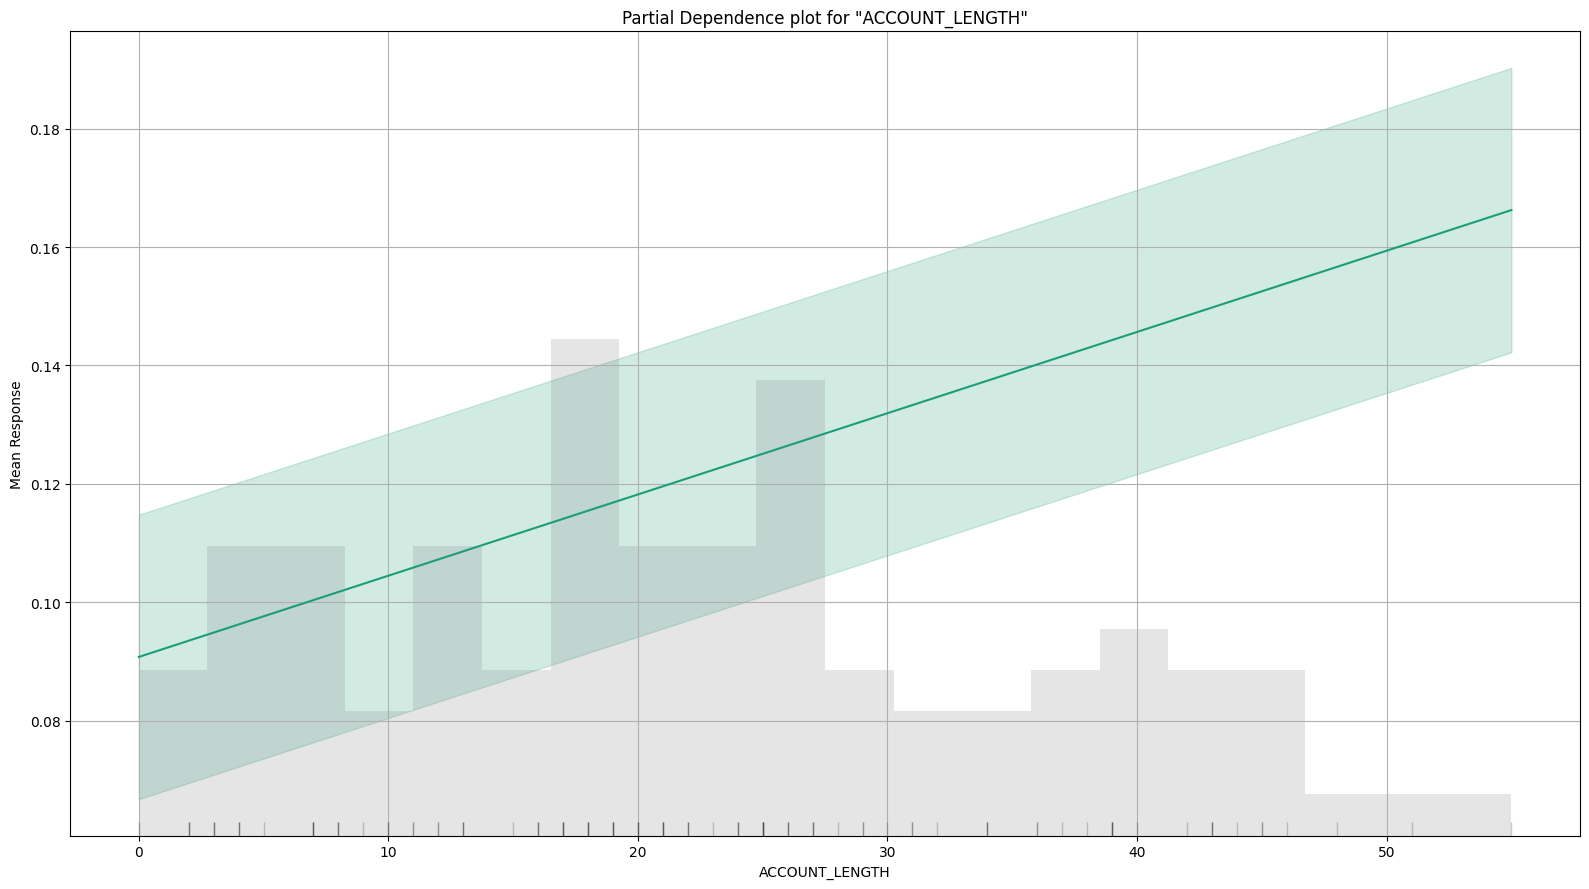

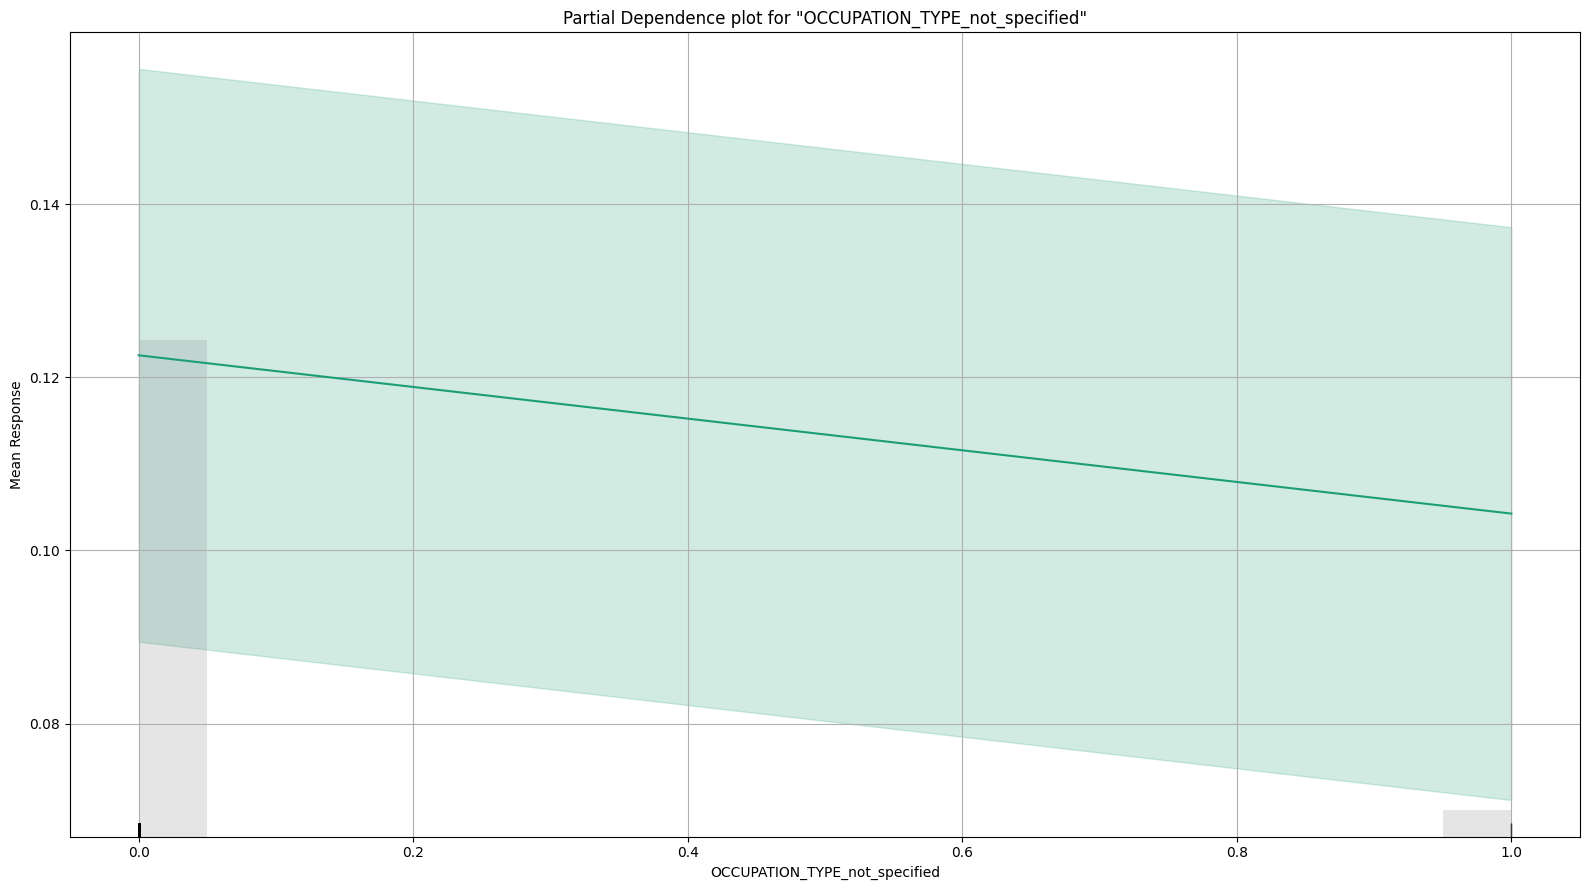

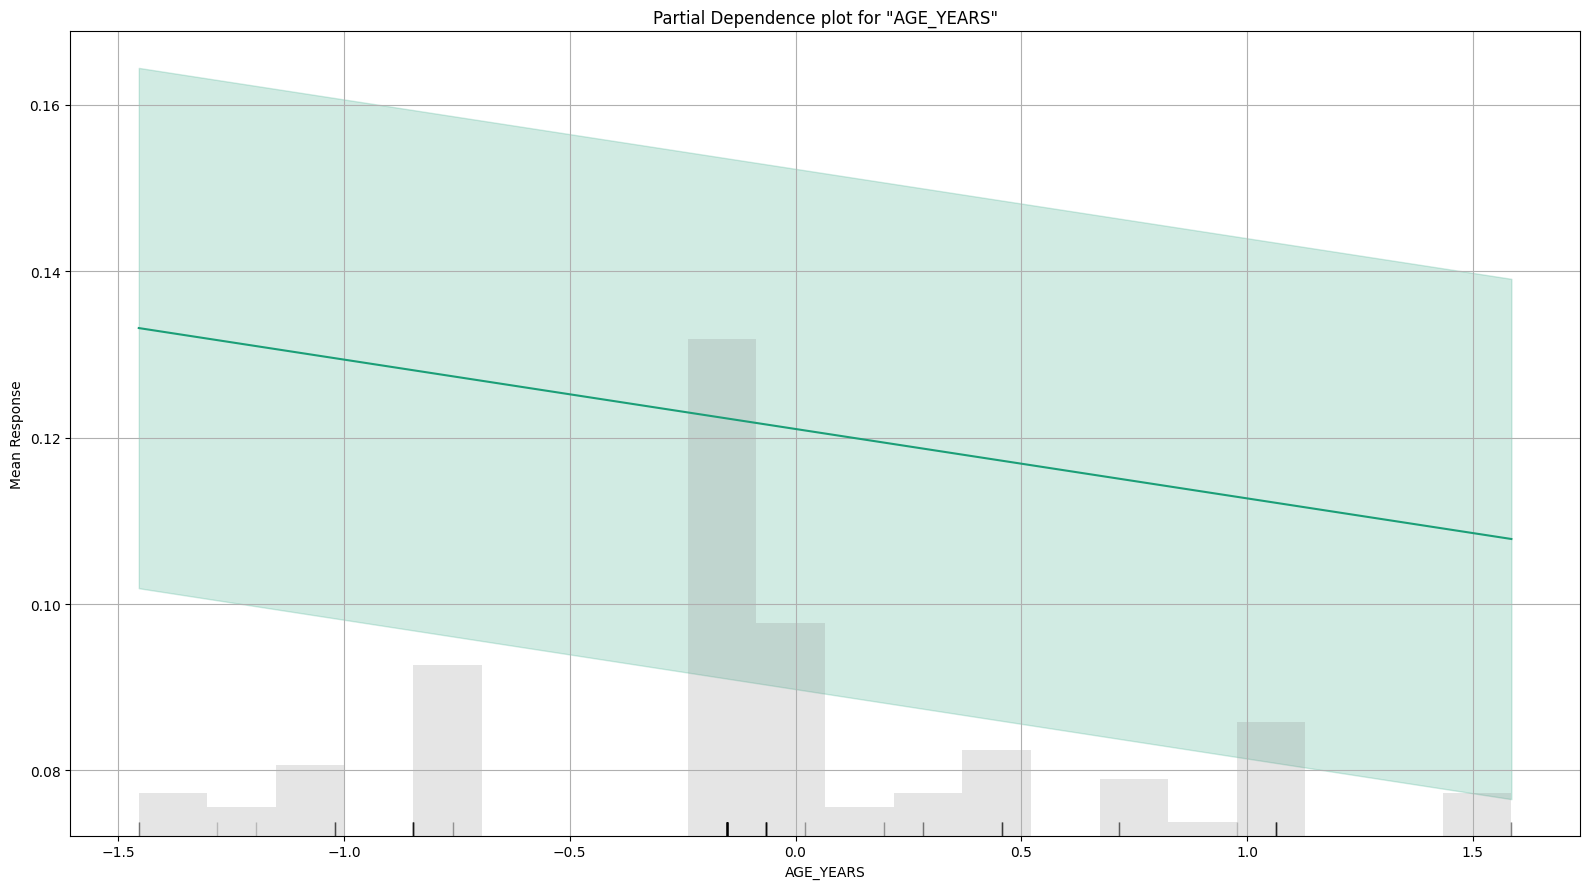

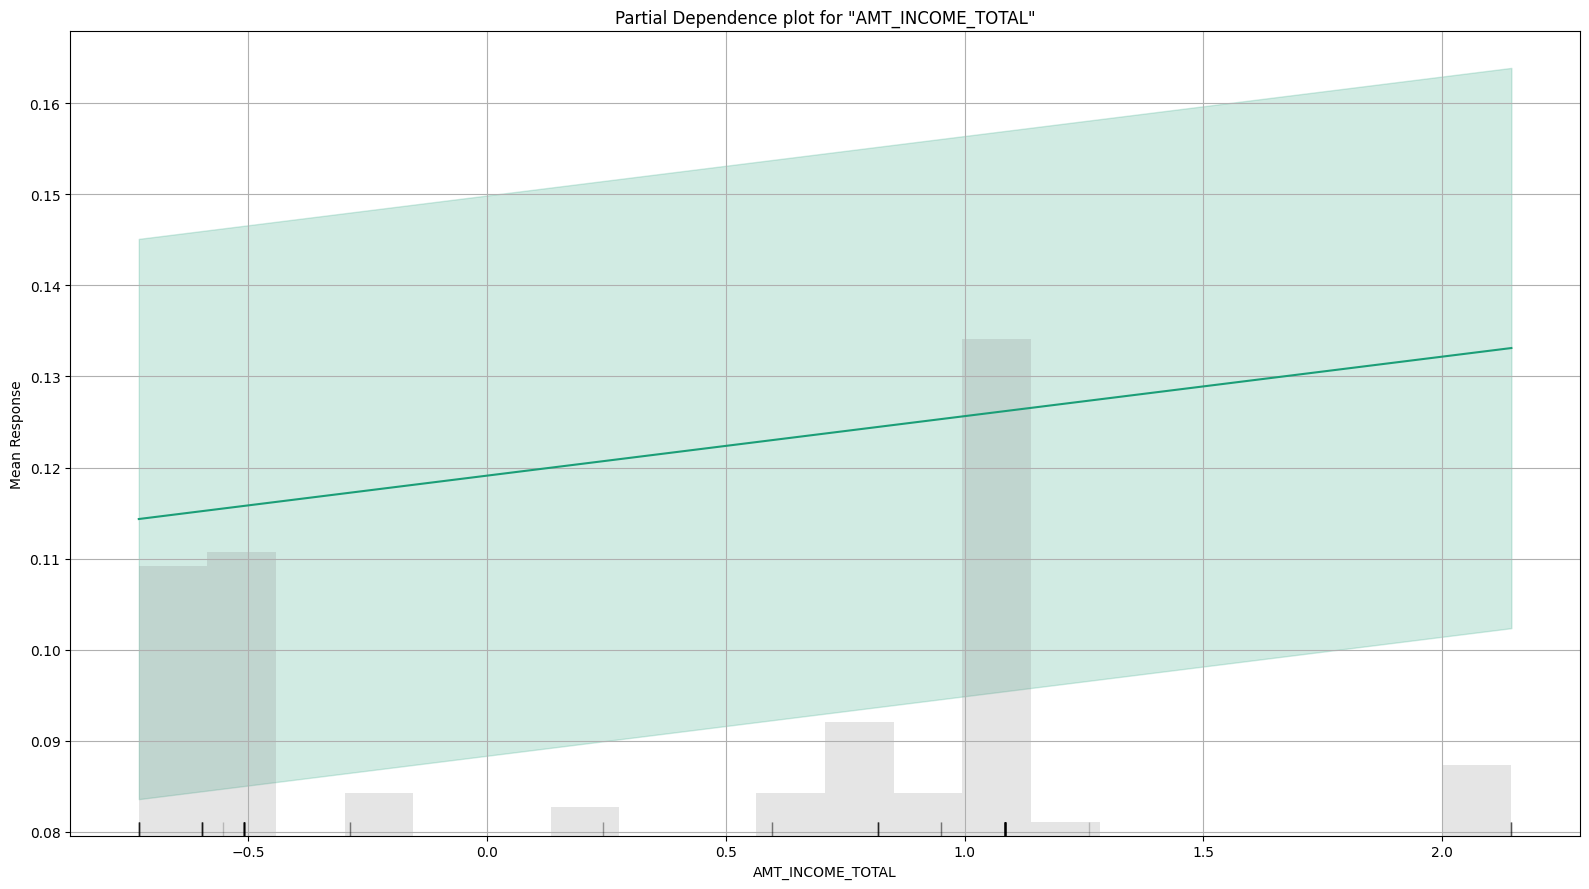

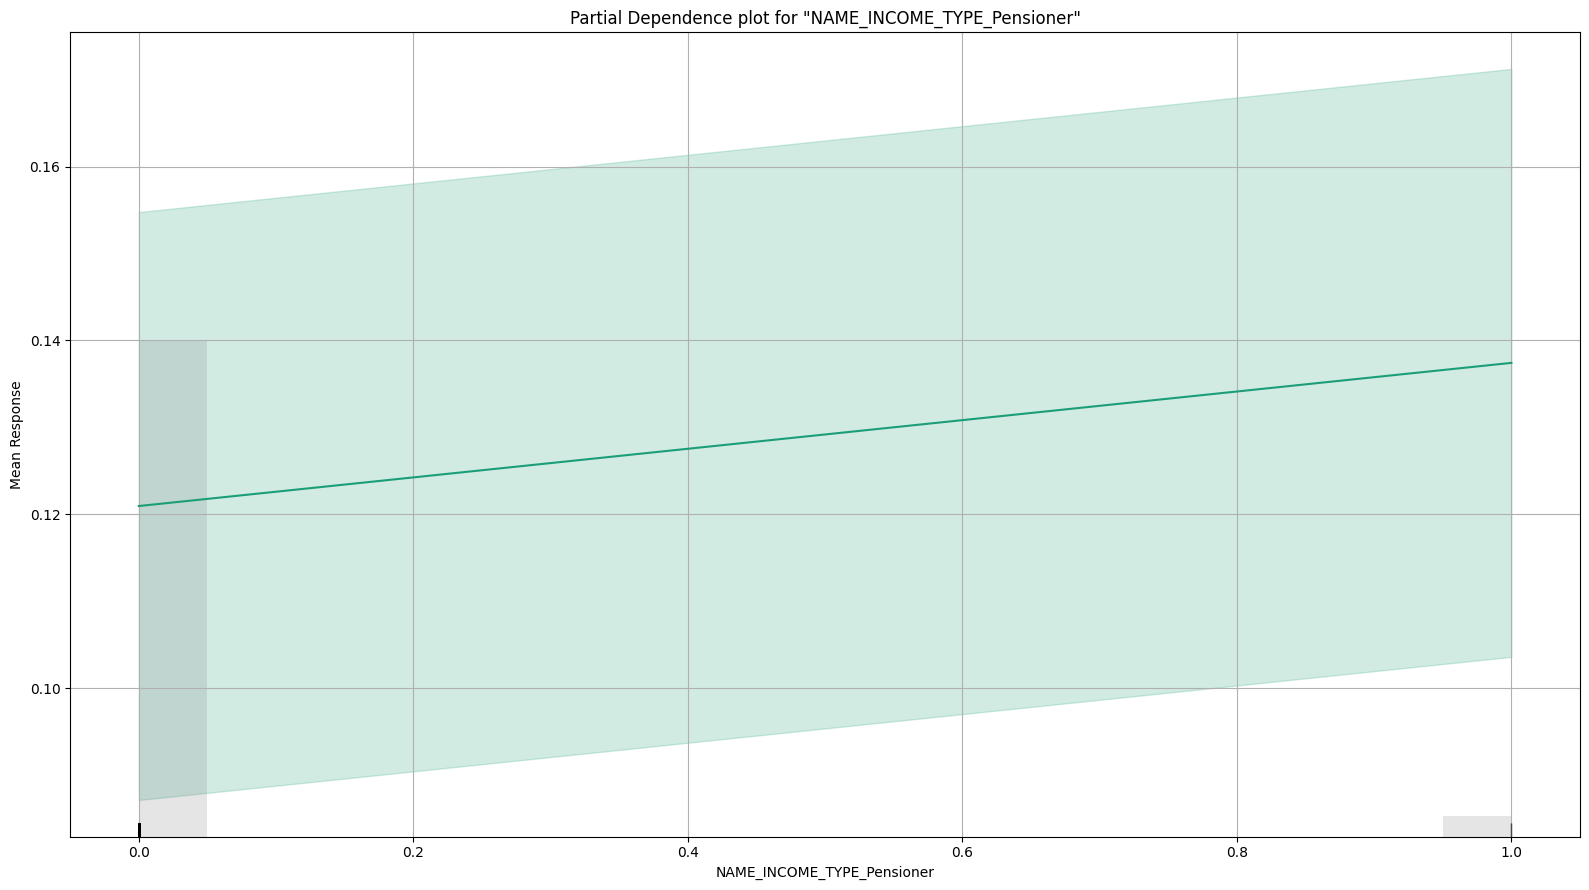

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

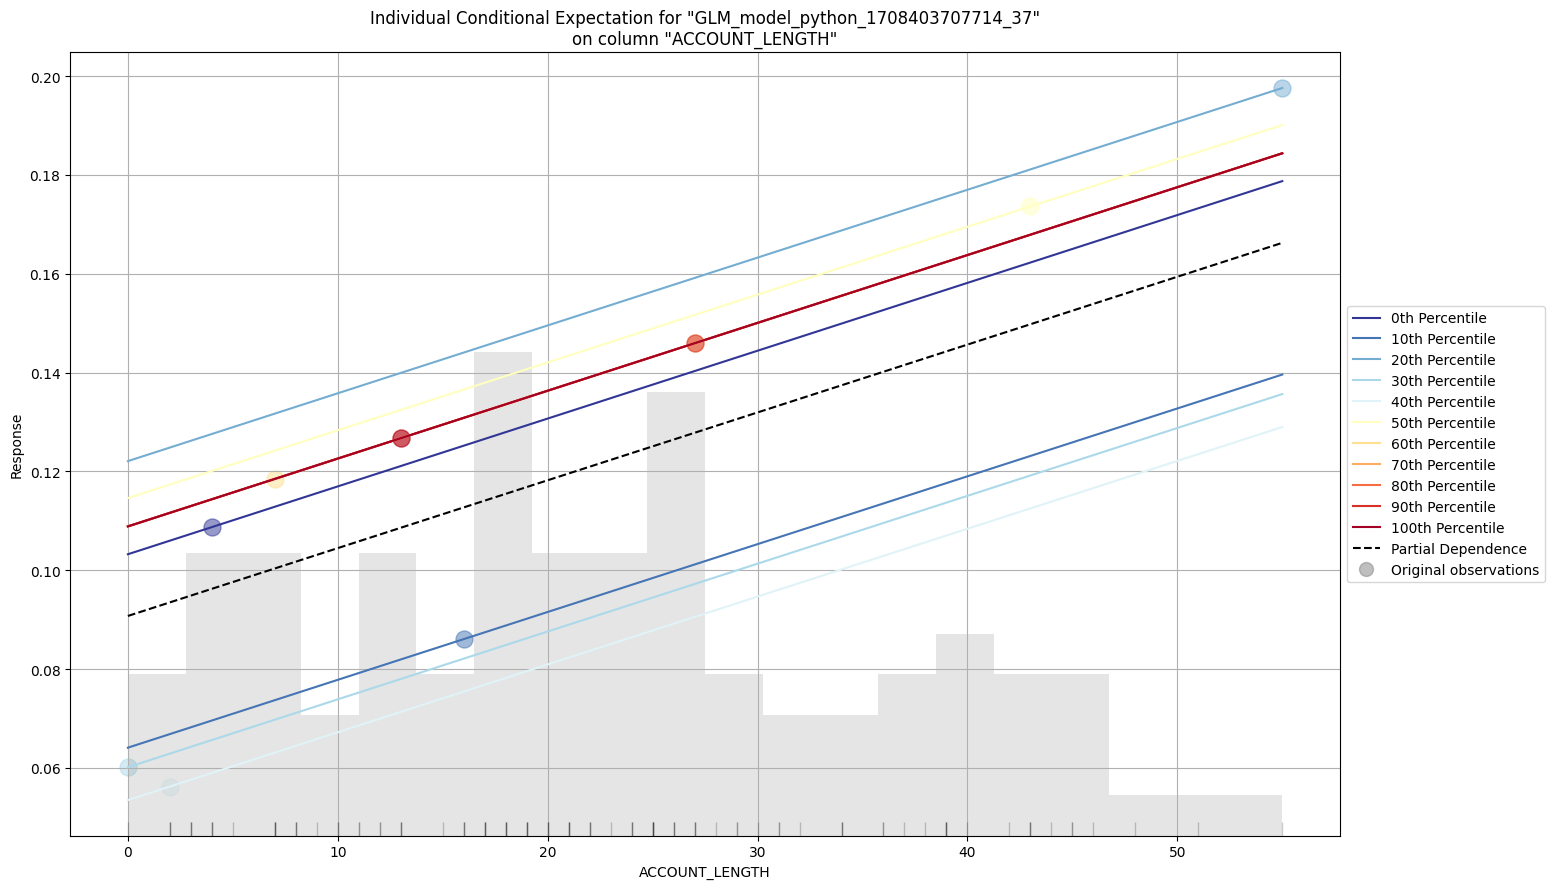

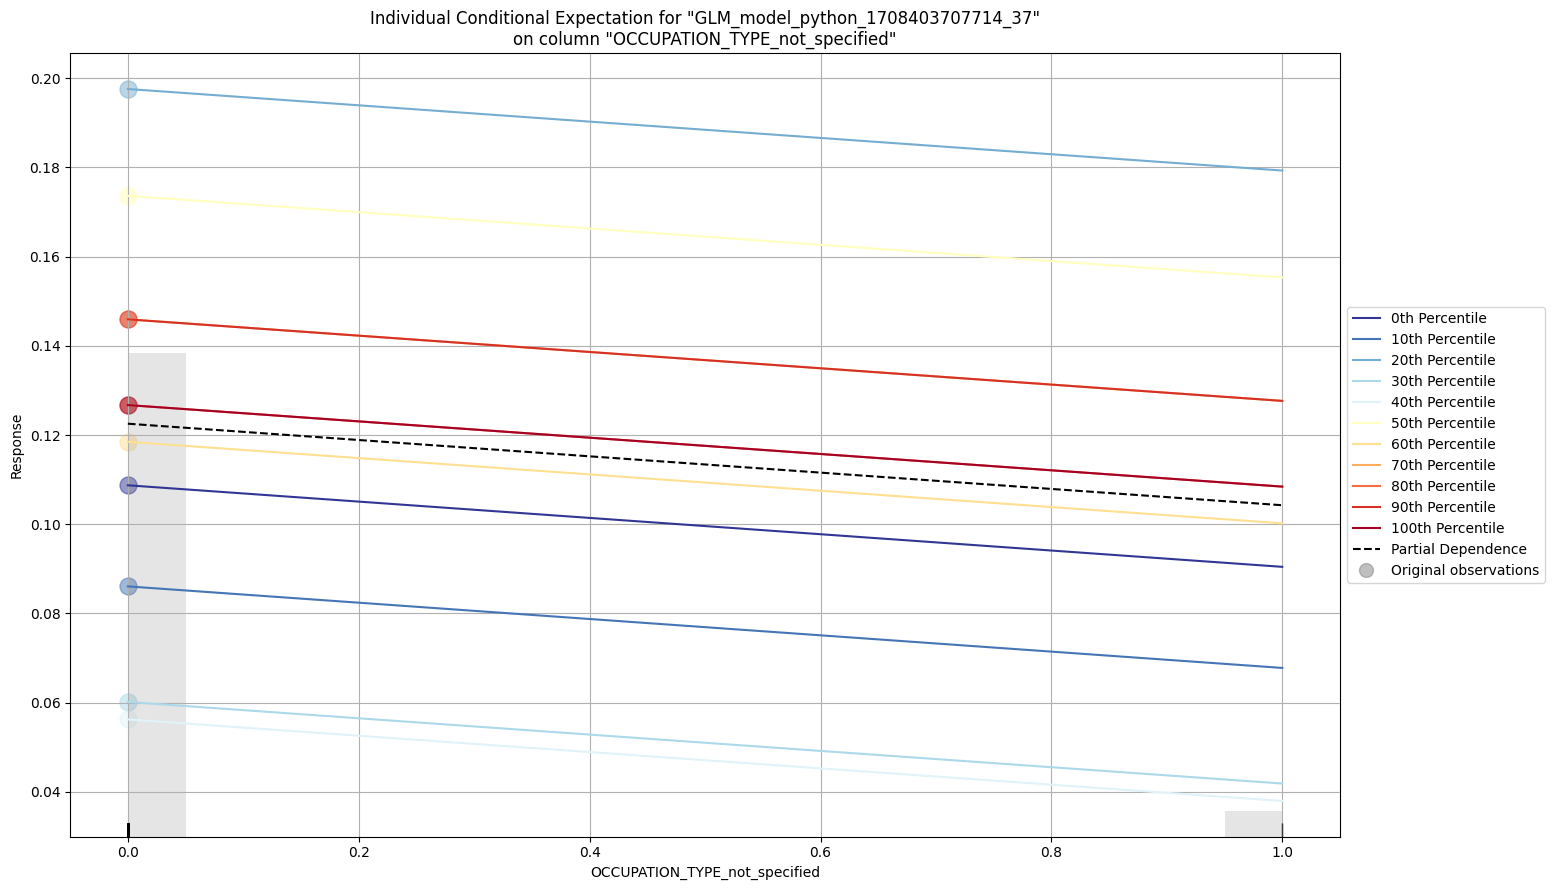

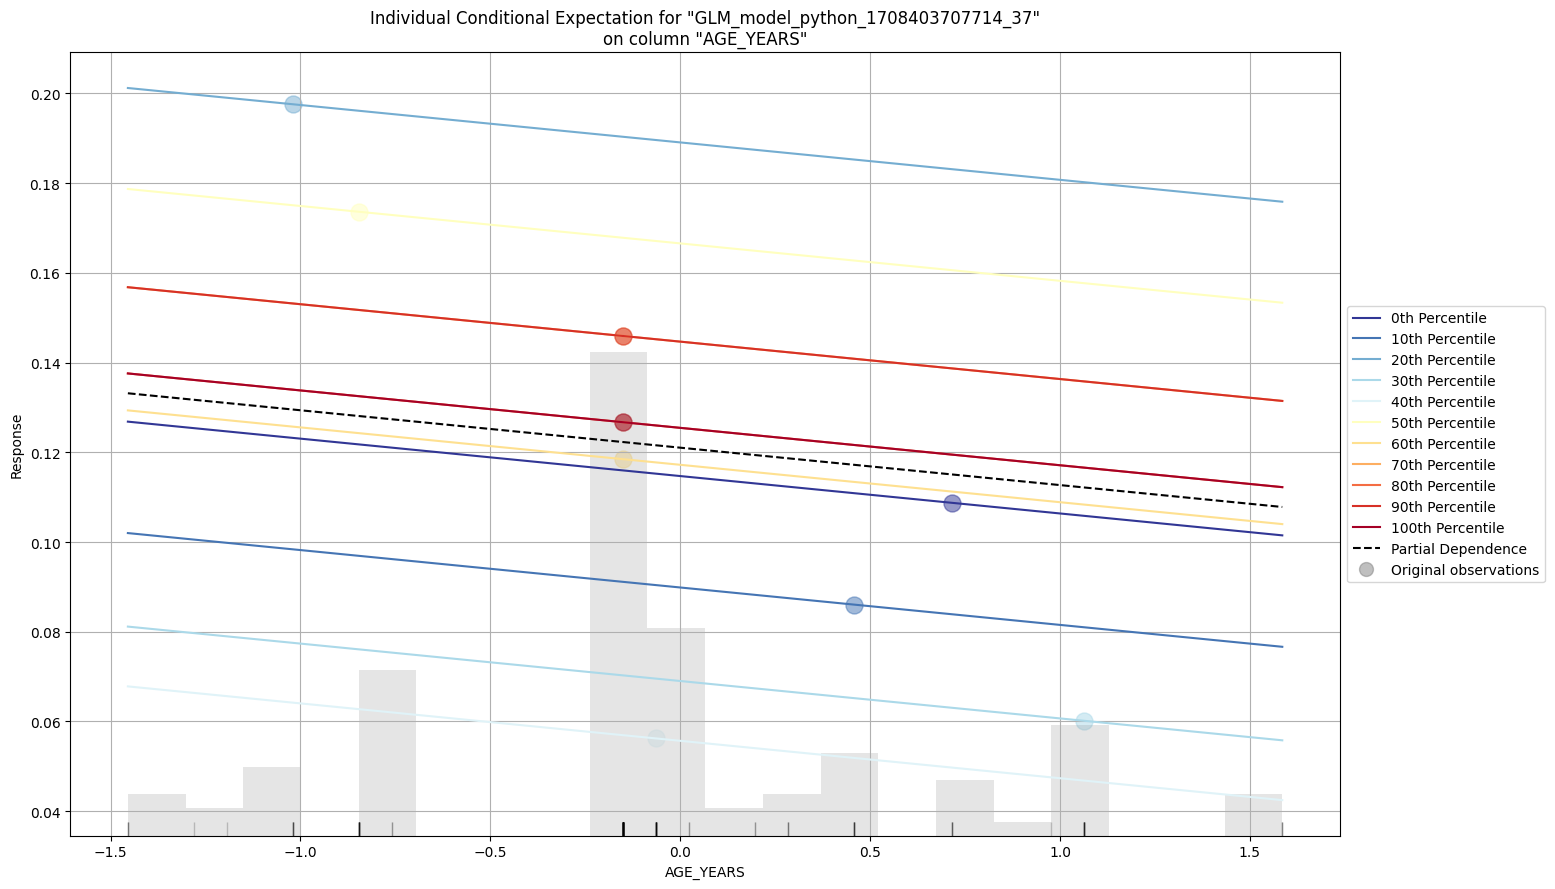

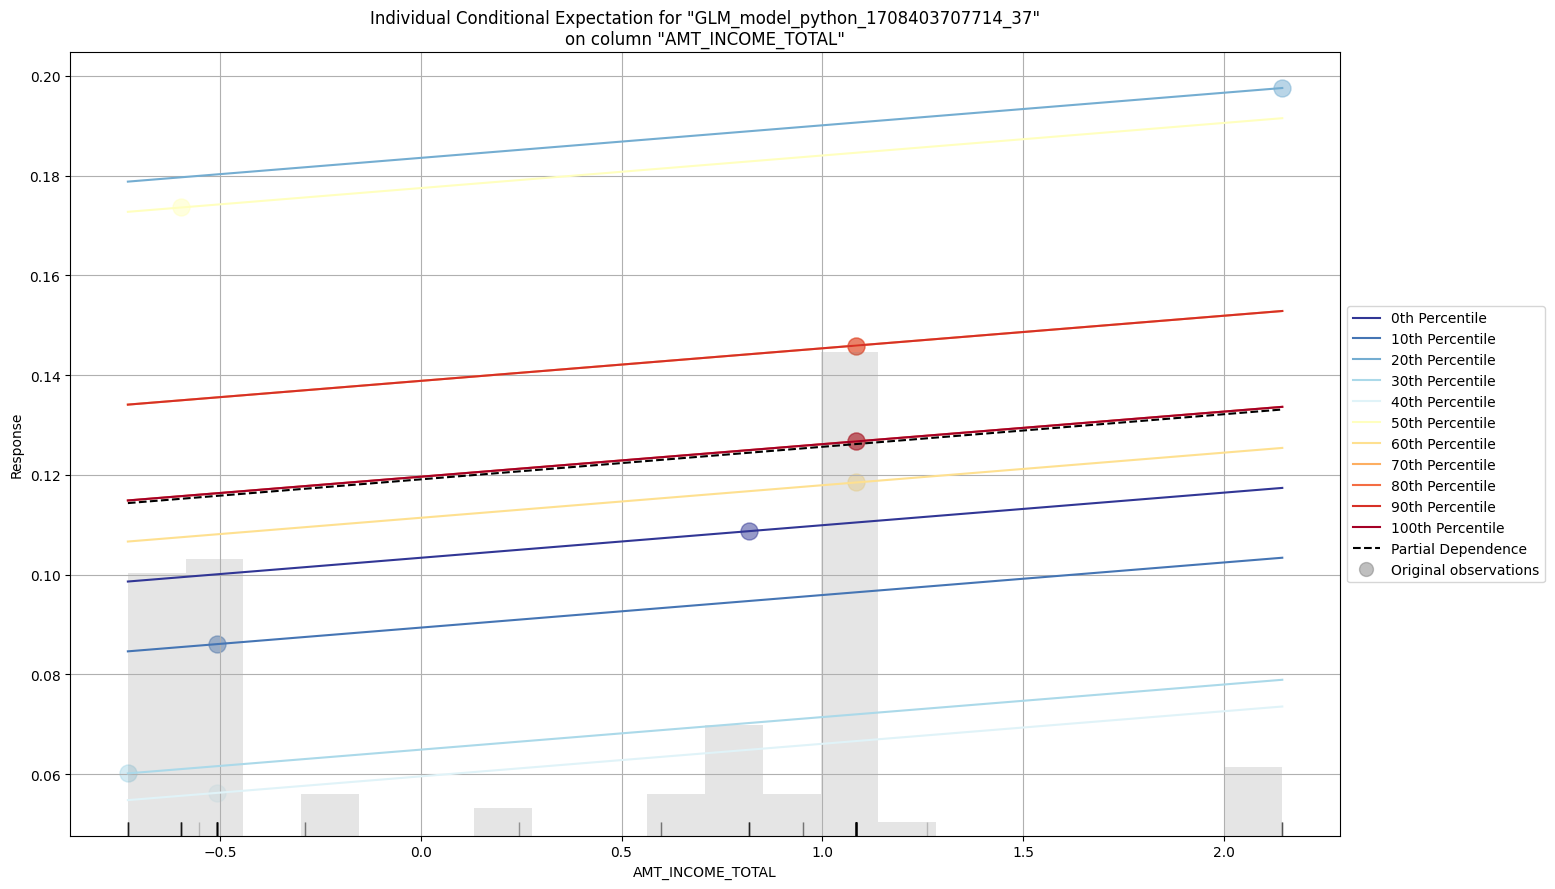

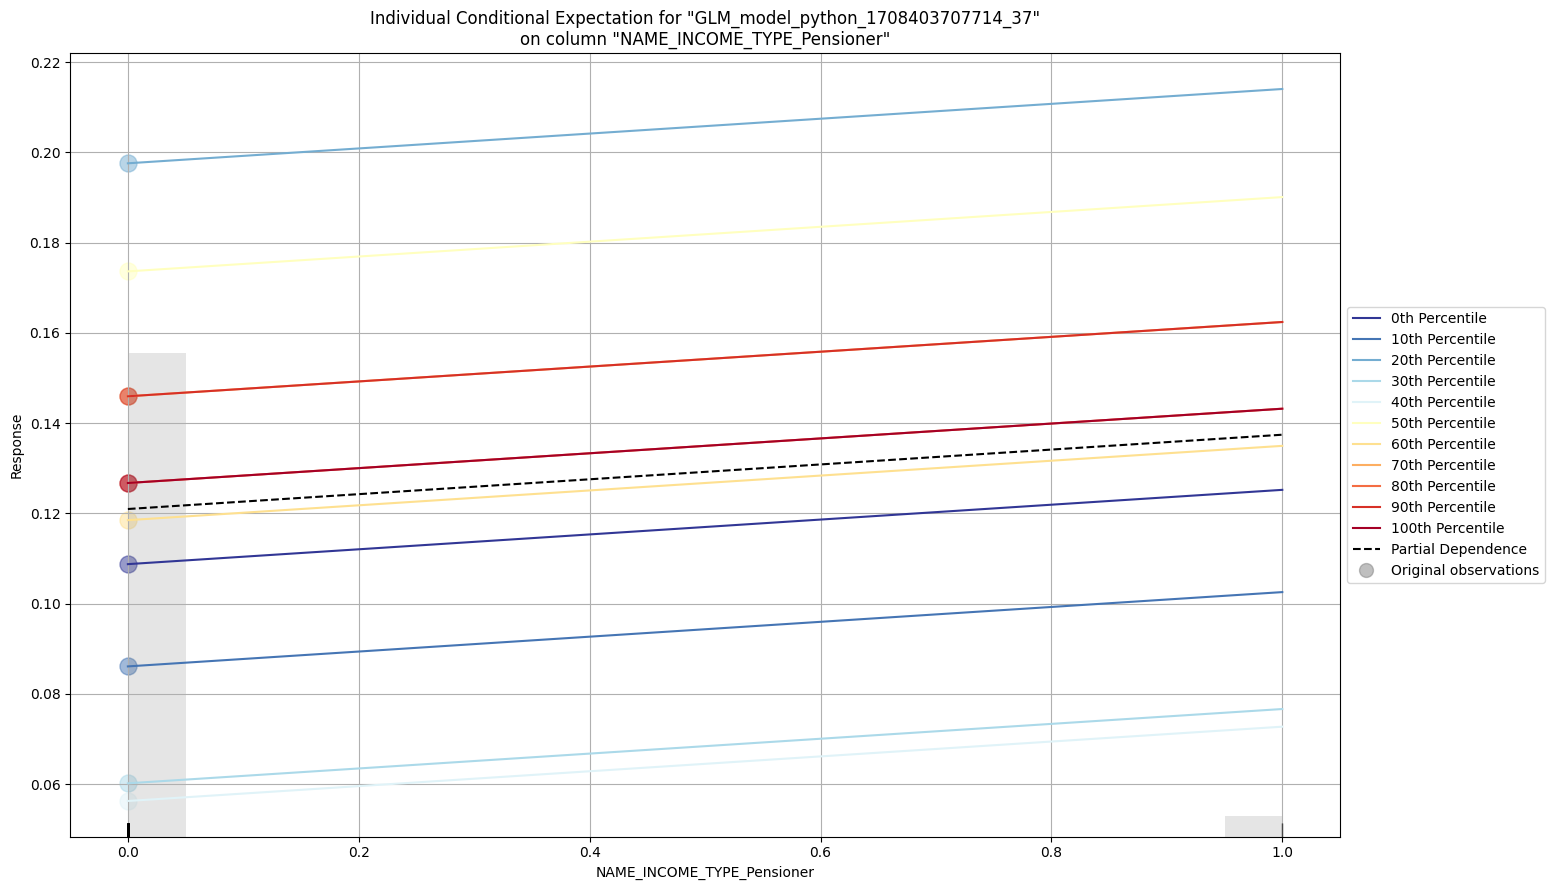

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

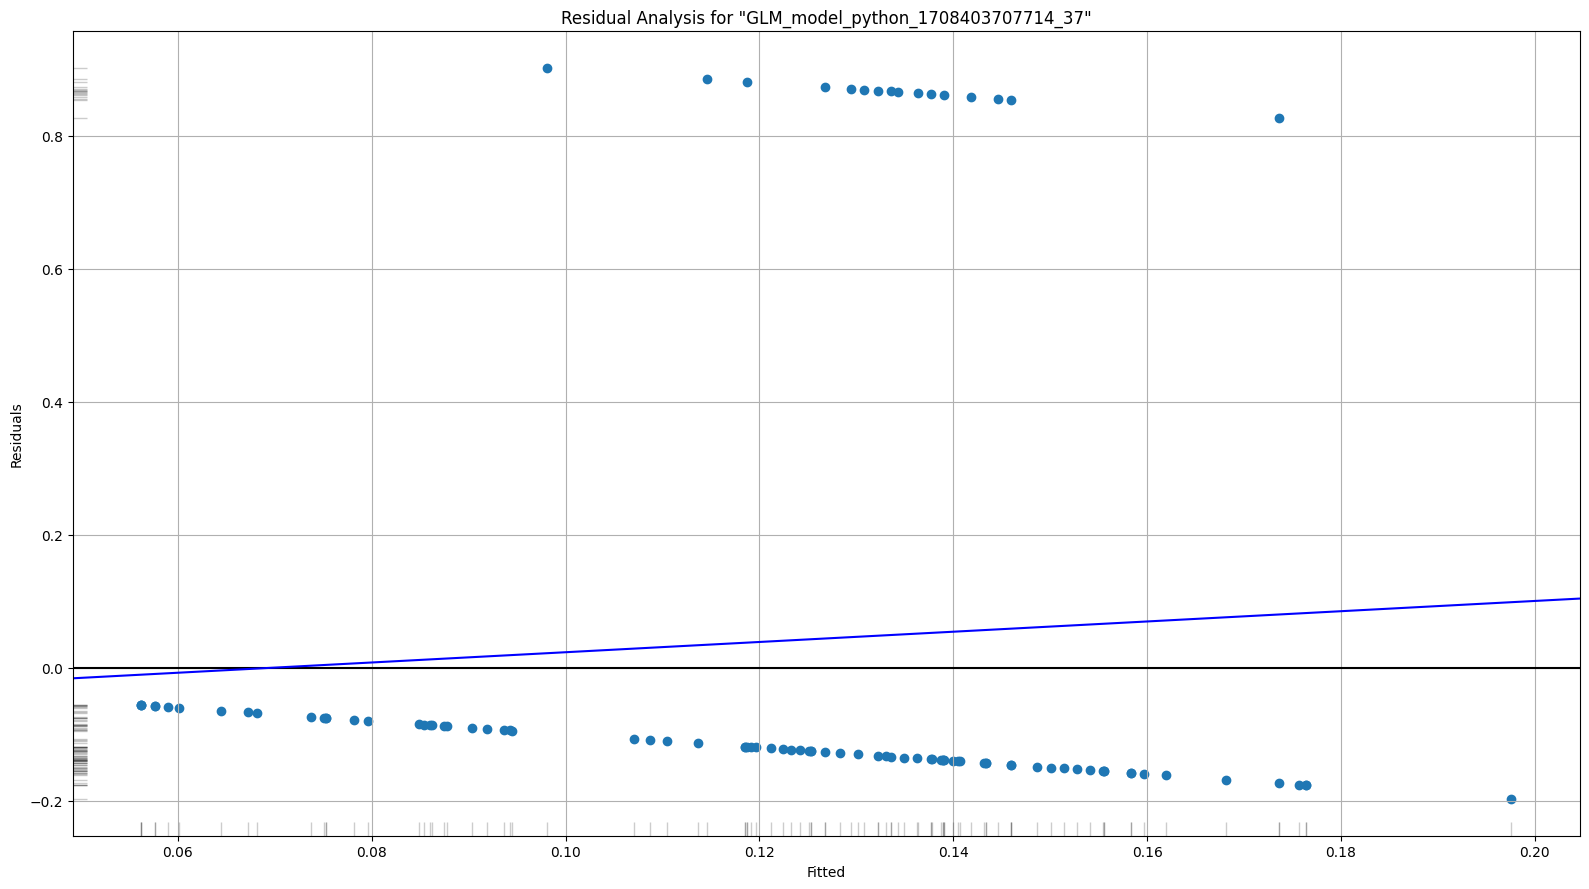

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

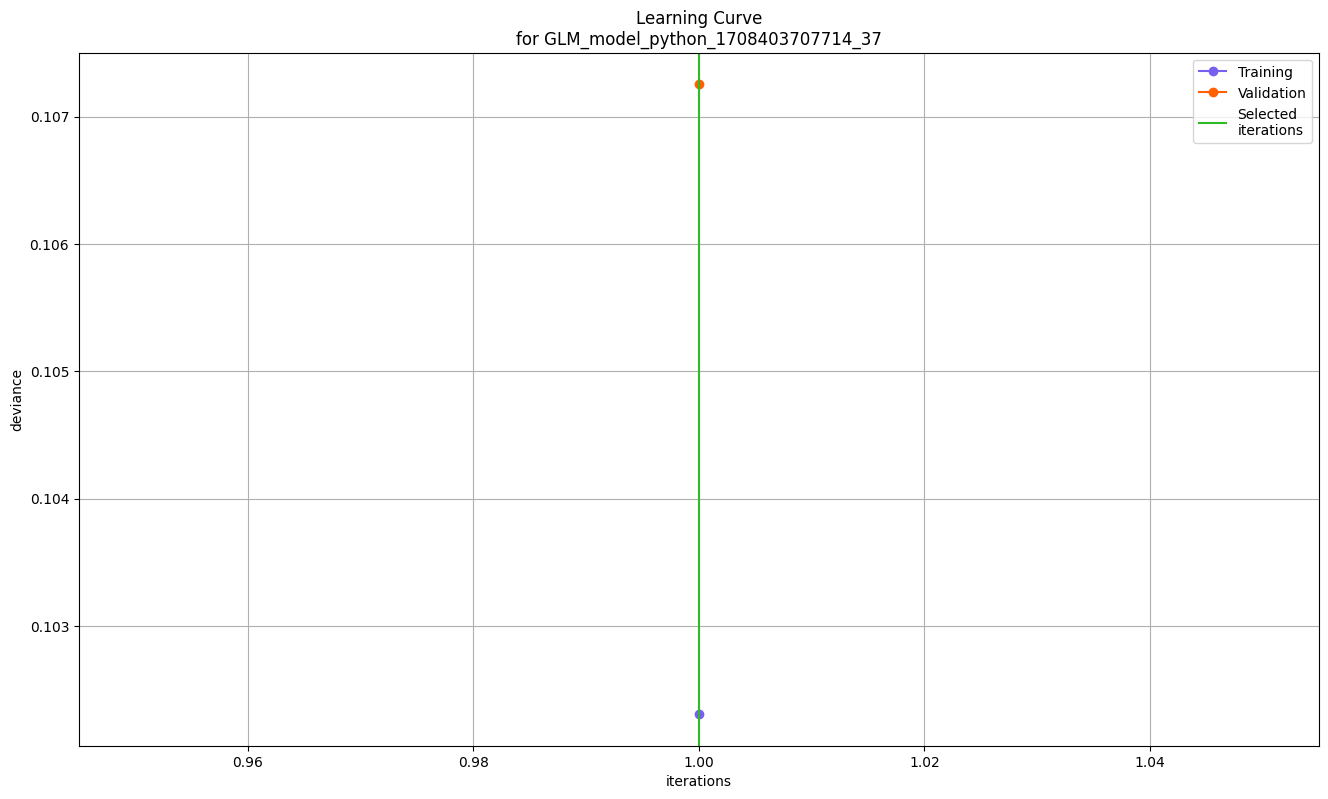

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

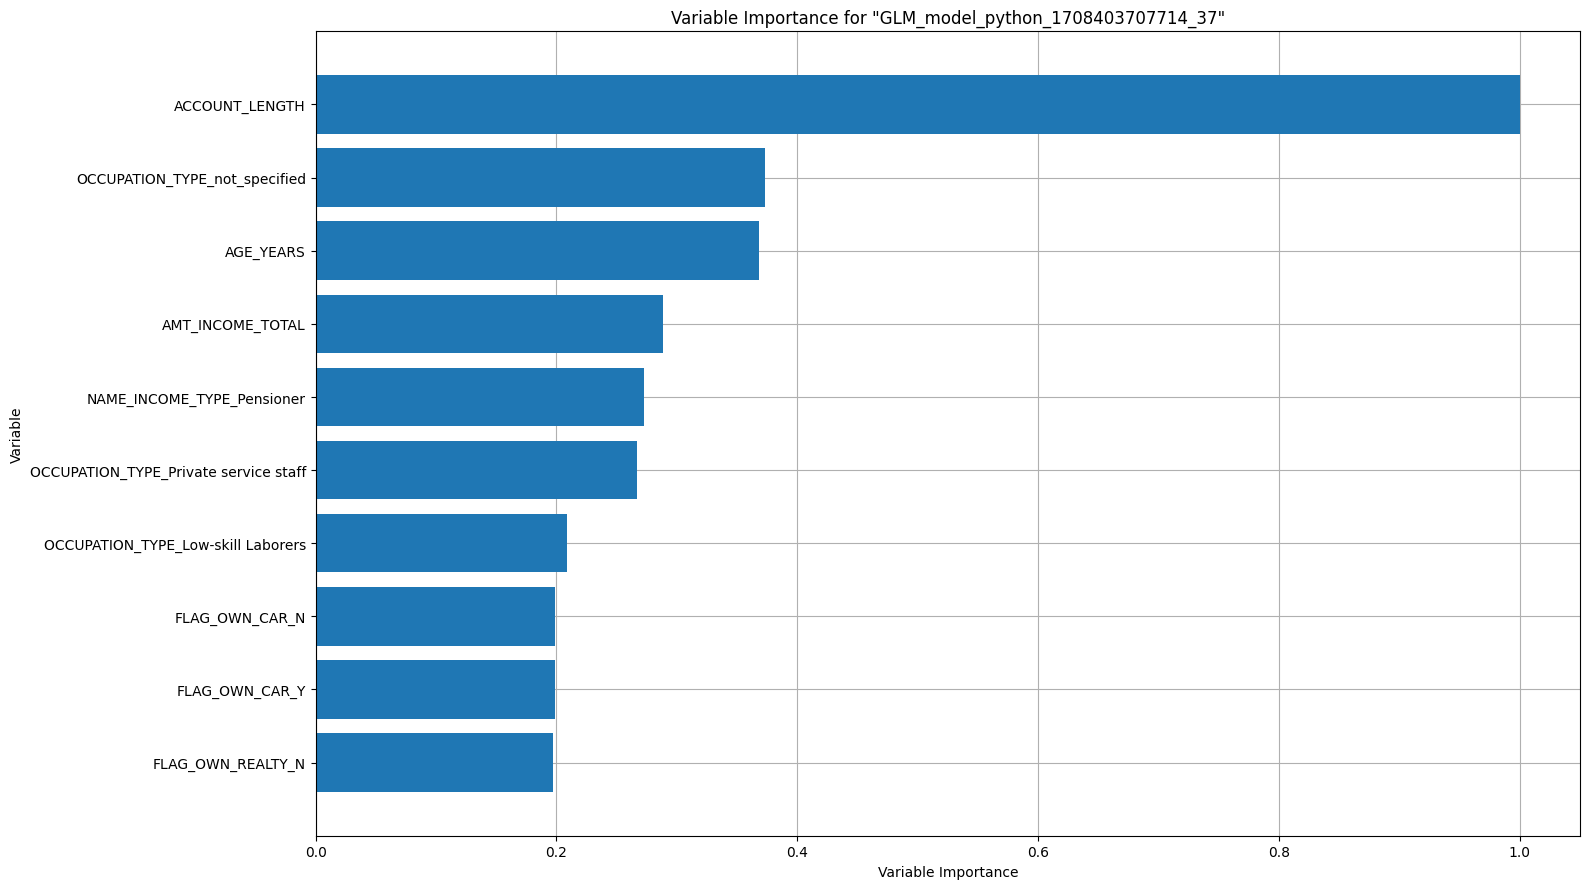

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

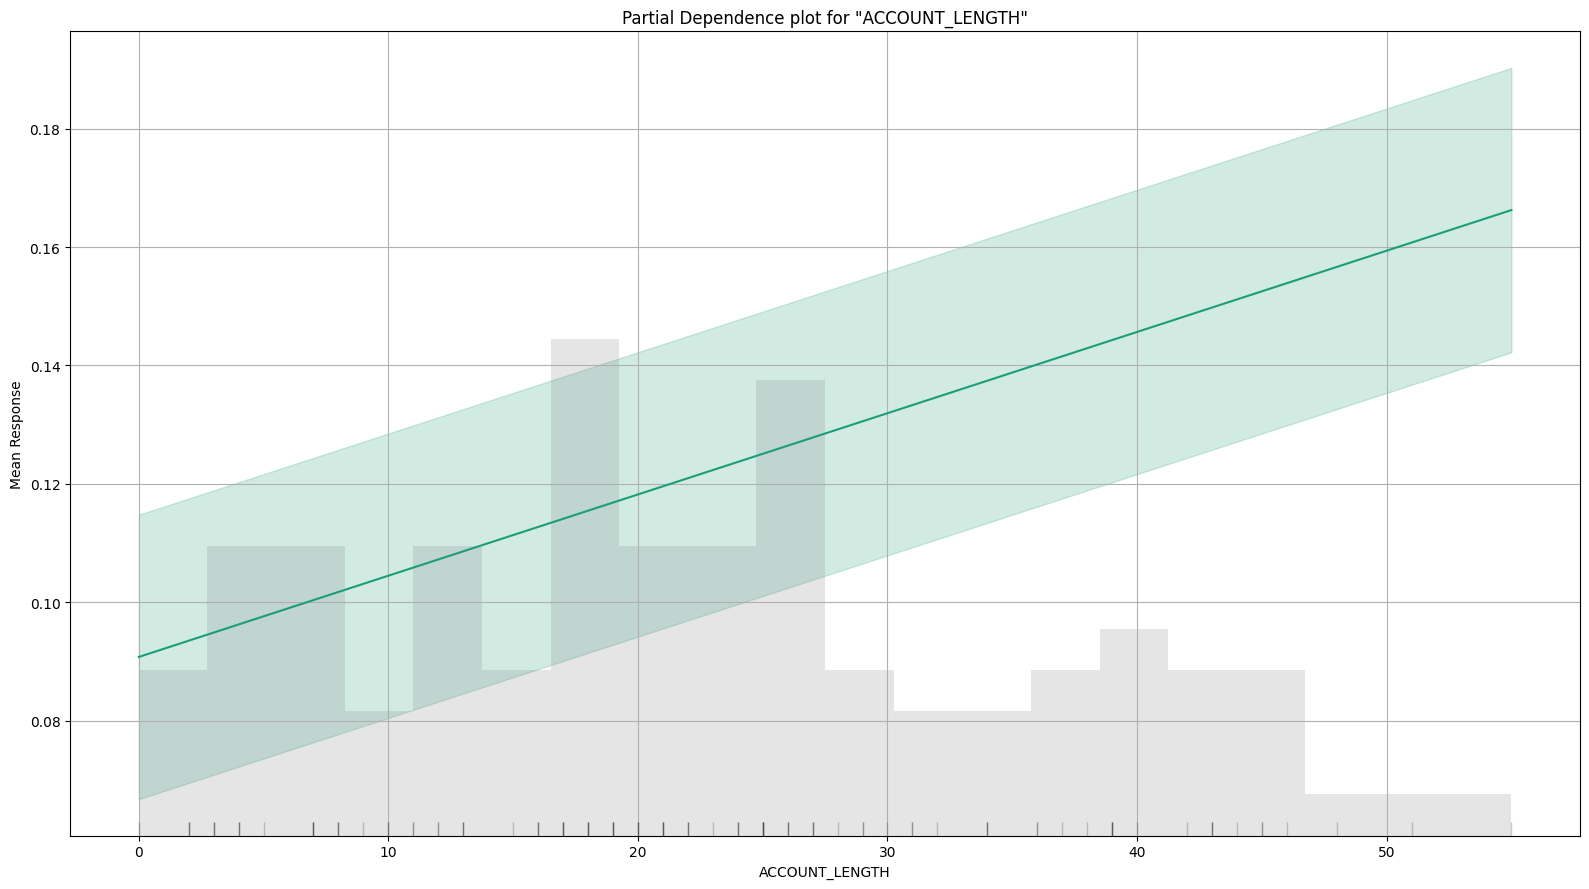

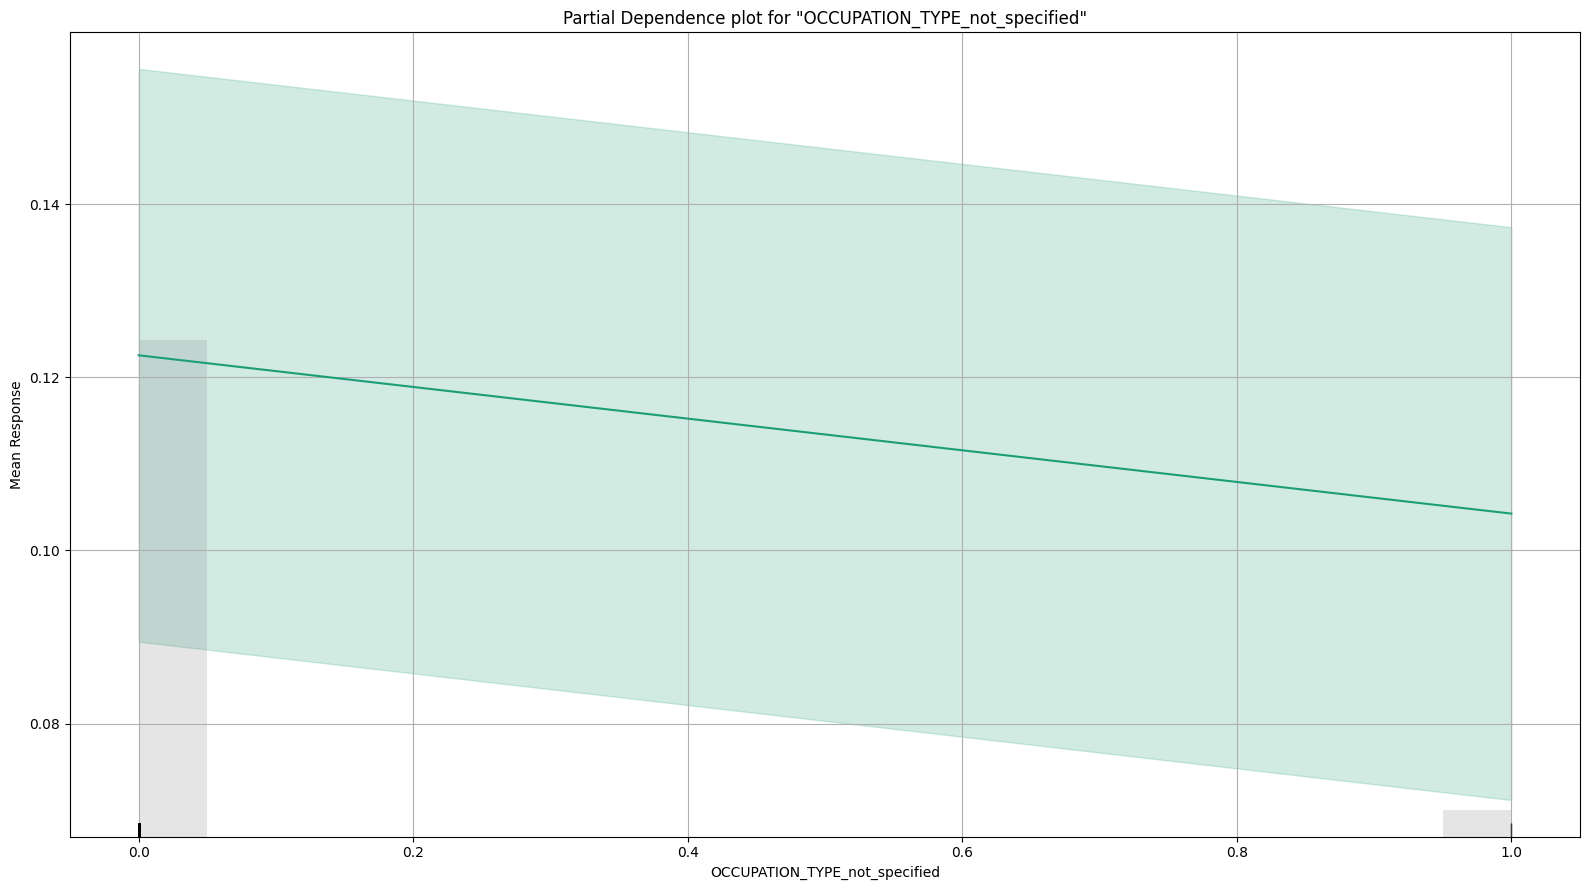

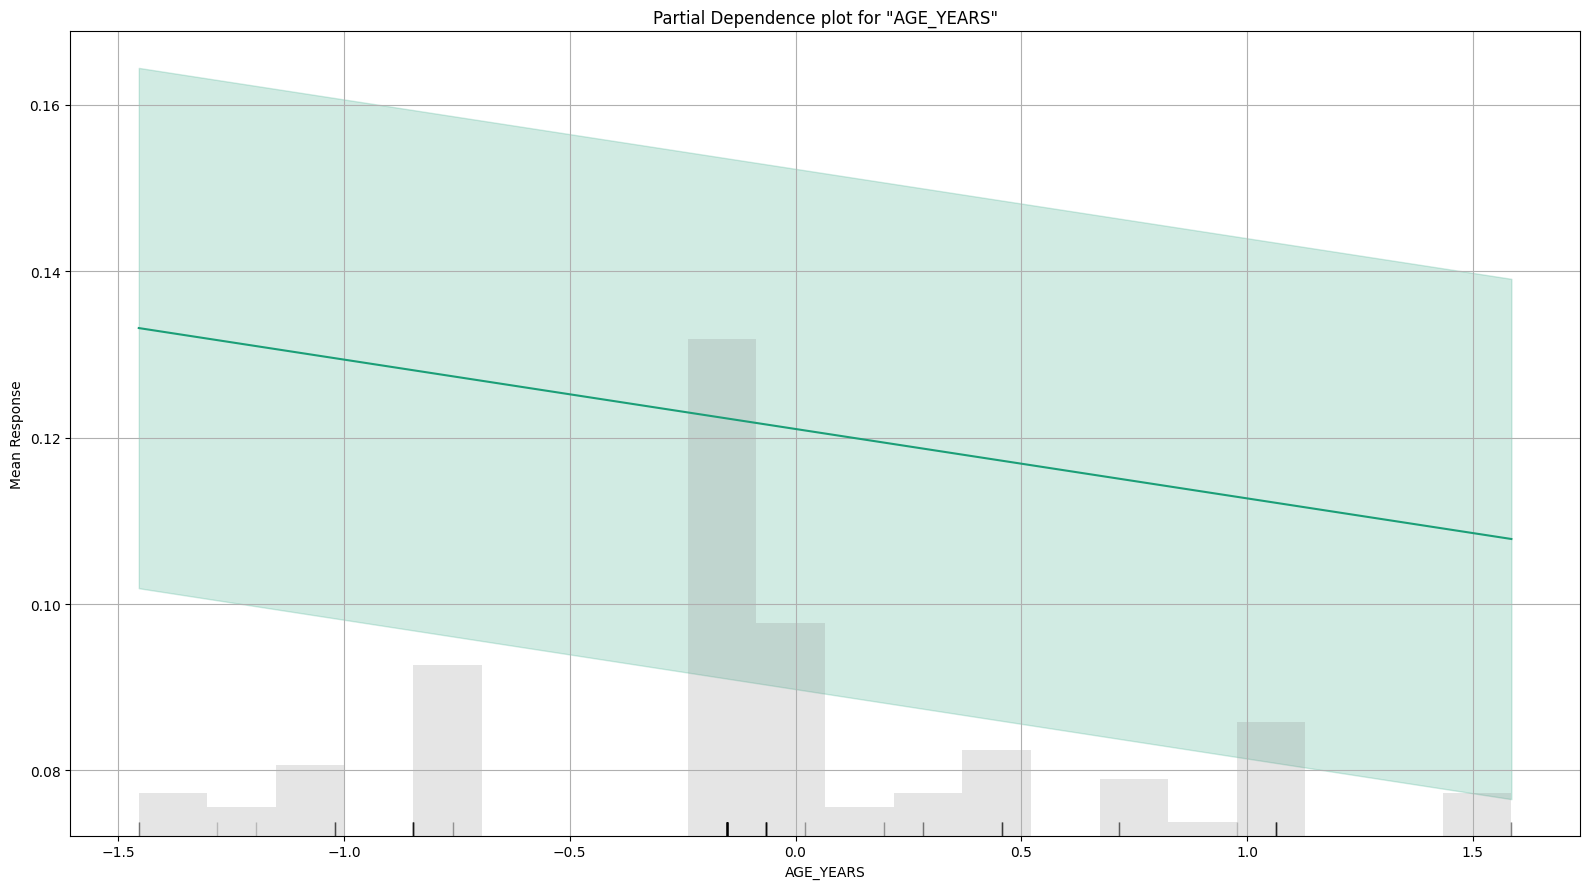

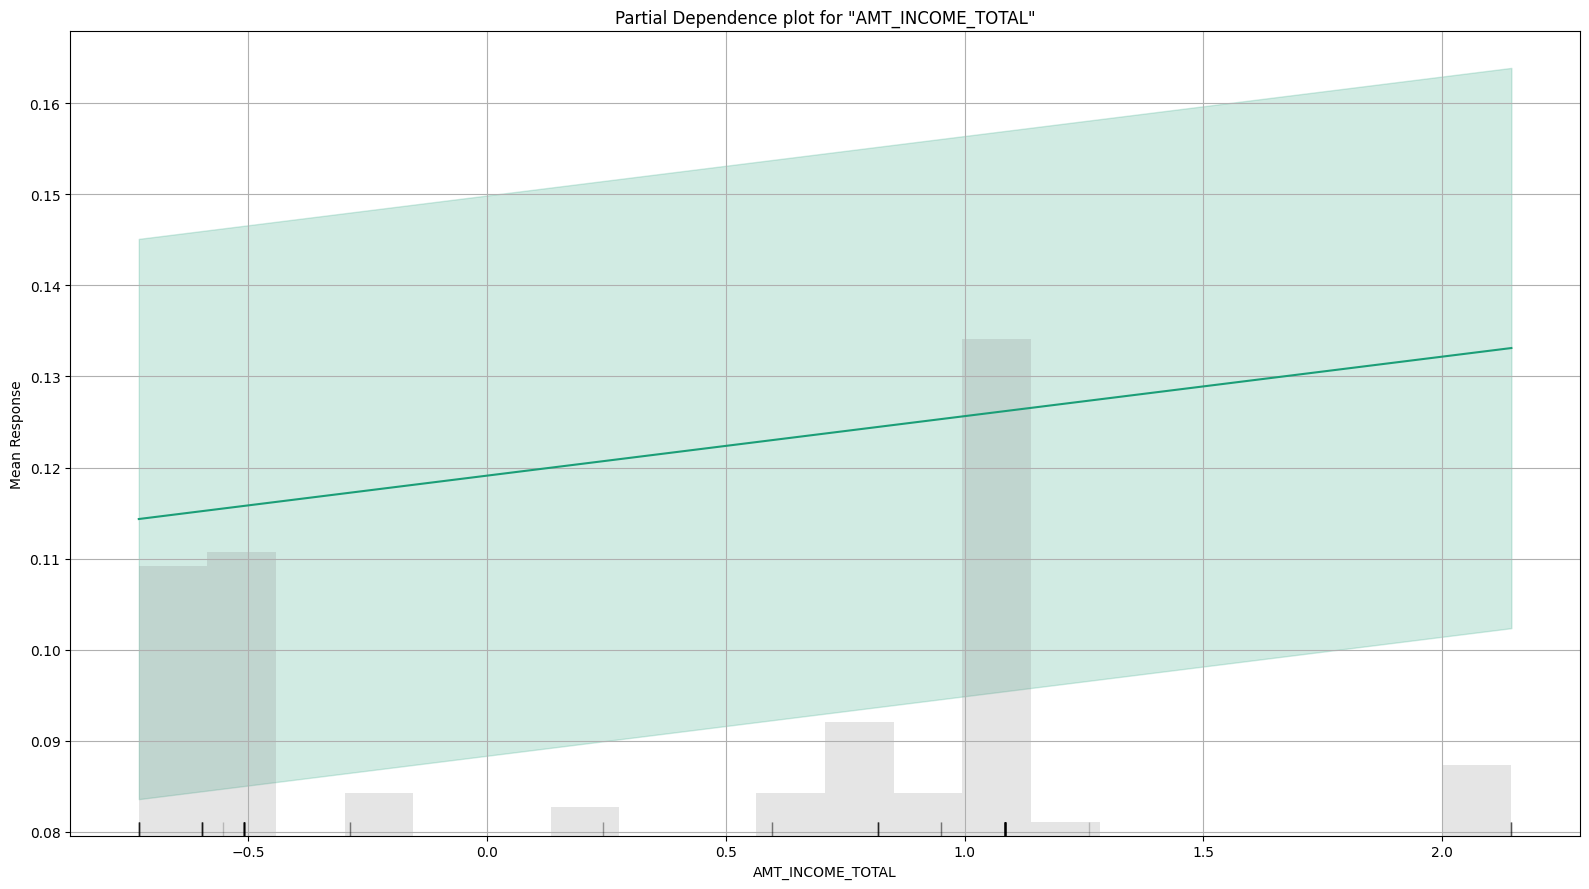

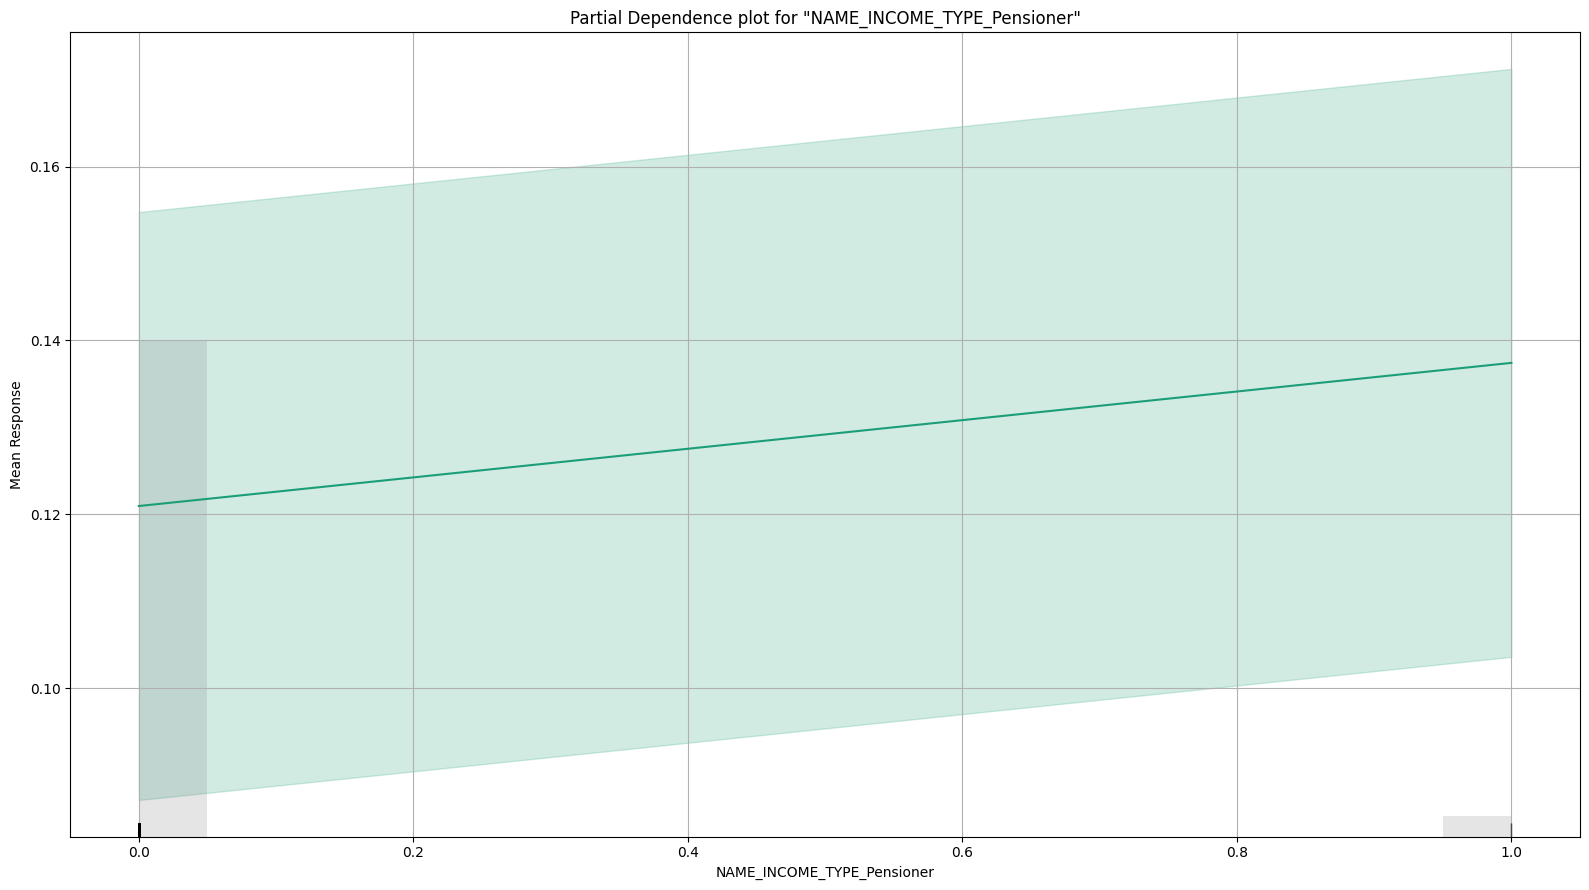

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

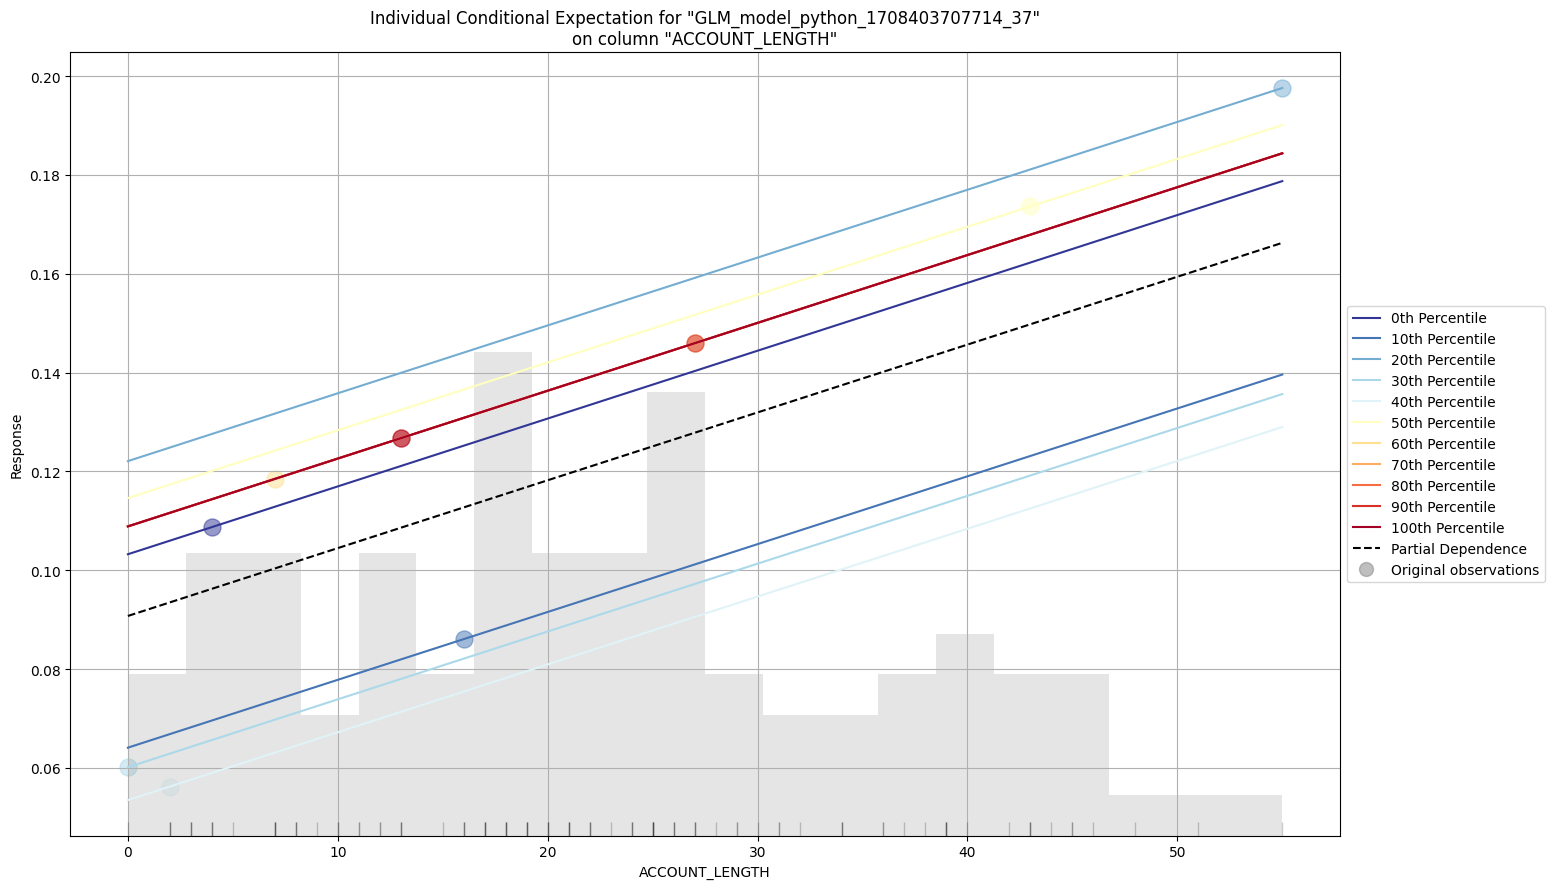

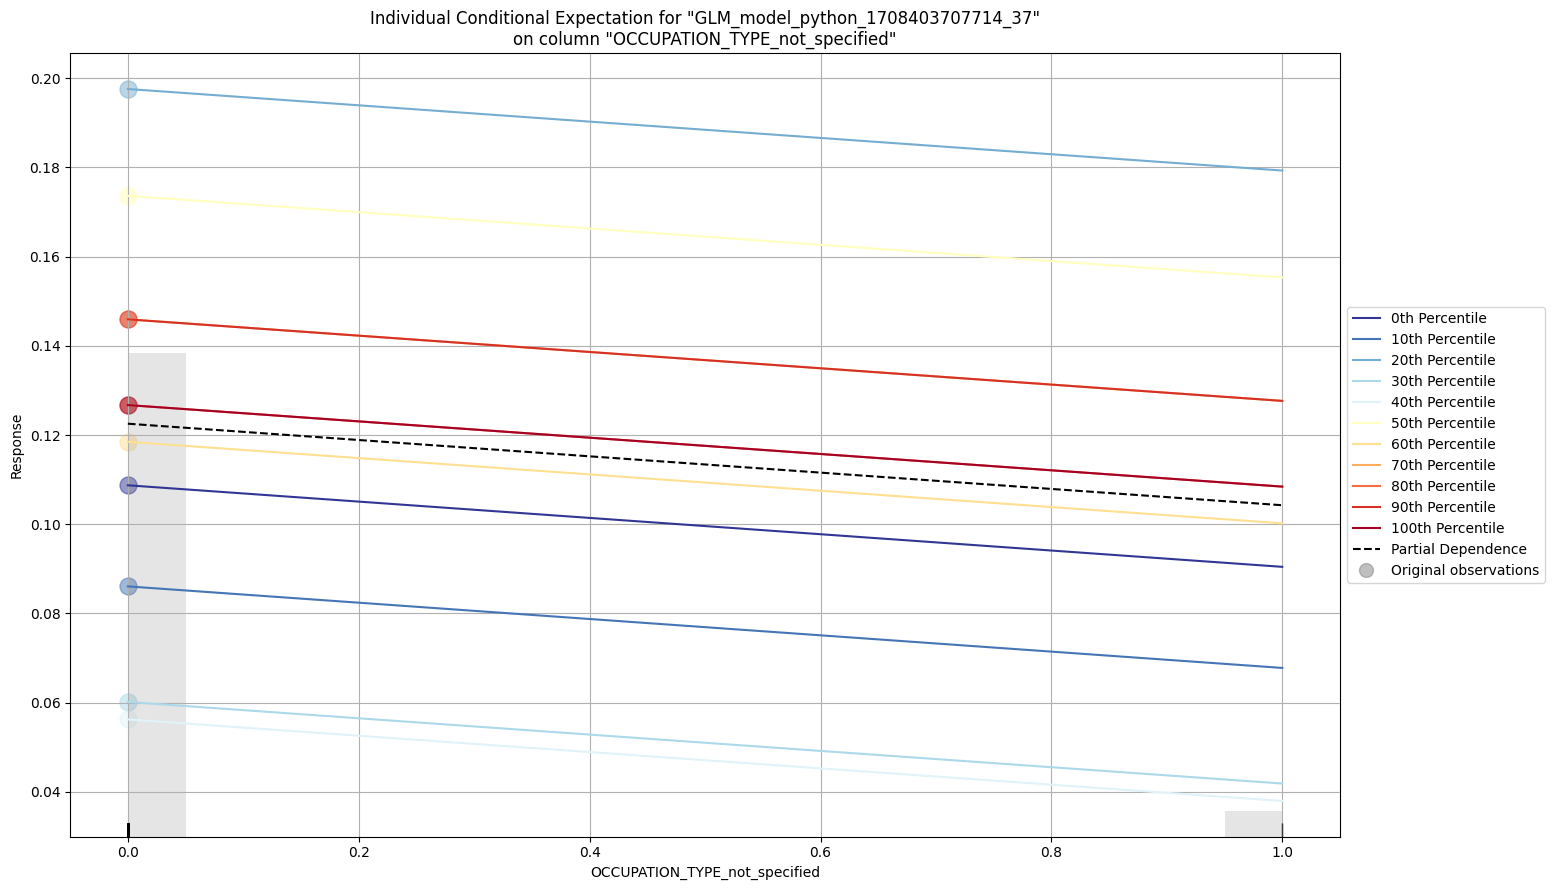

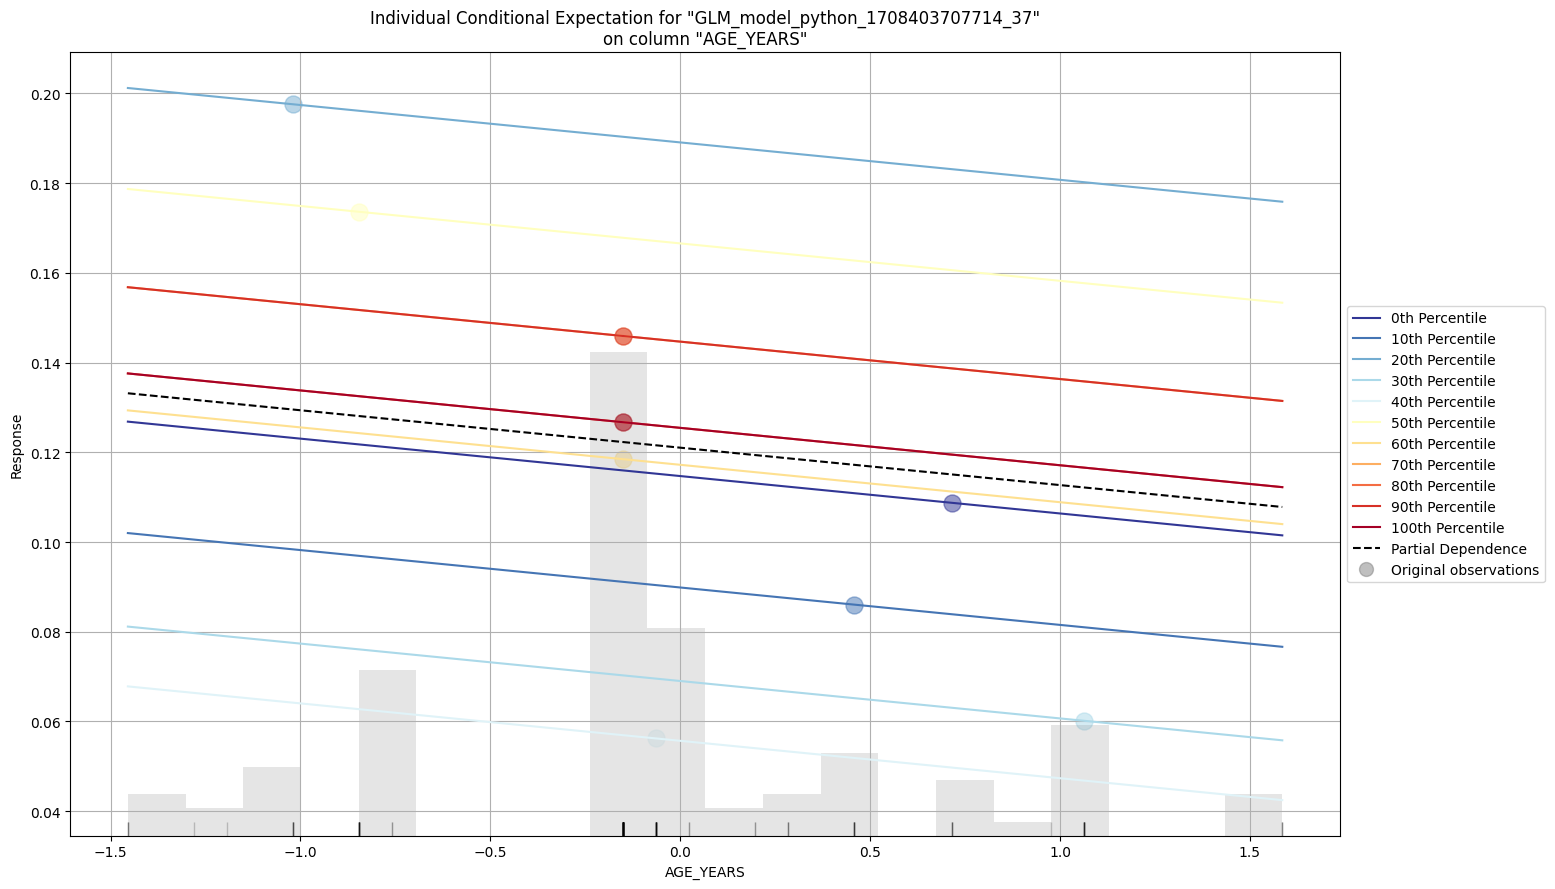

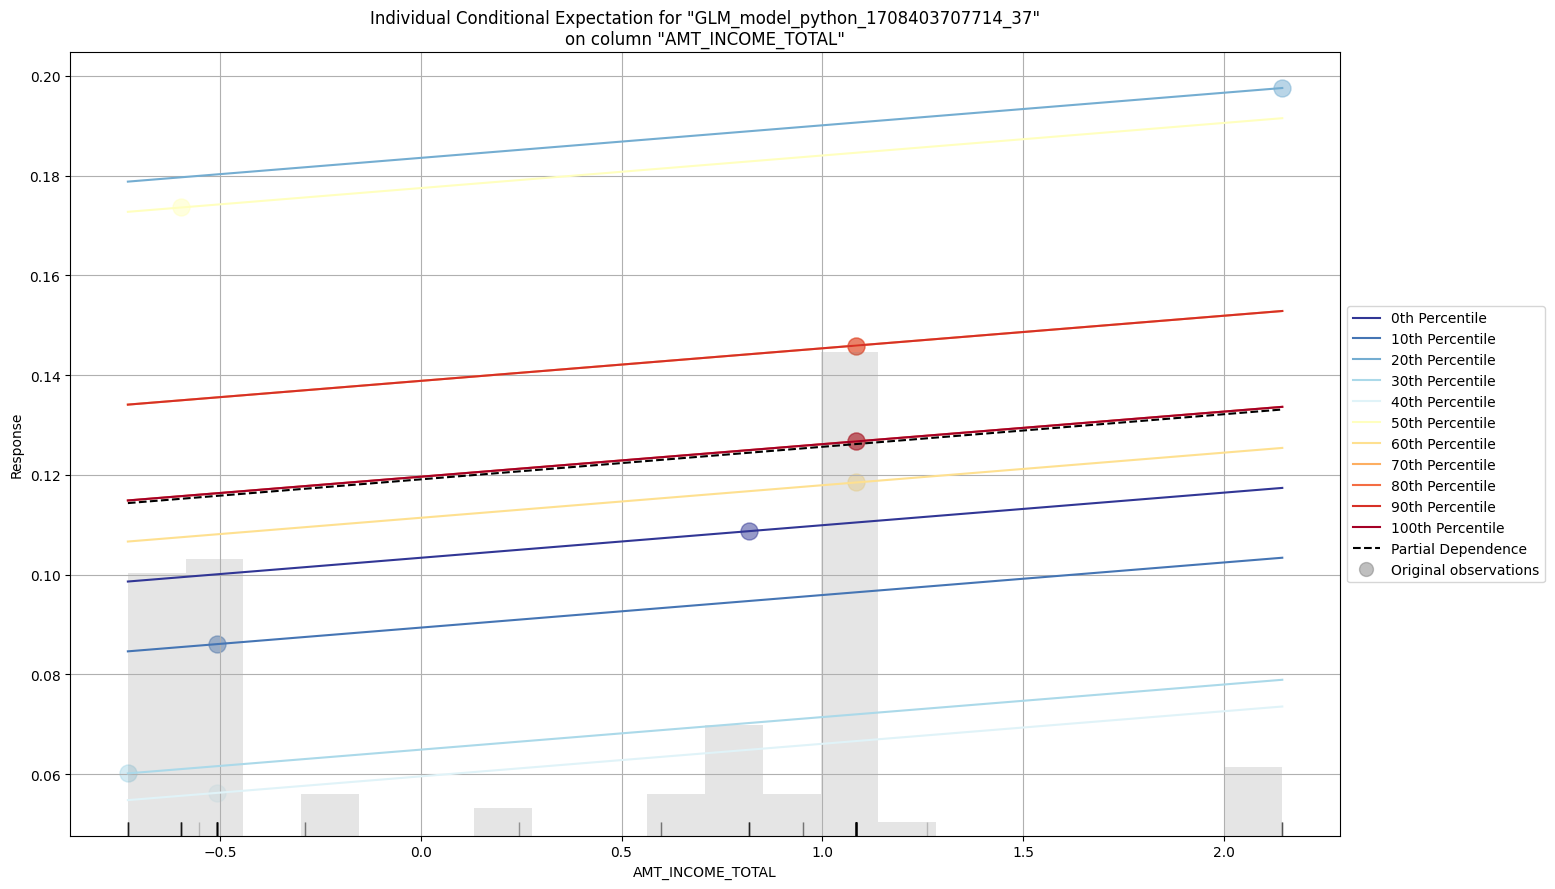

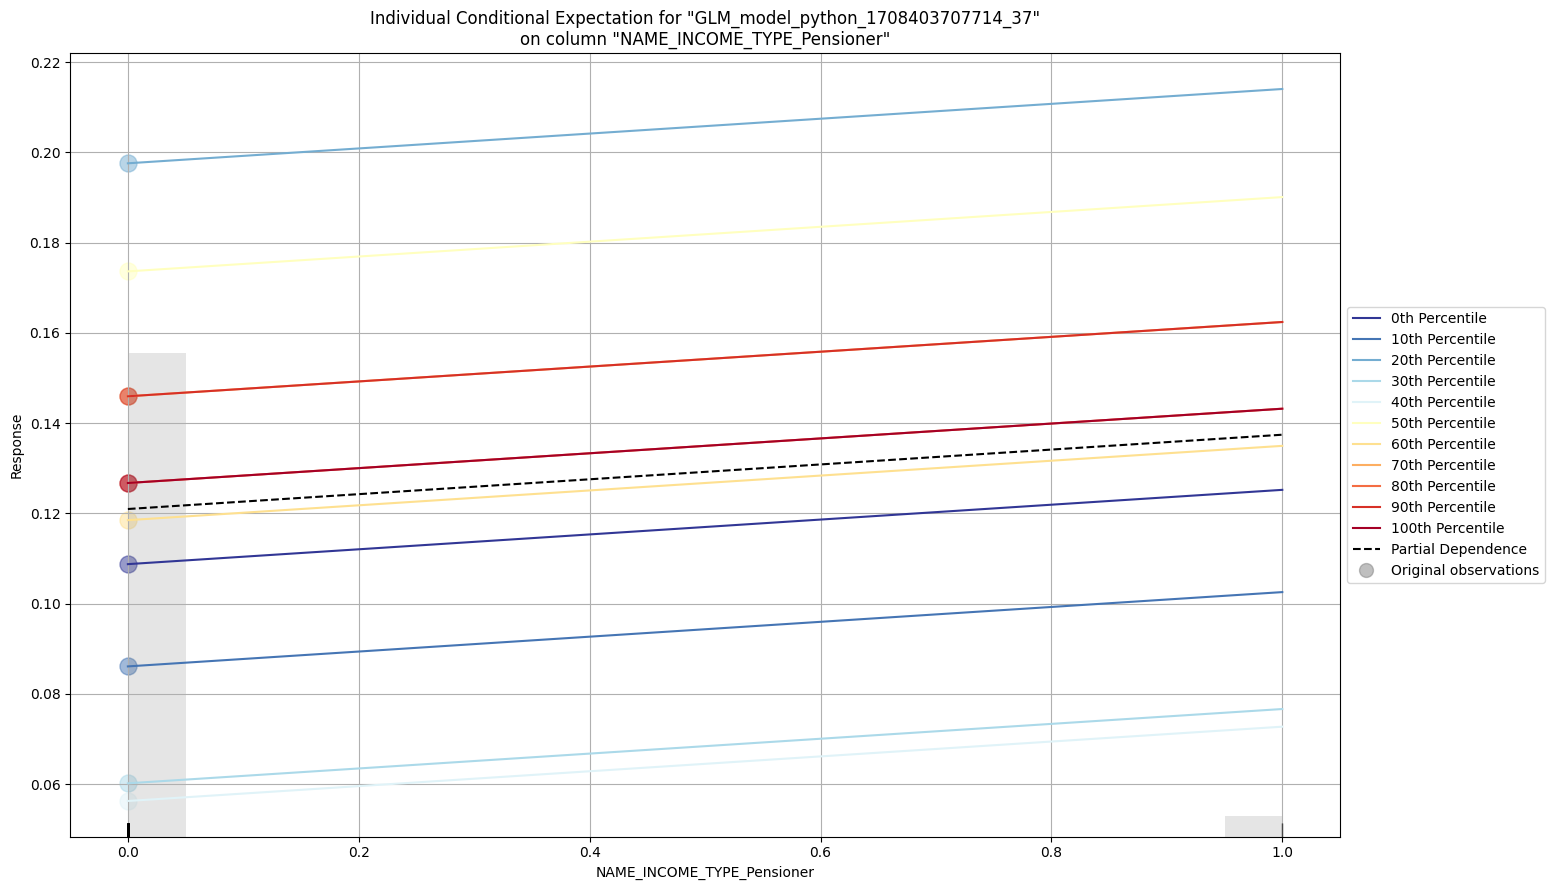

In [ ]:
data_glm.explain(train[1:100,:])

In [484]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708403707714_38


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          829                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10271599325216987
RMSE: 0.32049335913895294
MAE: 0.2058225929511612
RMSLE: 0.22399099947558096
Mean Residual Deviance: 0.10271599325216987

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10740480921307455
RMSE: 0.3277267294760599
MAE: 0.2105188537355864
RMSLE: 0.22843428833708493
Mean Residual Deviance: 0.10740480921307455

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-02-20 04:48:15  0.021 sec   0                  0.321524         0.206756        0.103378             0.328682           0.21141           0.108032
    2024-02-20 04:48:15  0.127 sec   1                  0.321316         0.206615        0.103244             0.328477           0.211273          0.107897
    2024-02-20 04:48:15  0.160 sec   2                  0.321147         0.206488        0.103135             0.328311           0.211149          0.107788
    2024-02-20 04:48:15  0.194 sec   3                  0.32101          0.206374        0.103048             0.328175           0.211038          0.107699
    2024-02-20 04:48:15  0.228 sec   4                  0.320895         0.206274        0.102973             0.328069           0.210944          0.107629
    2024-02-20 04:48:15  0.271 sec   5                  0.320798         0.20618         0.102912             0.32798            0.210849          0.107571
    2024-02-20 04:48:16  0.356 sec   6                  0.320714         0.206097        0.102857             0.327912           0.210777          0.107526
    2024-02-20 04:48:16  0.396 sec   7                  0.320645         0.206023        0.102813             0.327858           0.210713          0.107491
    2024-02-20 04:48:16  0.435 sec   8                  0.320585         0.205948        0.102775             0.327803           0.210638          0.107455
    2024-02-20 04:48:16  0.477 sec   9                  0.320536         0.205881        0.102743             0.327758           0.21057           0.107425
    2024-02-20 04:48:16  0.512 sec   10                 0.320493         0.205823        0.102716             0.327727           0.210519          0.107405

Variable Importances: 
variable                               relative_importance    scaled_importance    percentage
-------------------------------------  ---------------------  -------------------  ------------
ACCOUNT_LENGTH                         114.16807556152344     1.0                  1.0
AMT_INCOME_TOTAL                       0.0                    0.0                  0.0
CNT_FAM_MEMBERS                        0.0                    0.0                  0.0
AGE_YEARS                              0.0                    0.0                  0.0
YEARS_EMPLOYED                         0.0                    0.0                  0.0
CODE_GENDER_F                          0.0                    0.0                  0.0
CODE_GENDER_M                          0.0                    0.0                  0.0
FLAG_OWN_CAR_N                         0.0                    0.0                  0.0
F

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

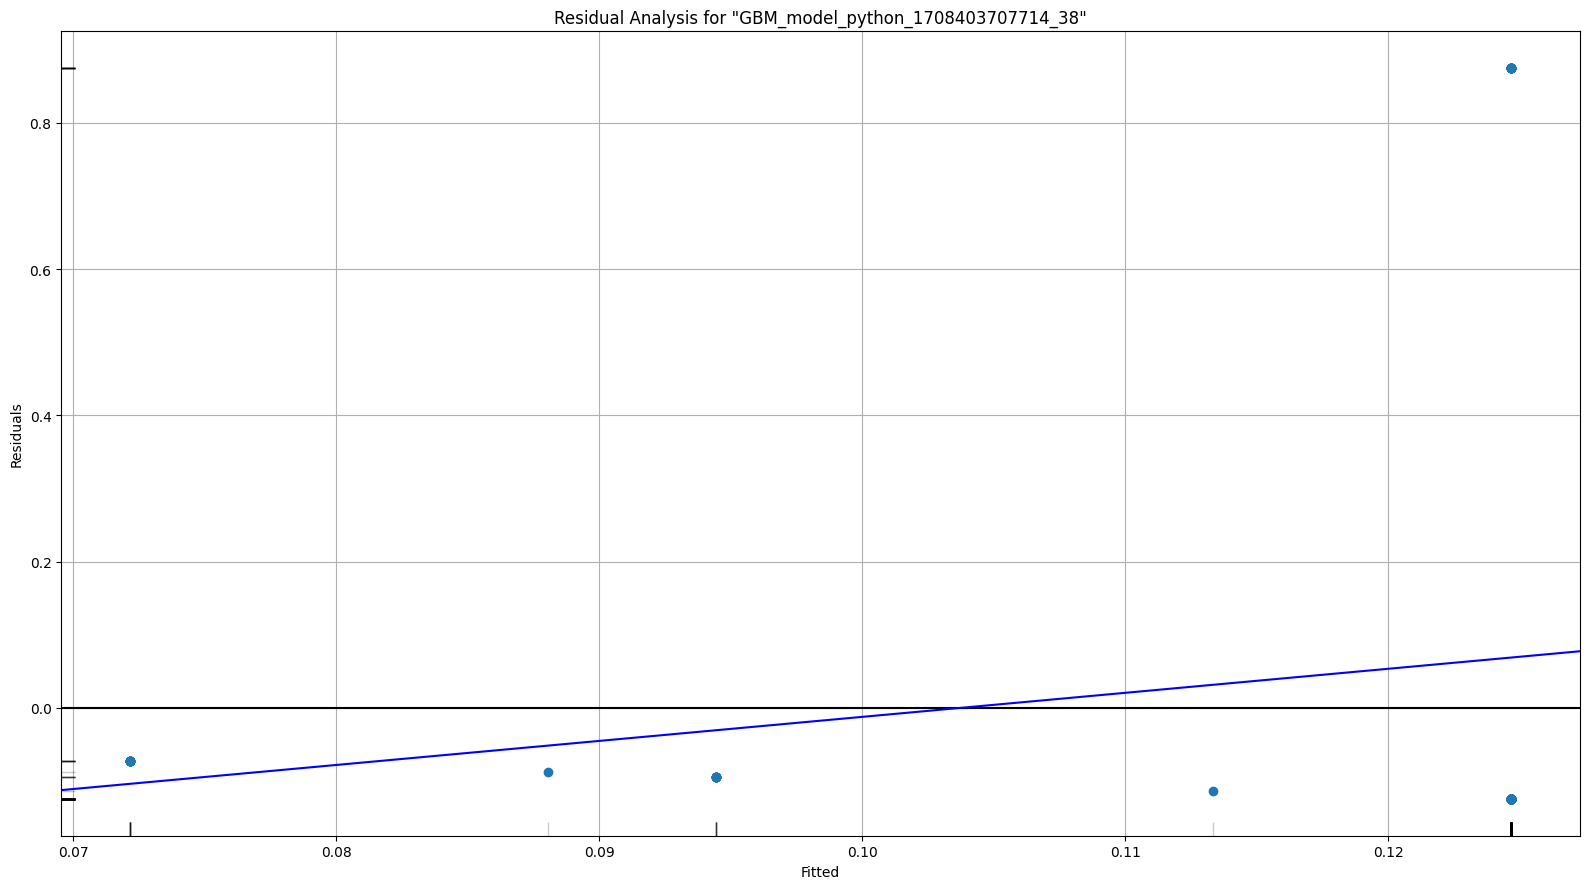

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

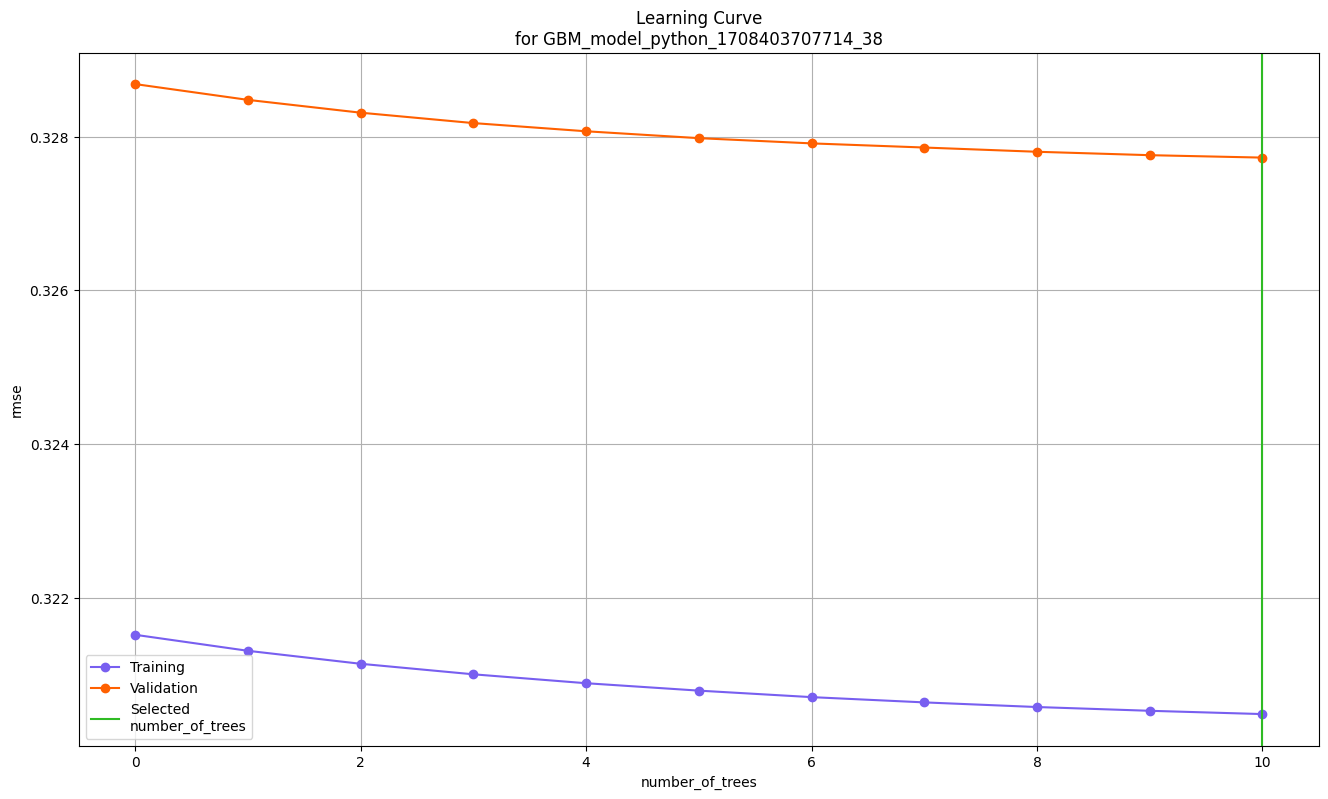

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

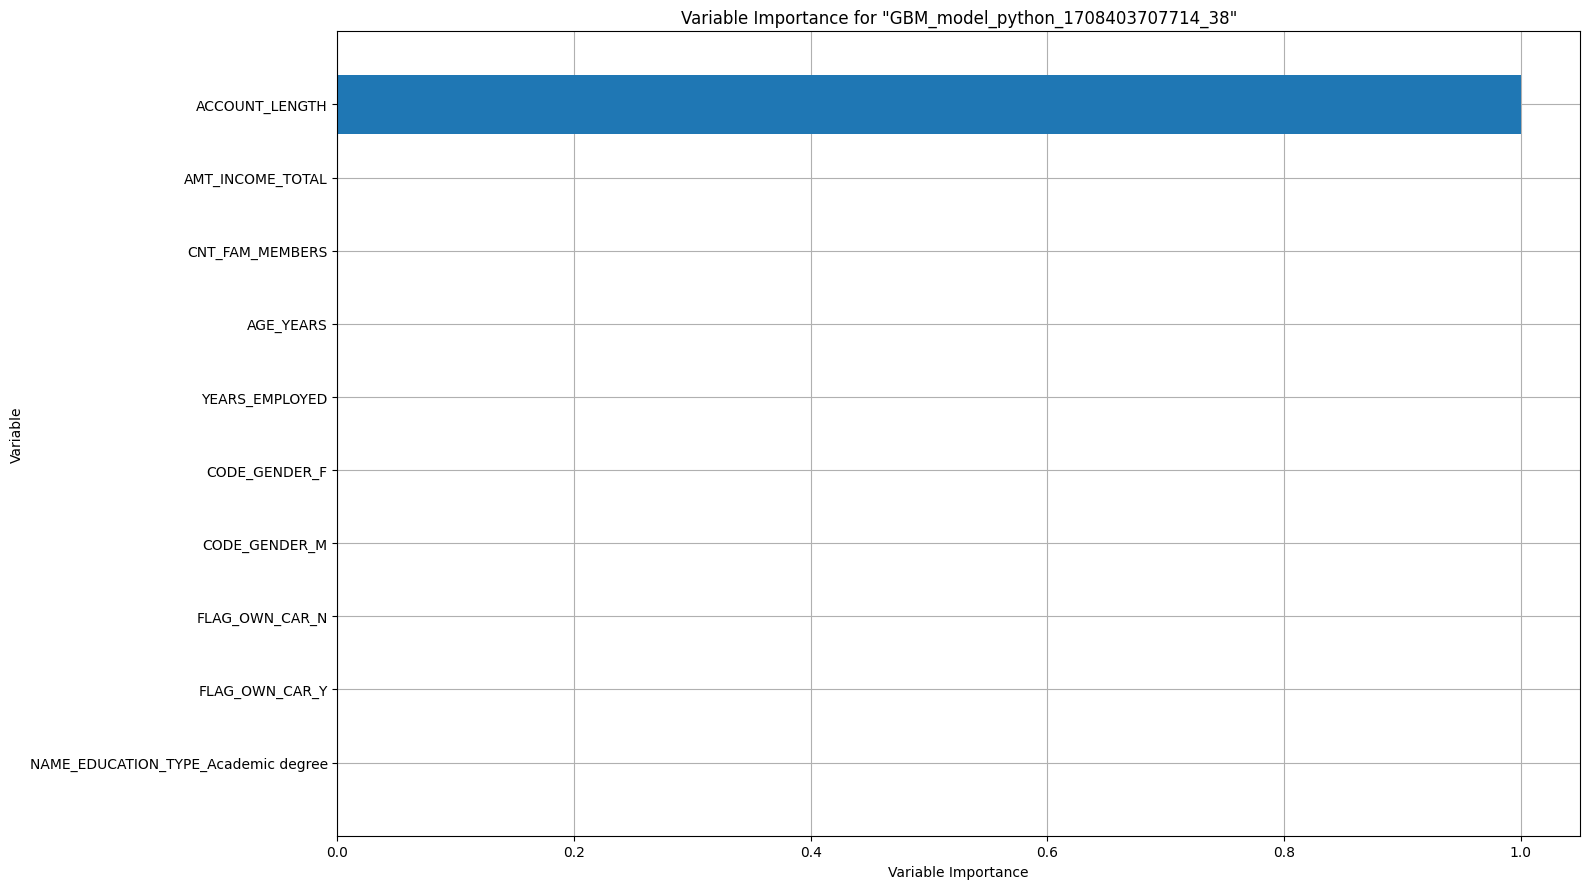

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:611: RuntimeWarning: invalid value encountered in divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))


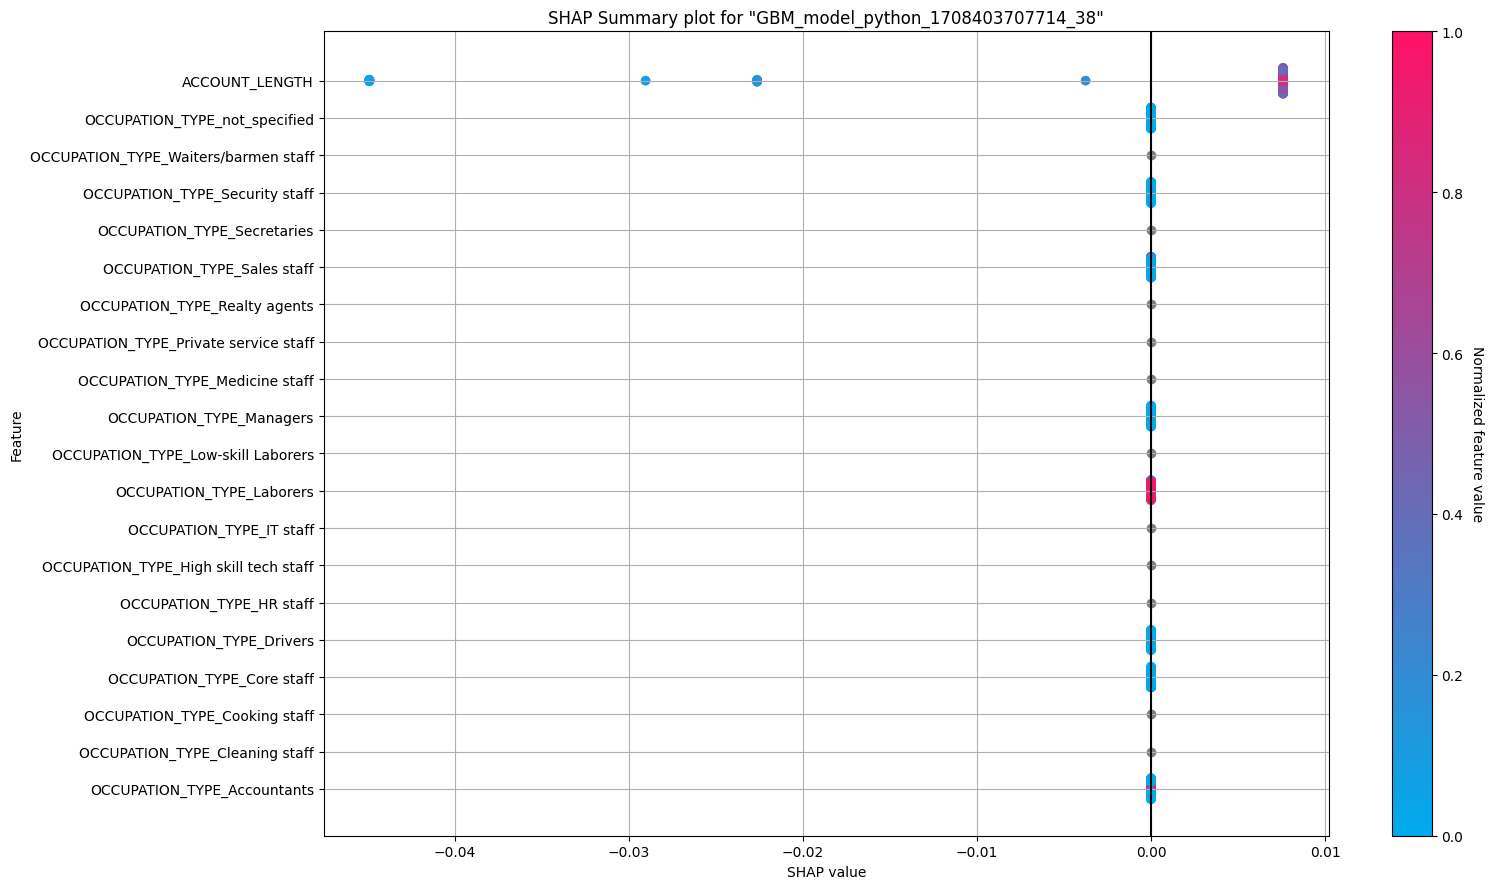

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

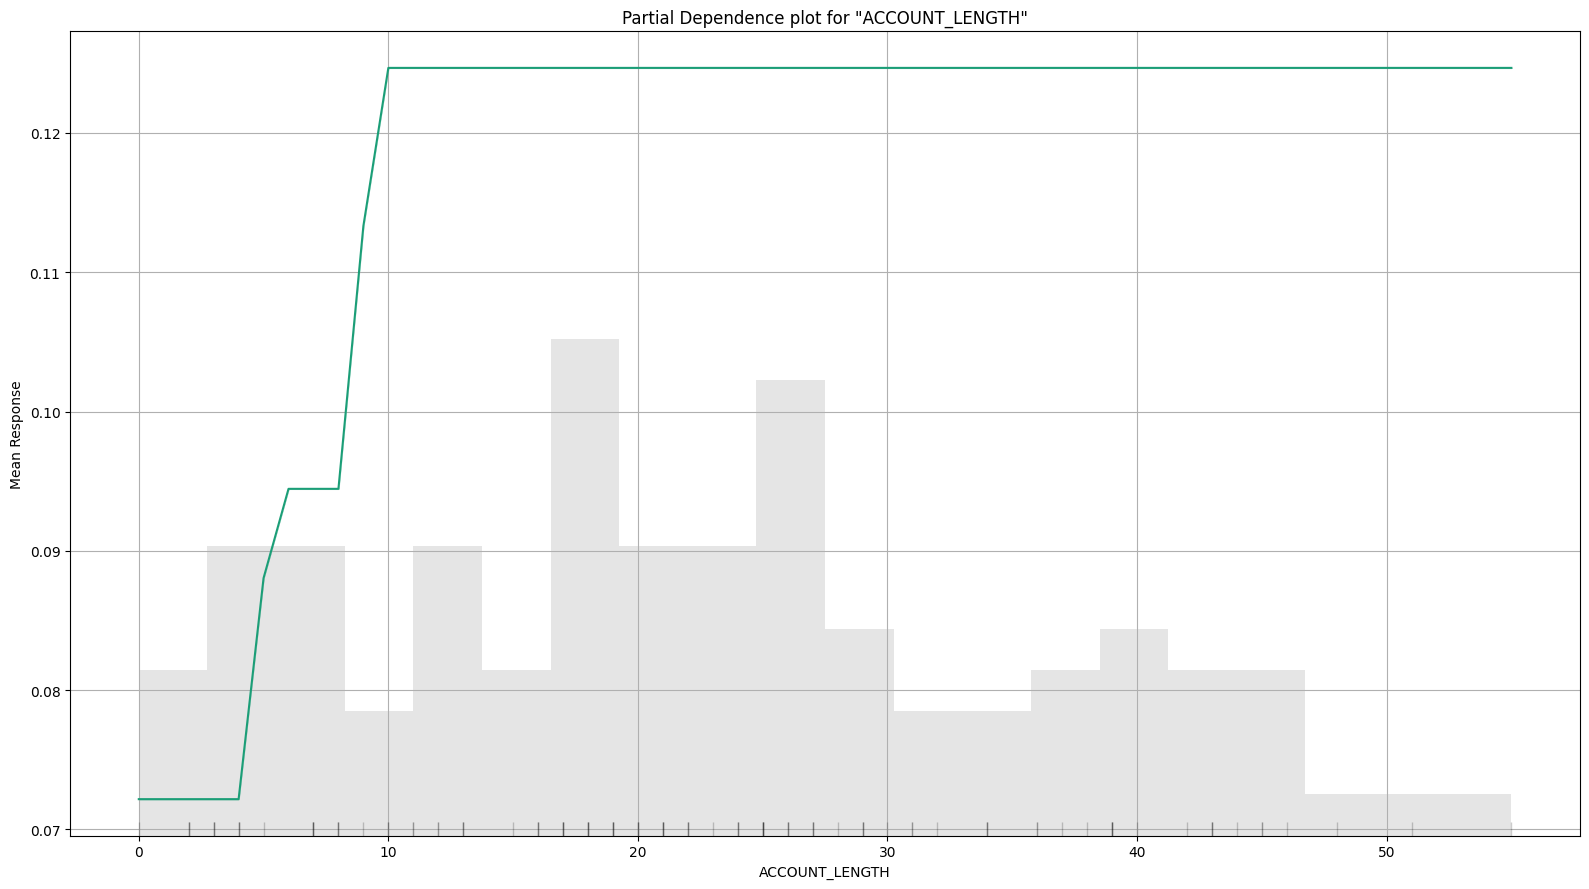

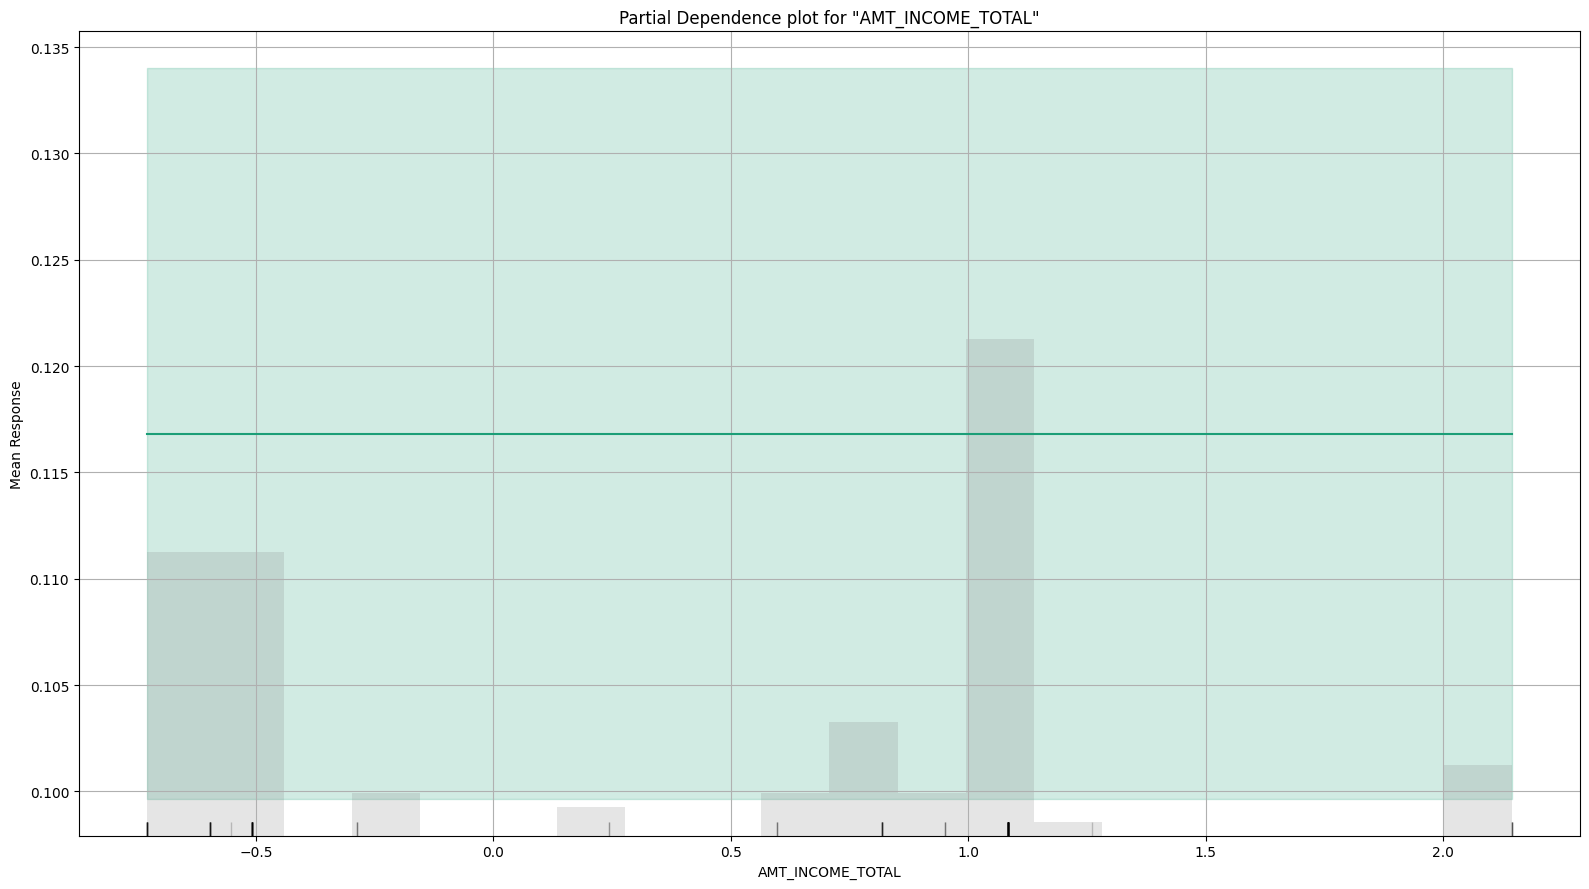

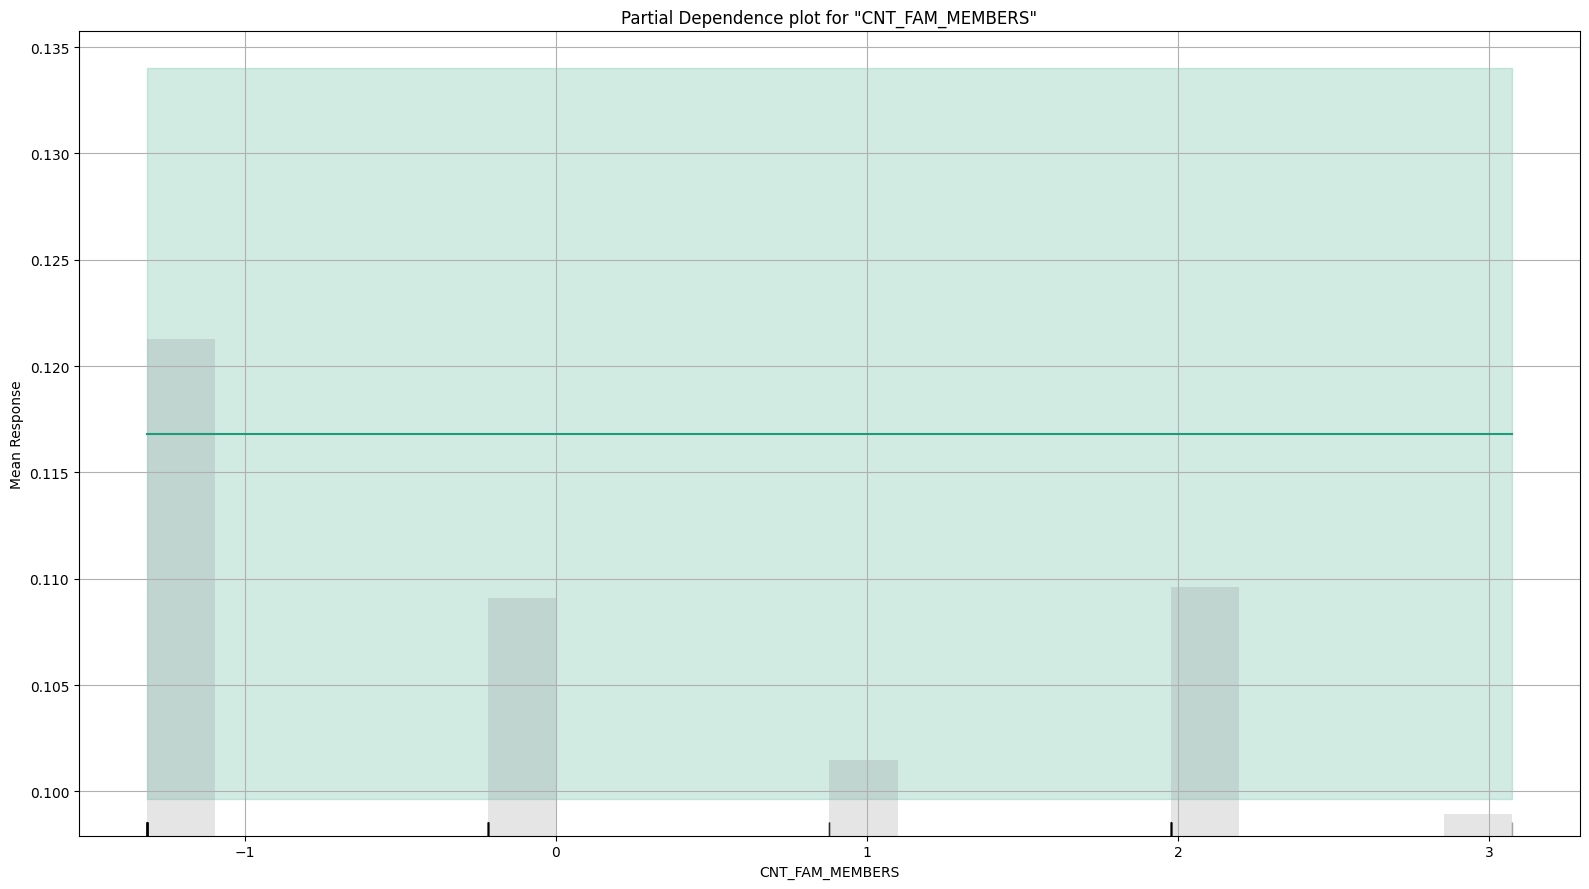

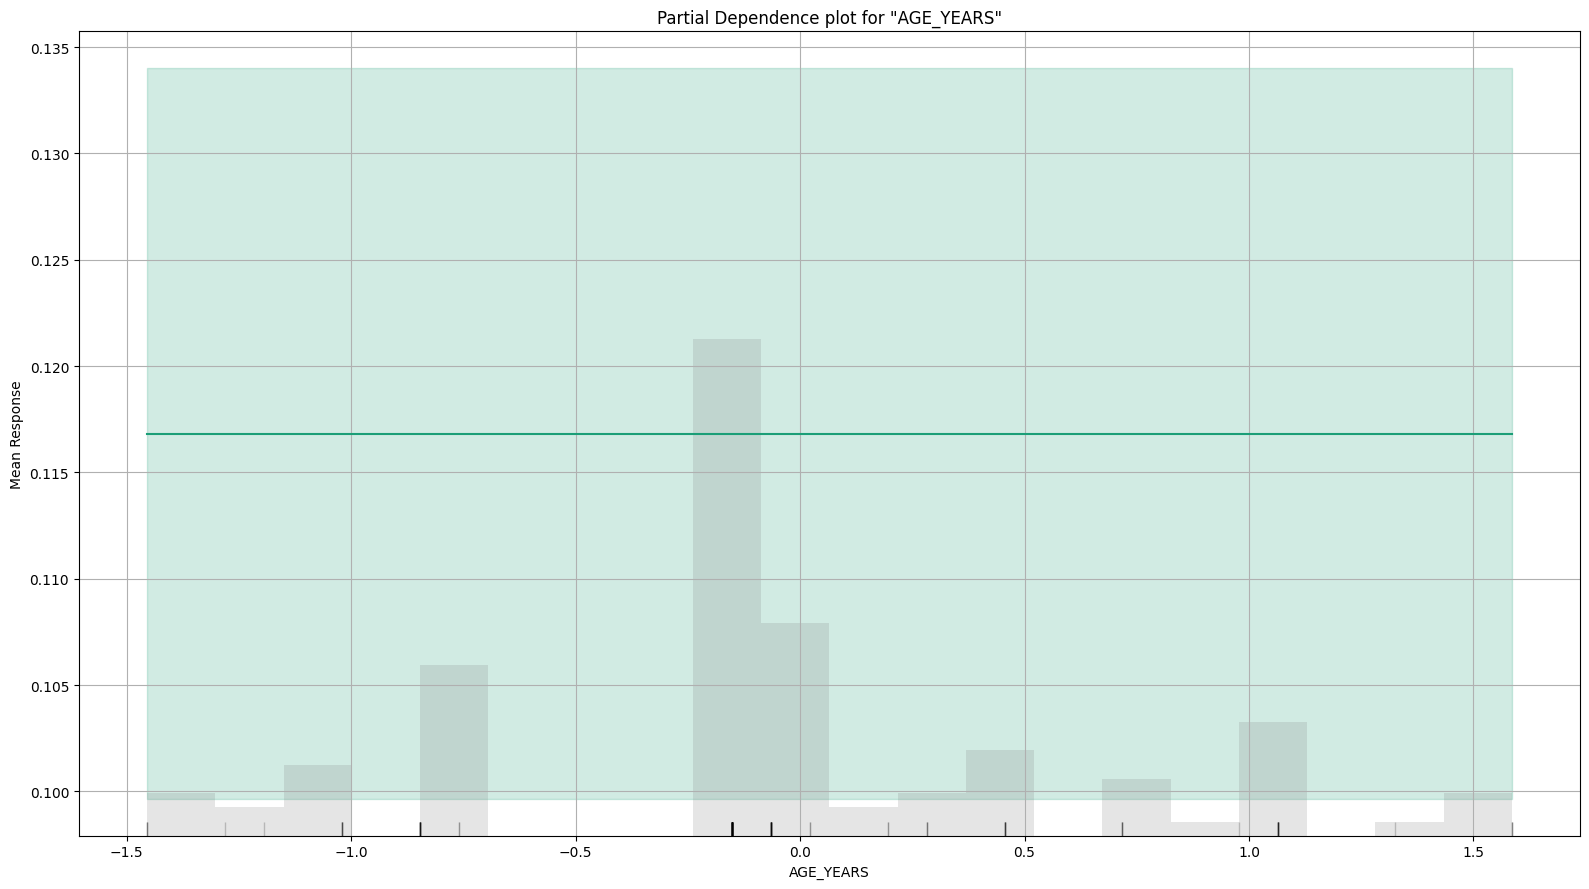

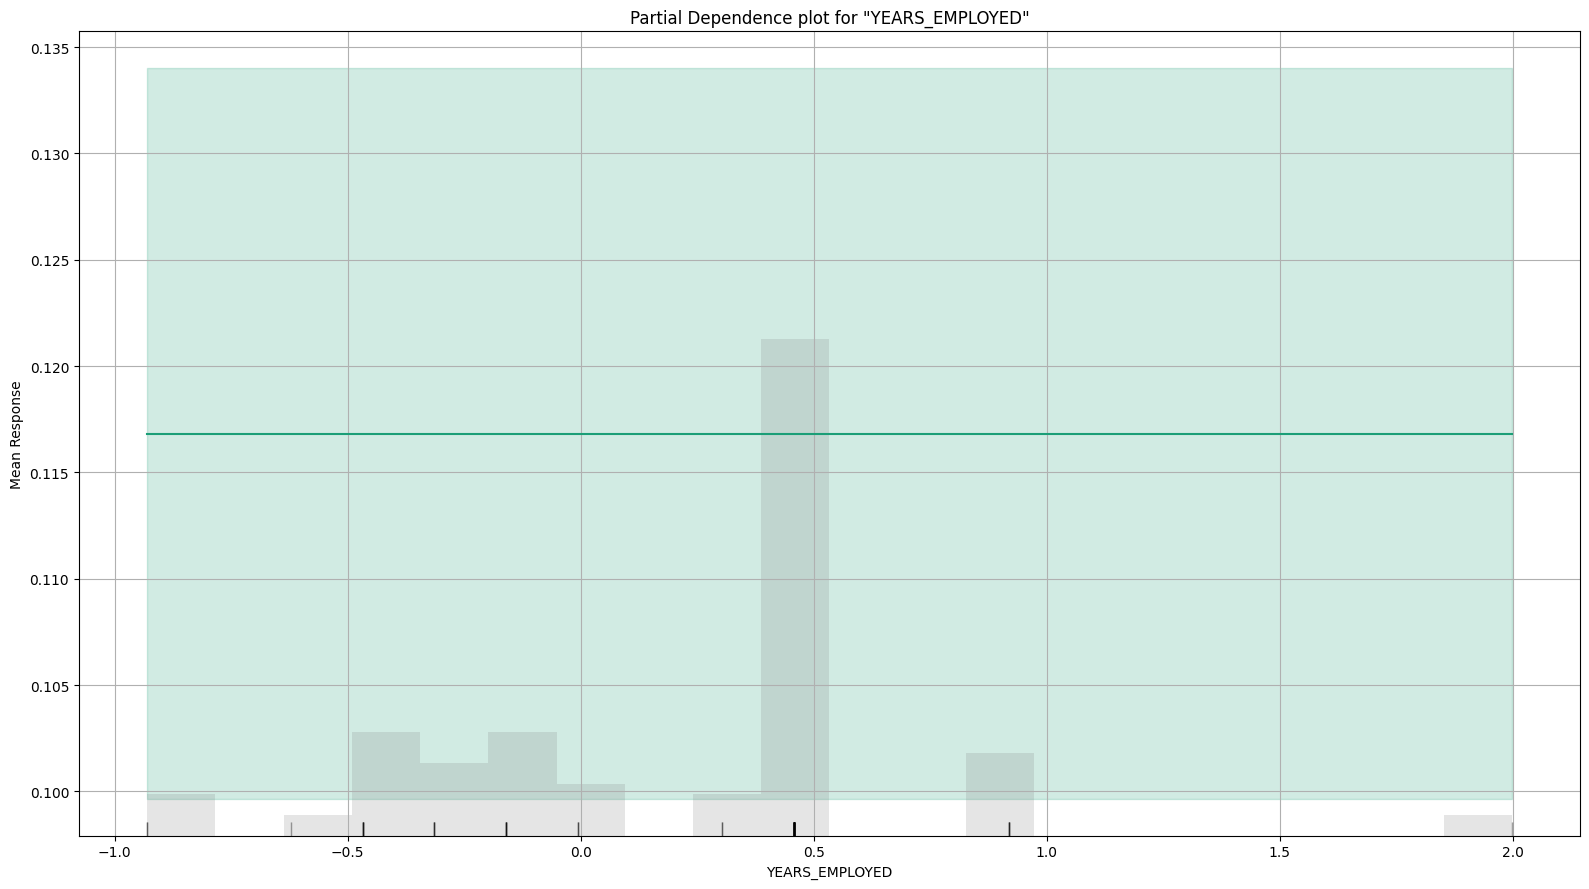

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

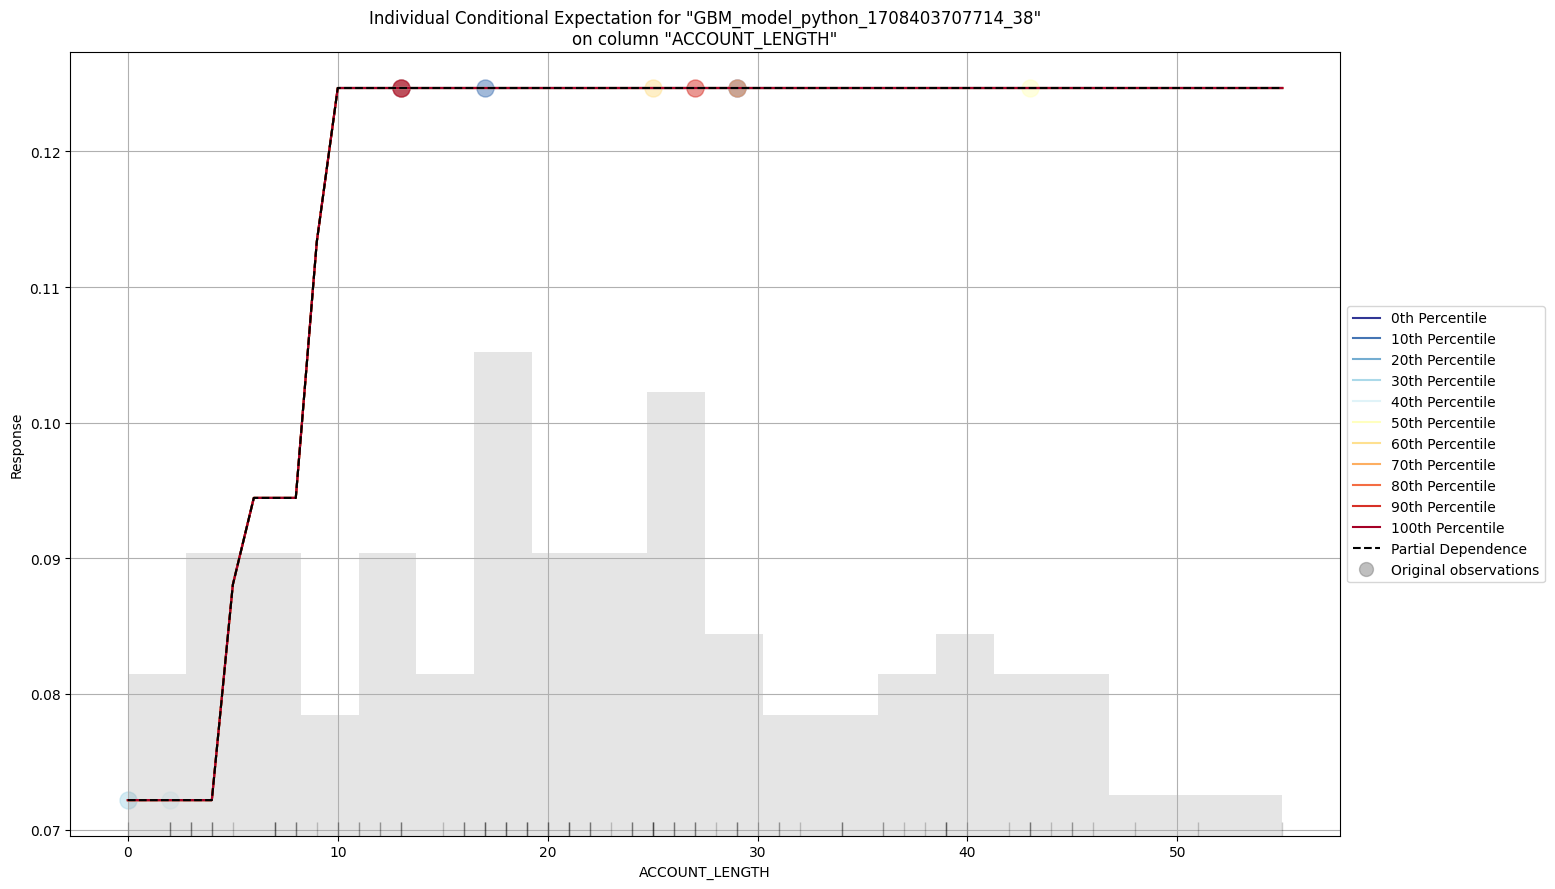

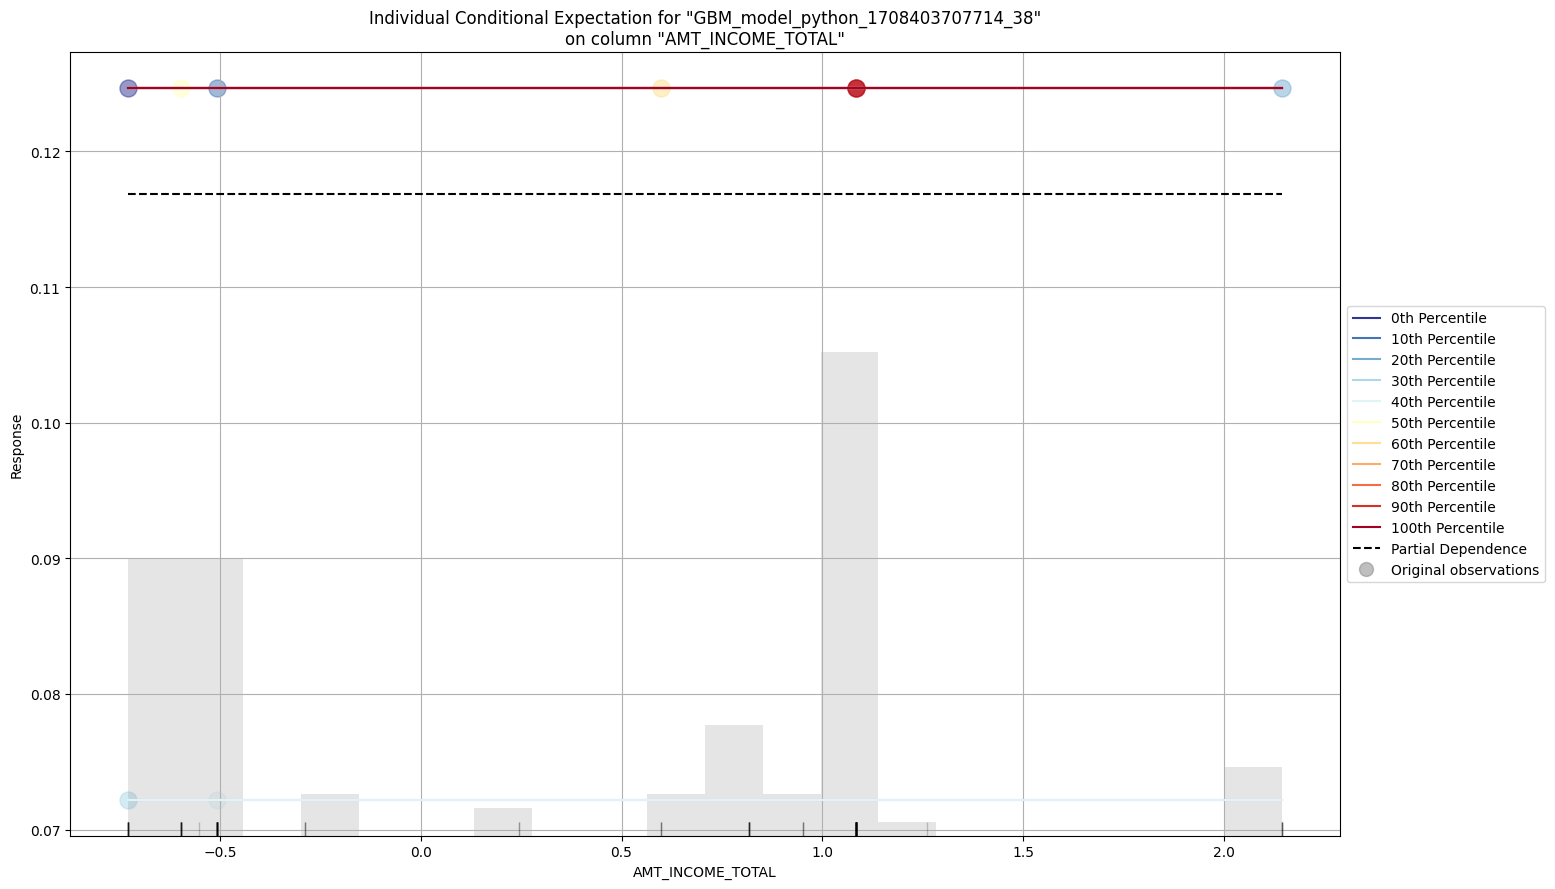

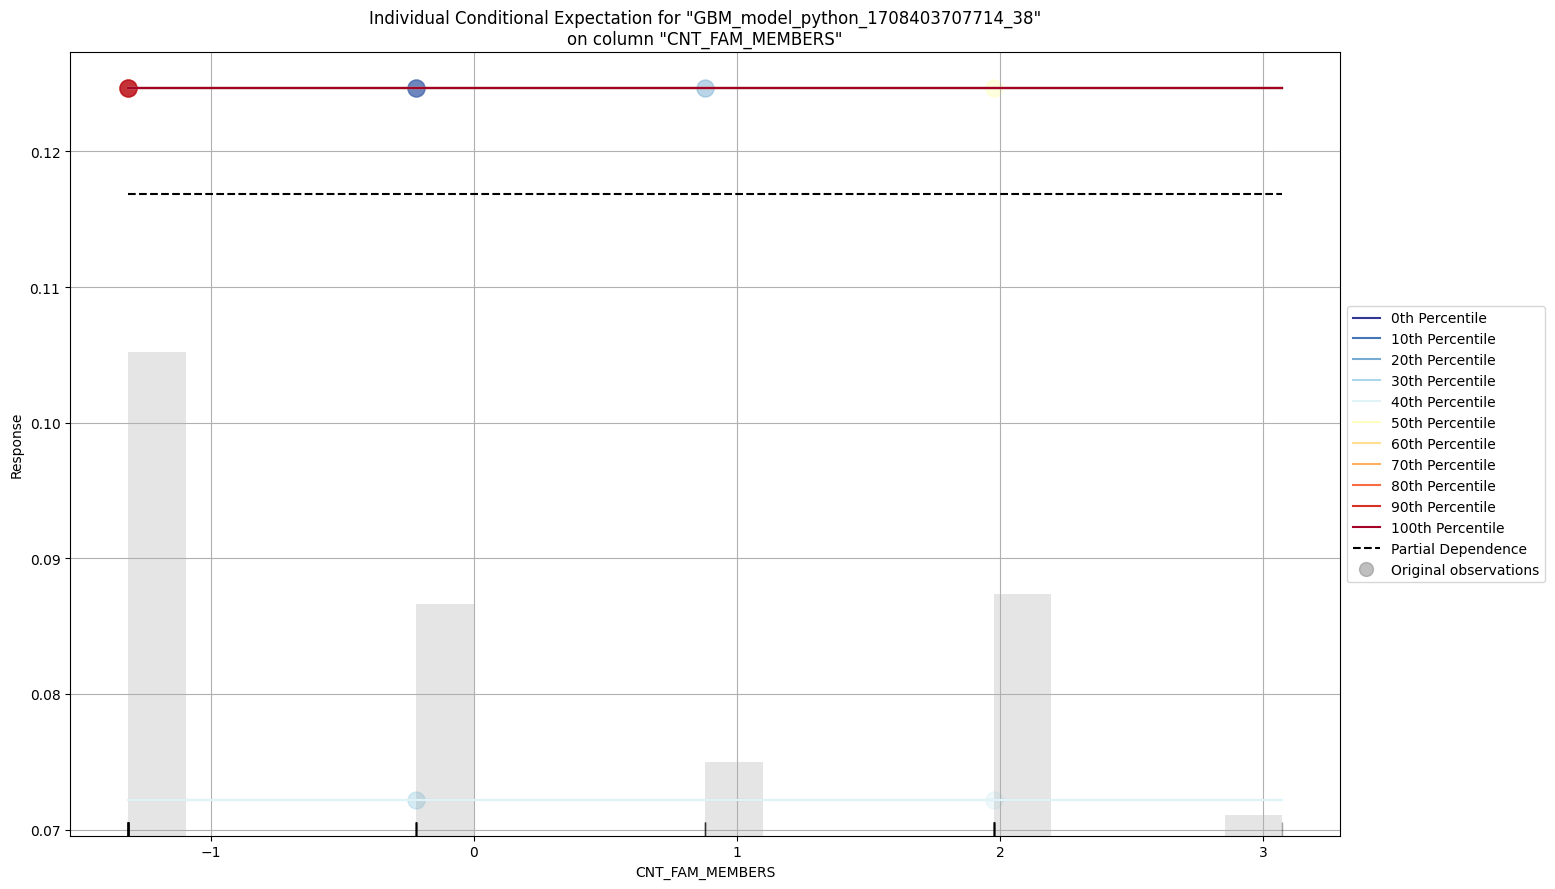

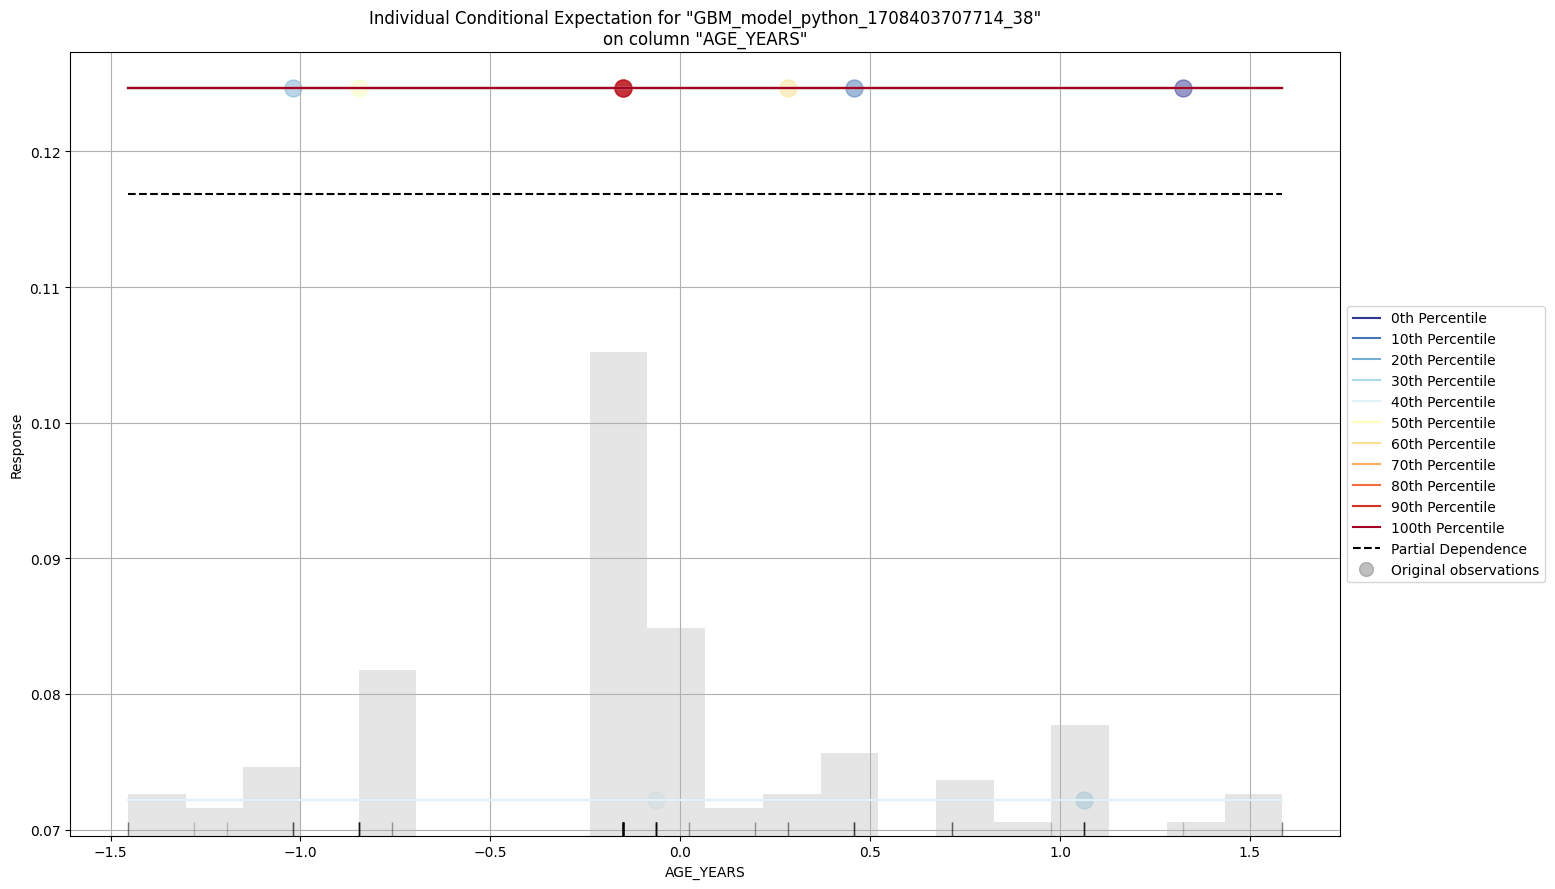

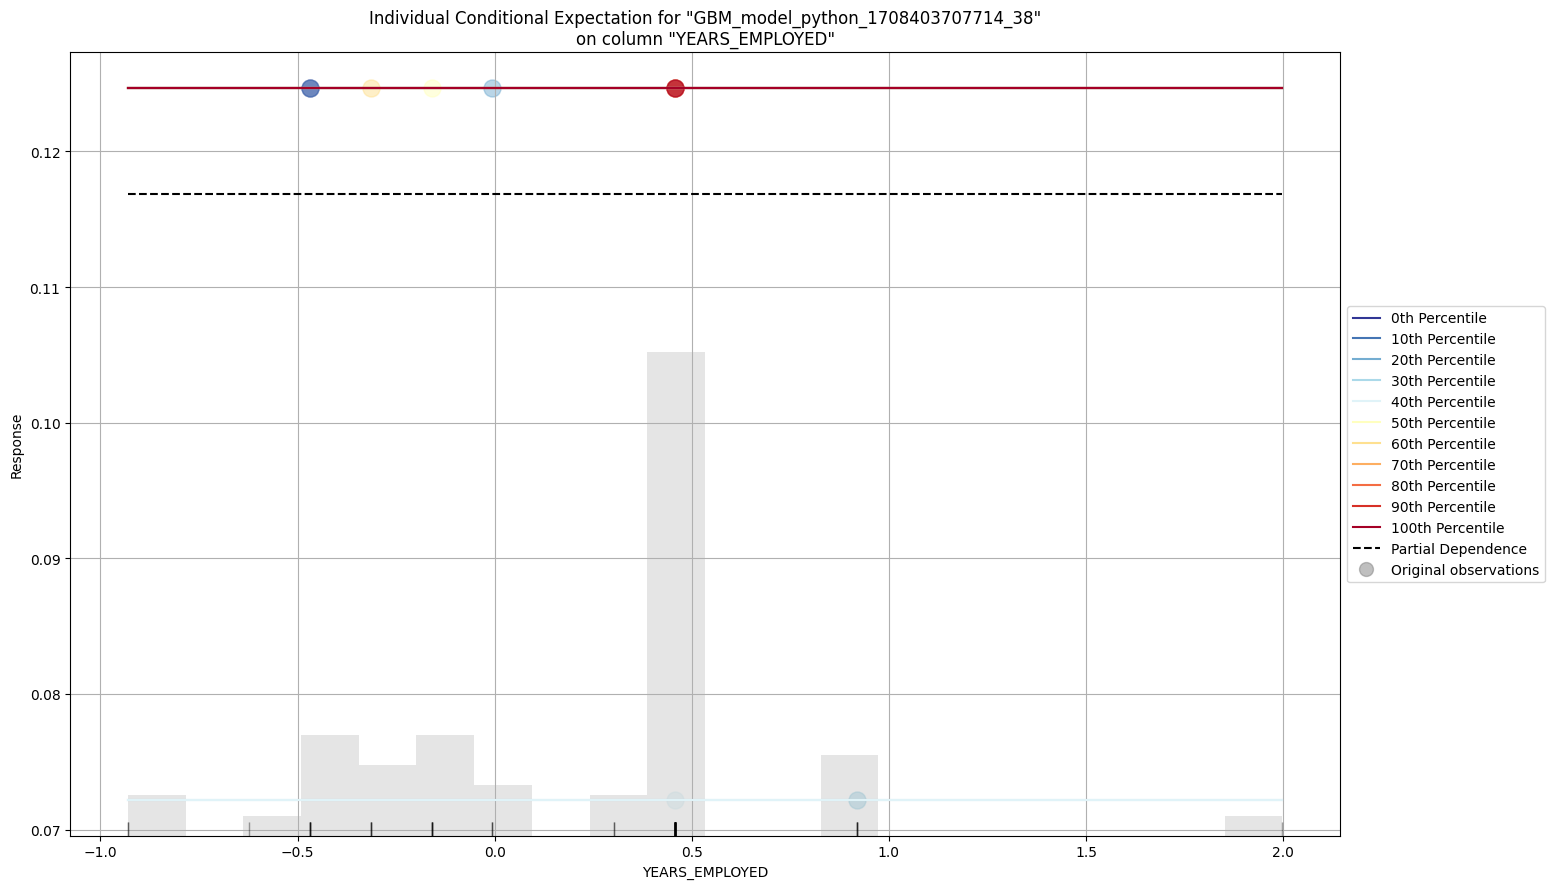

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

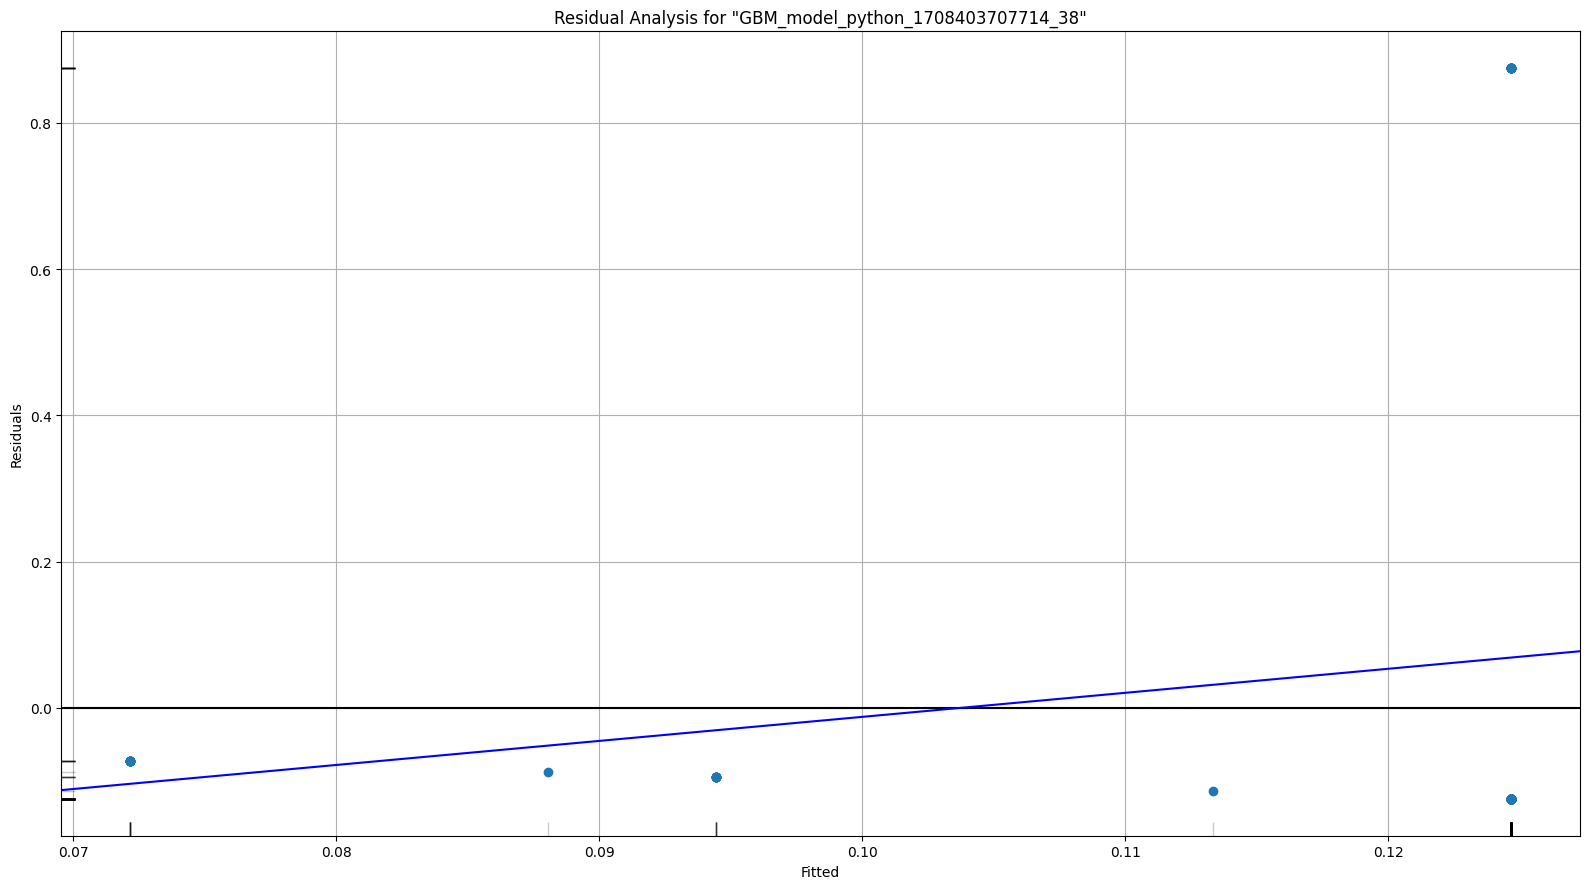

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

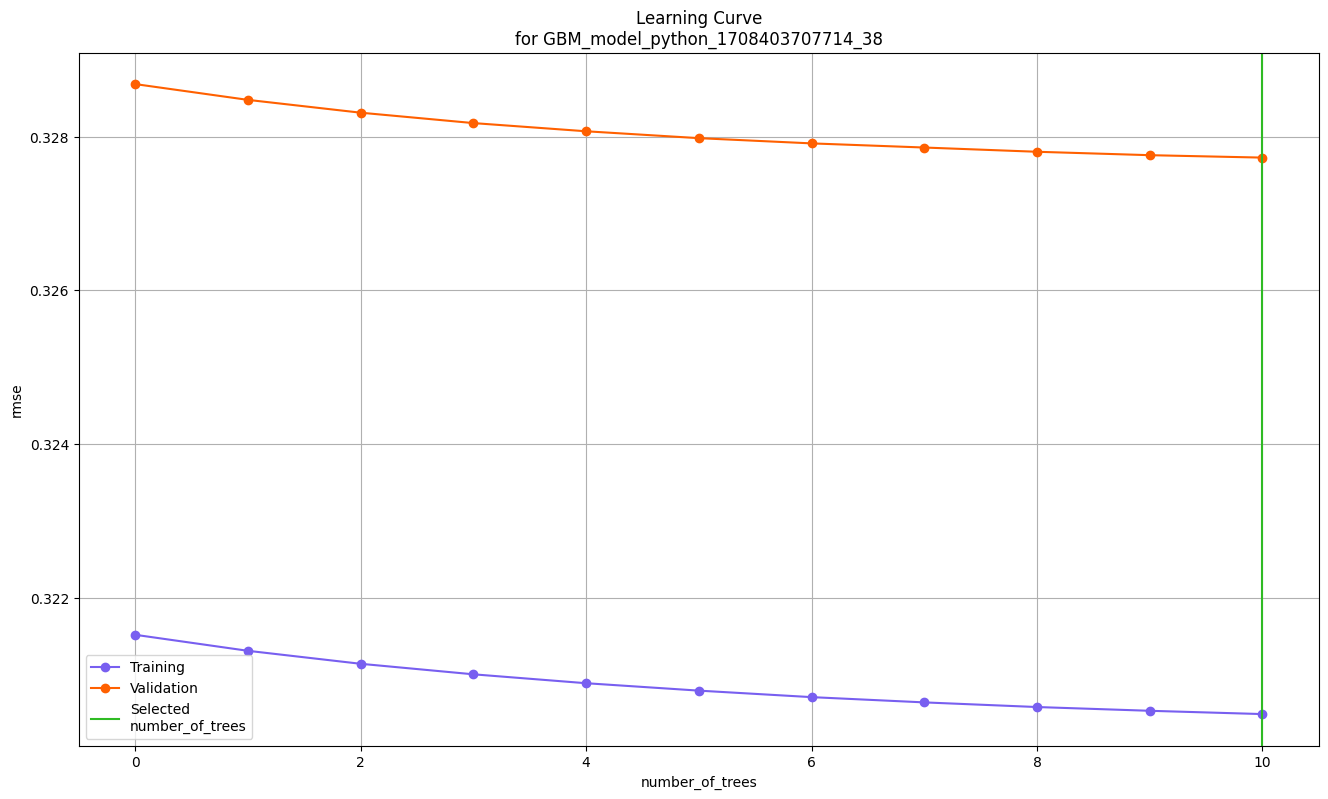

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

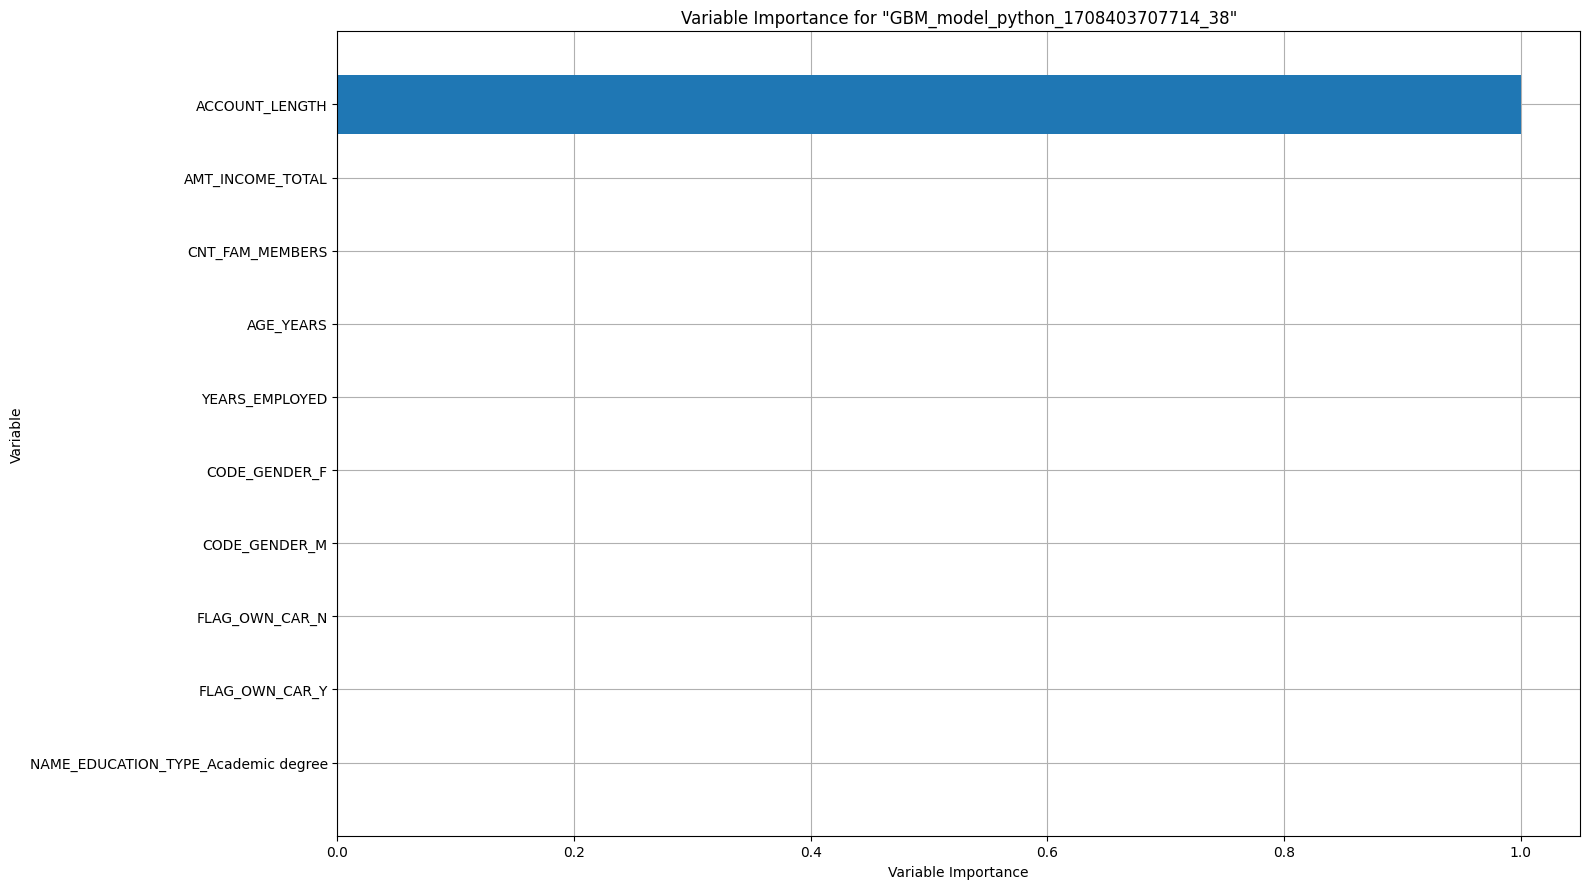

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

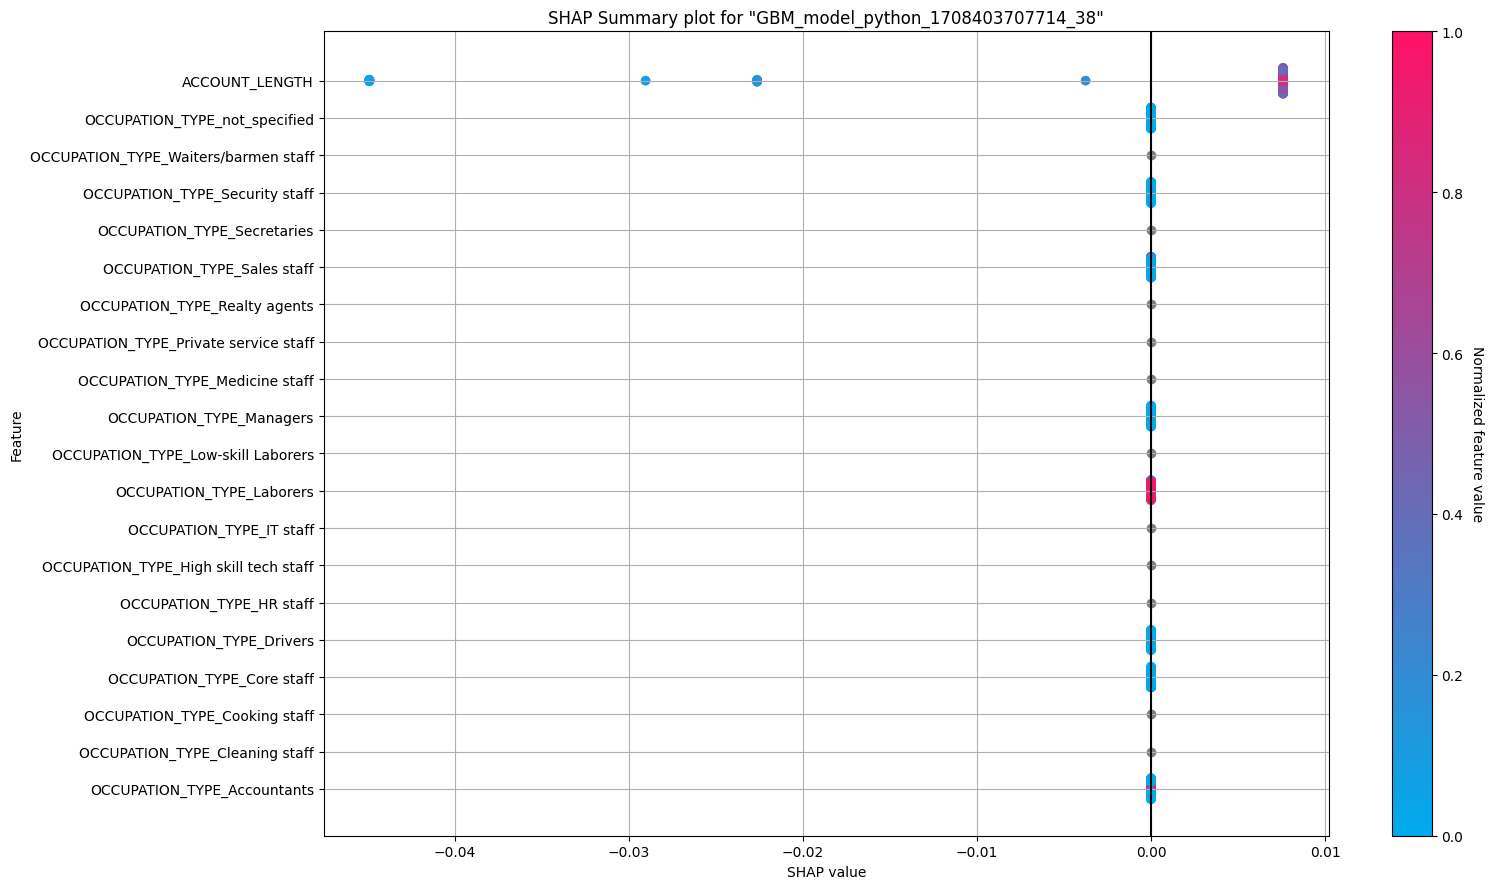

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

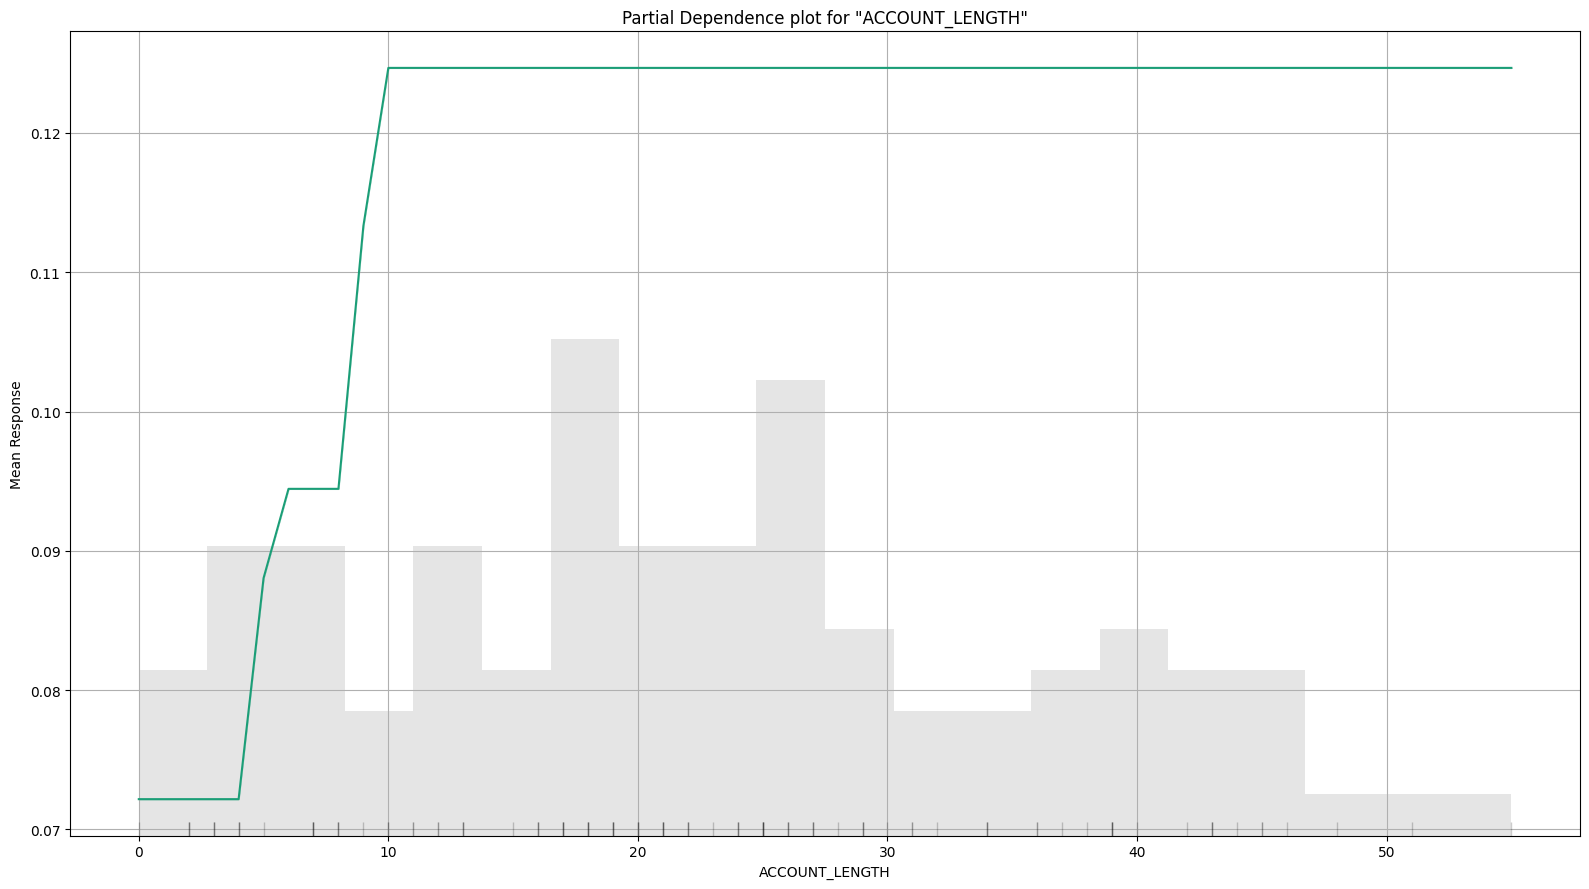

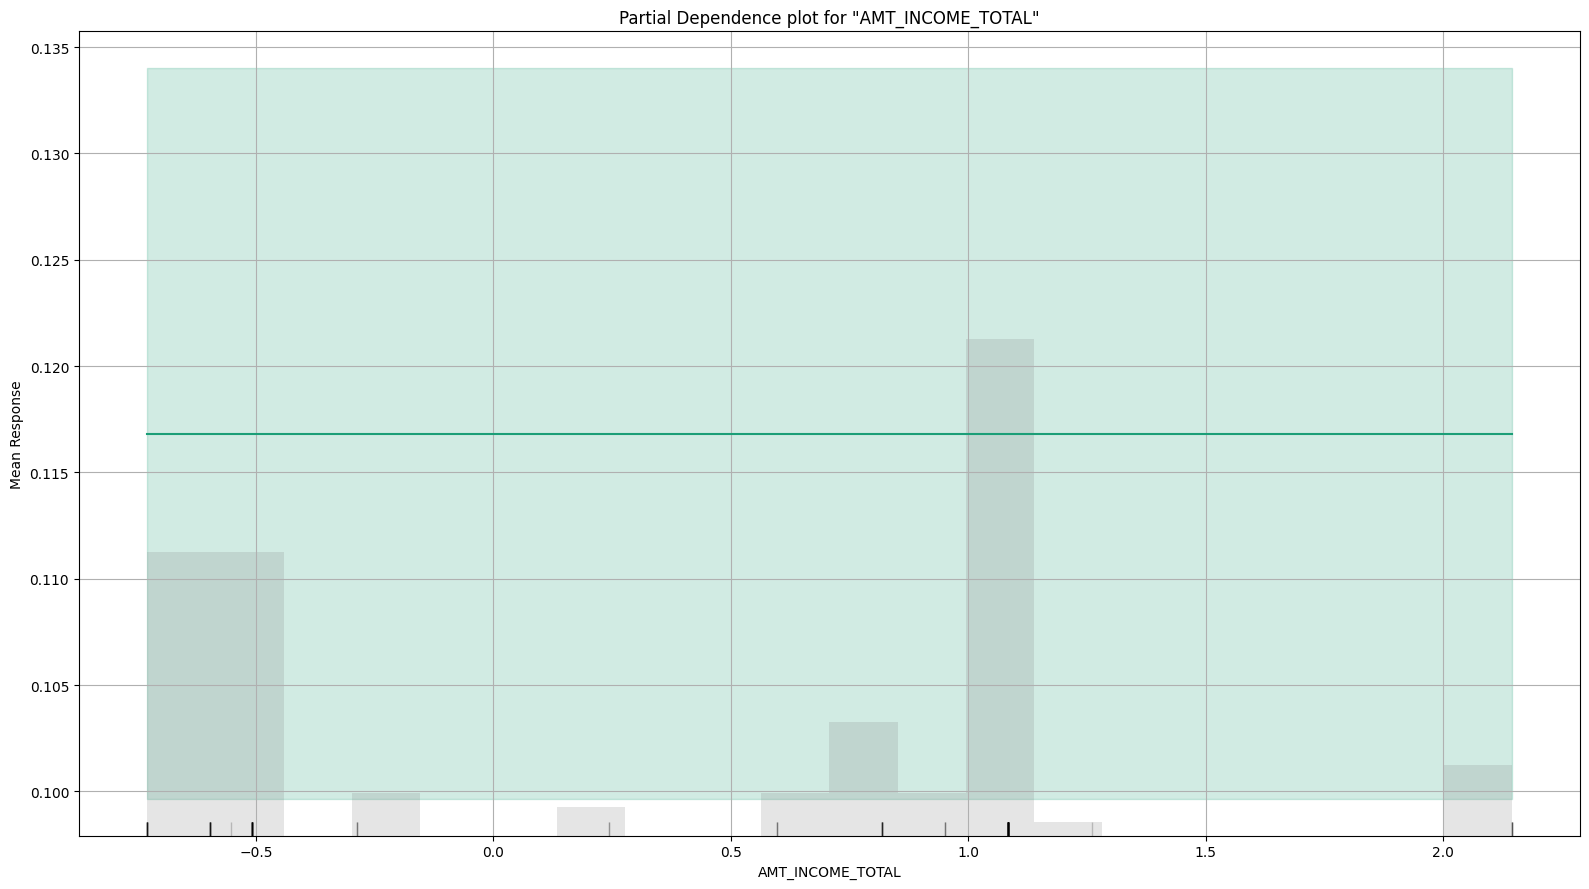

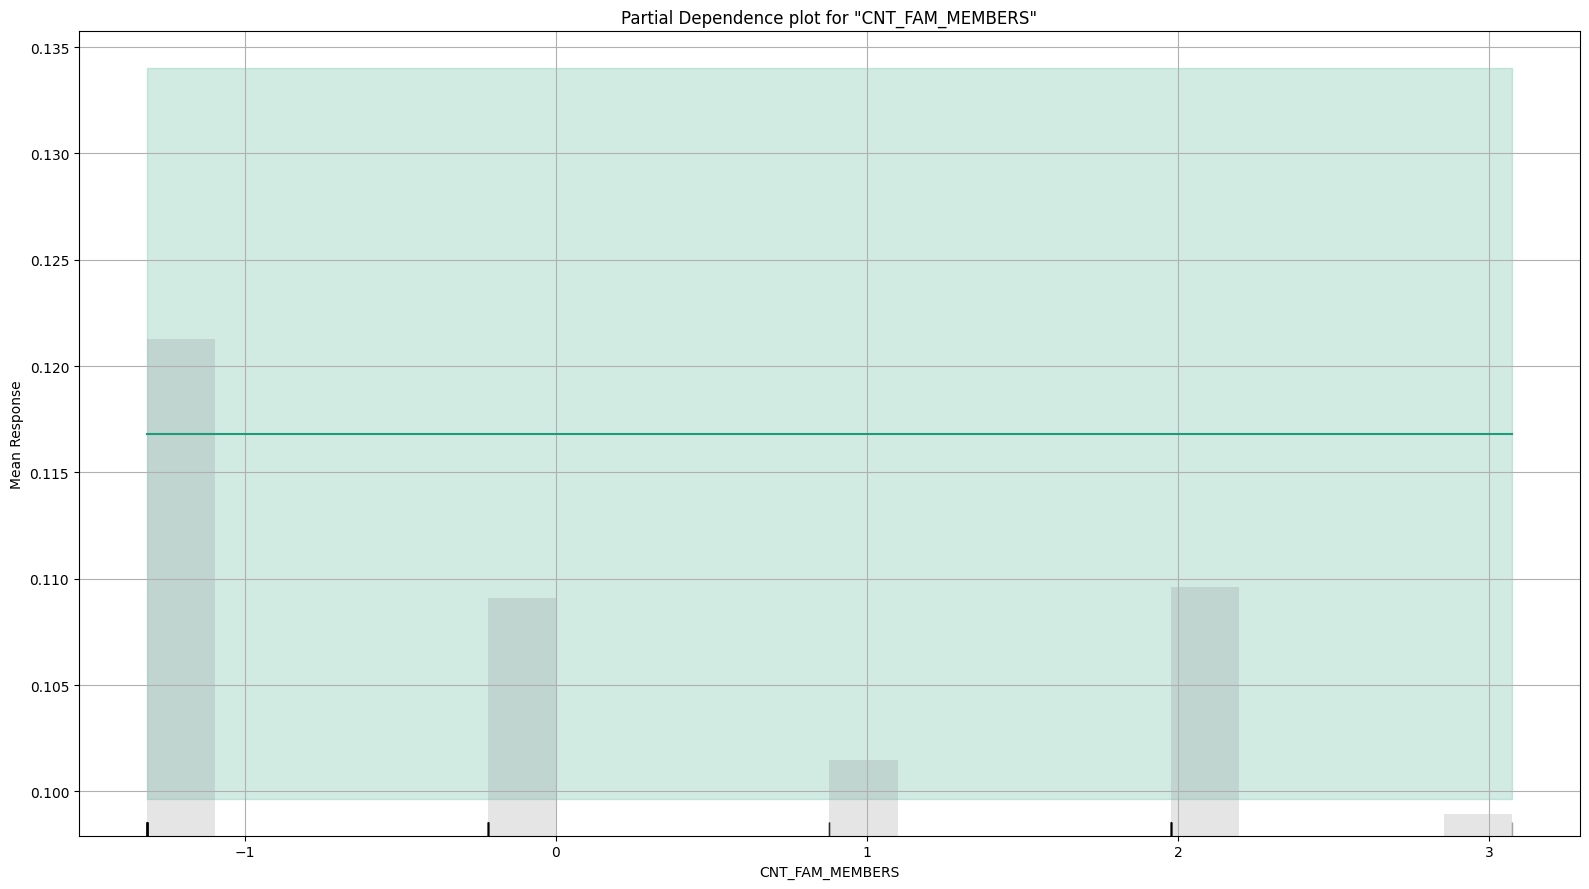

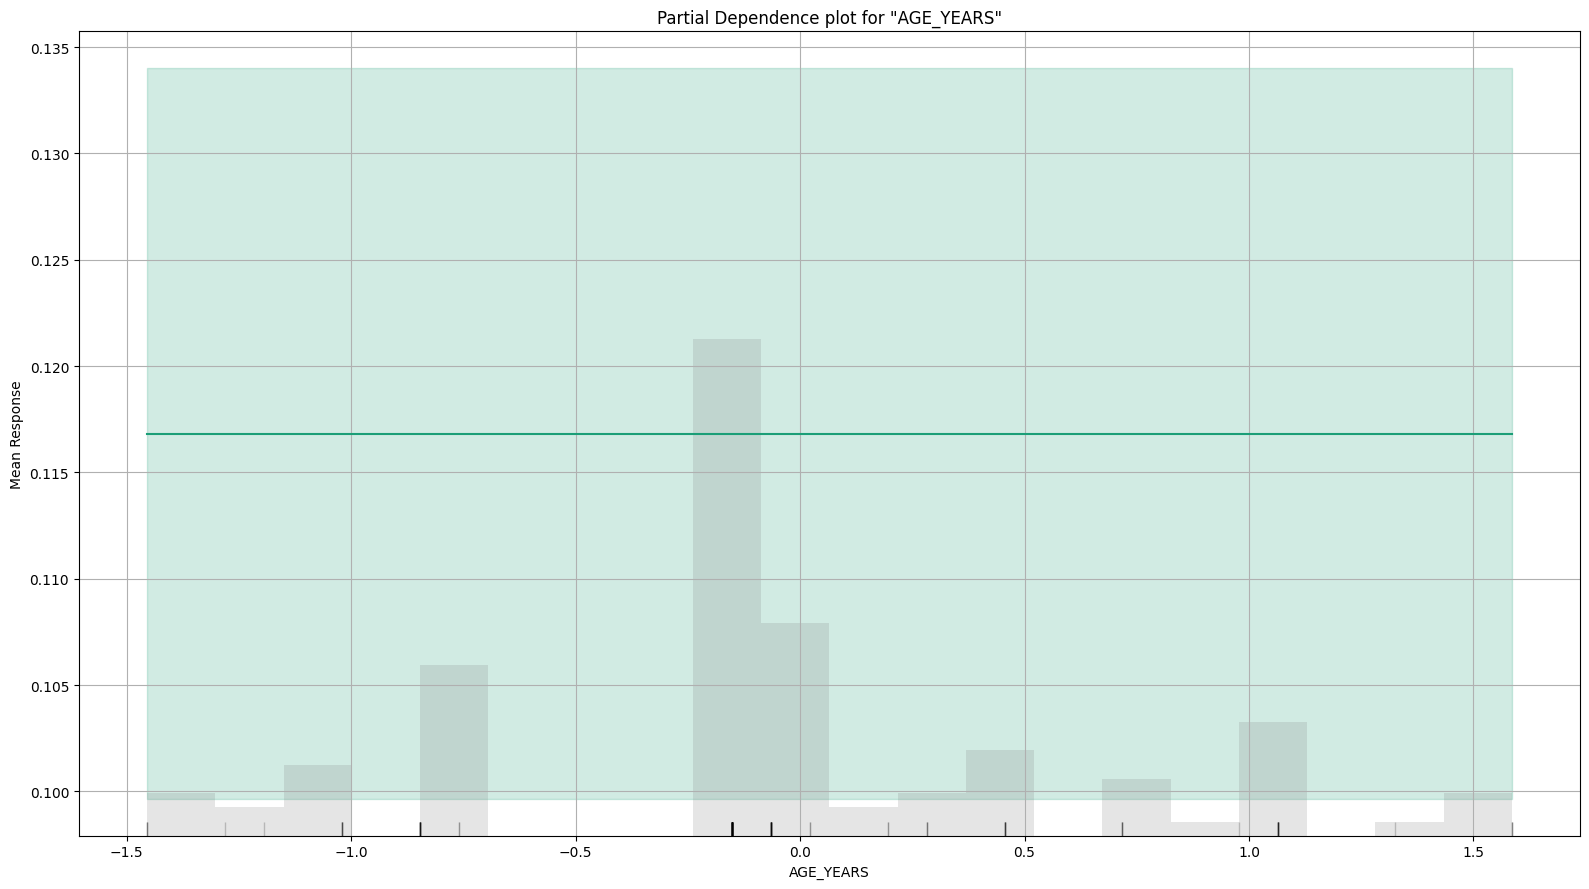

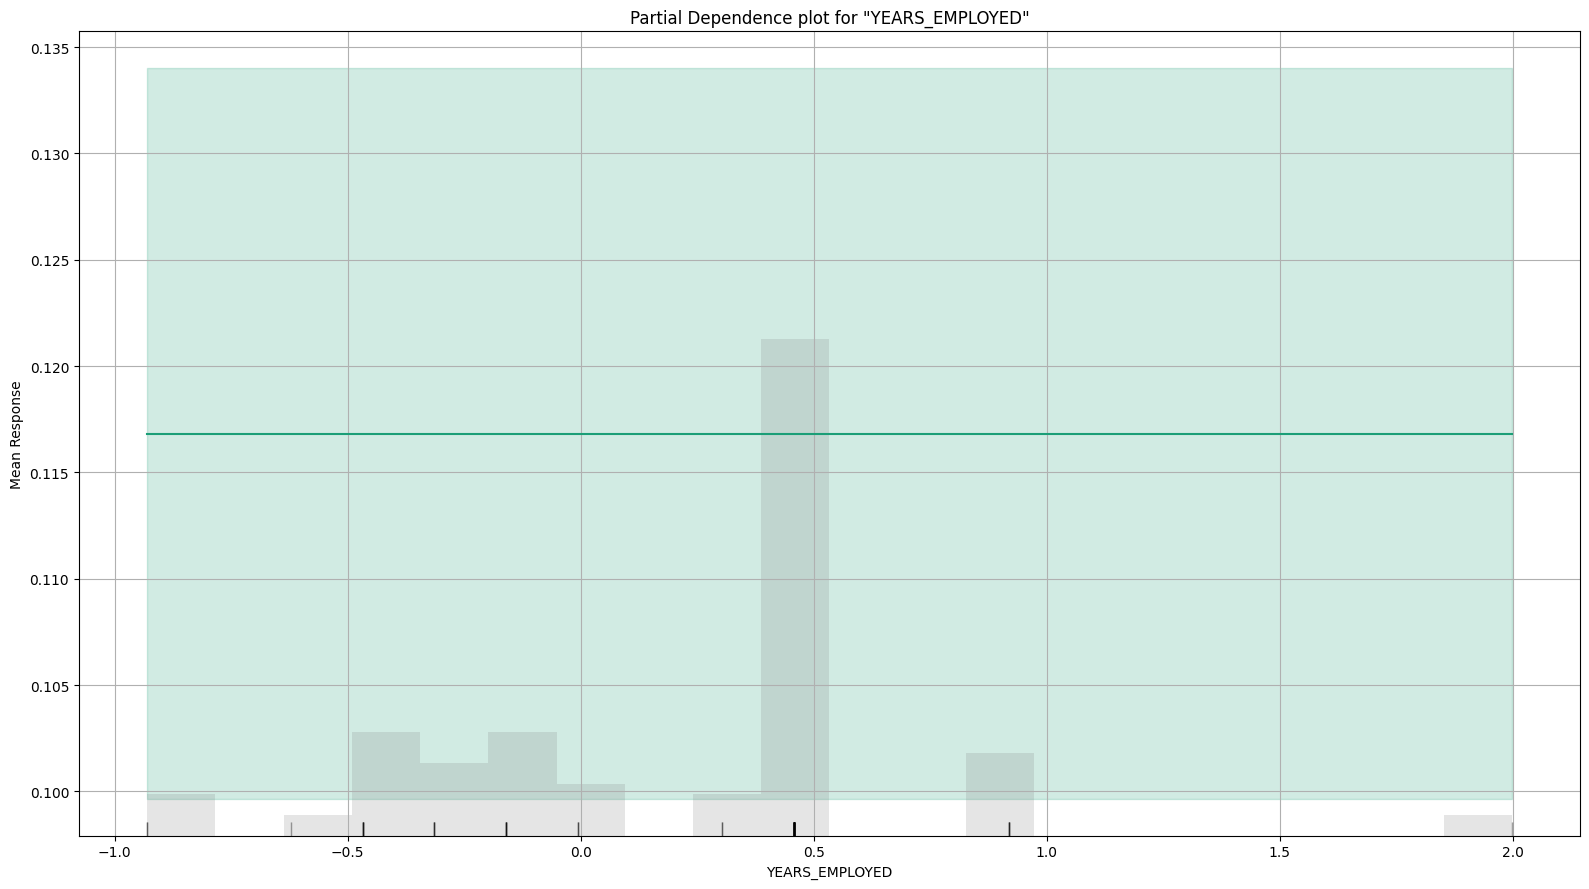

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

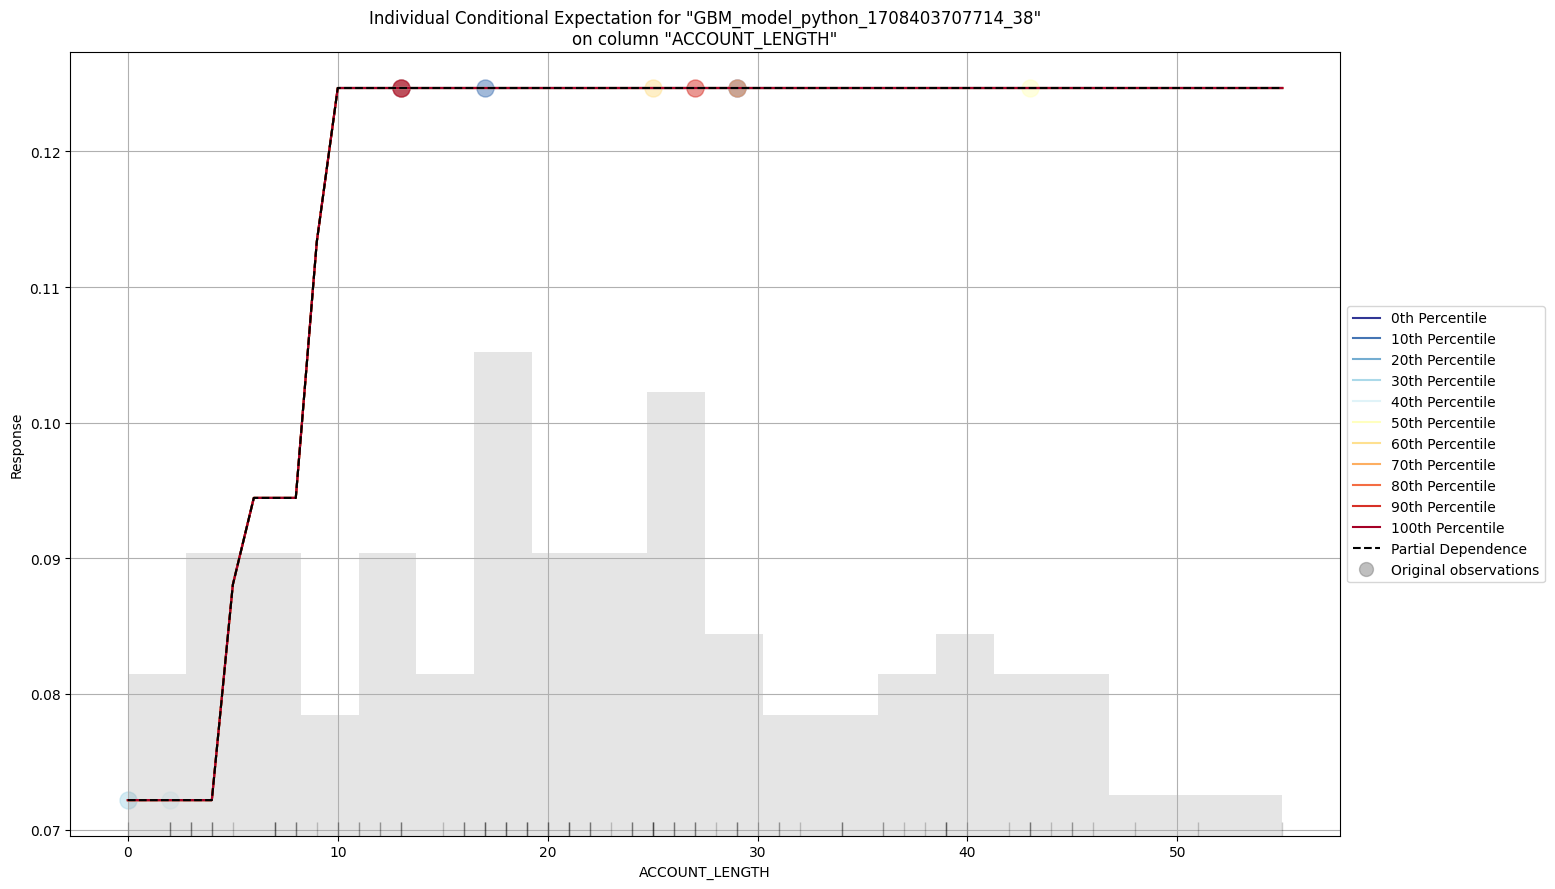

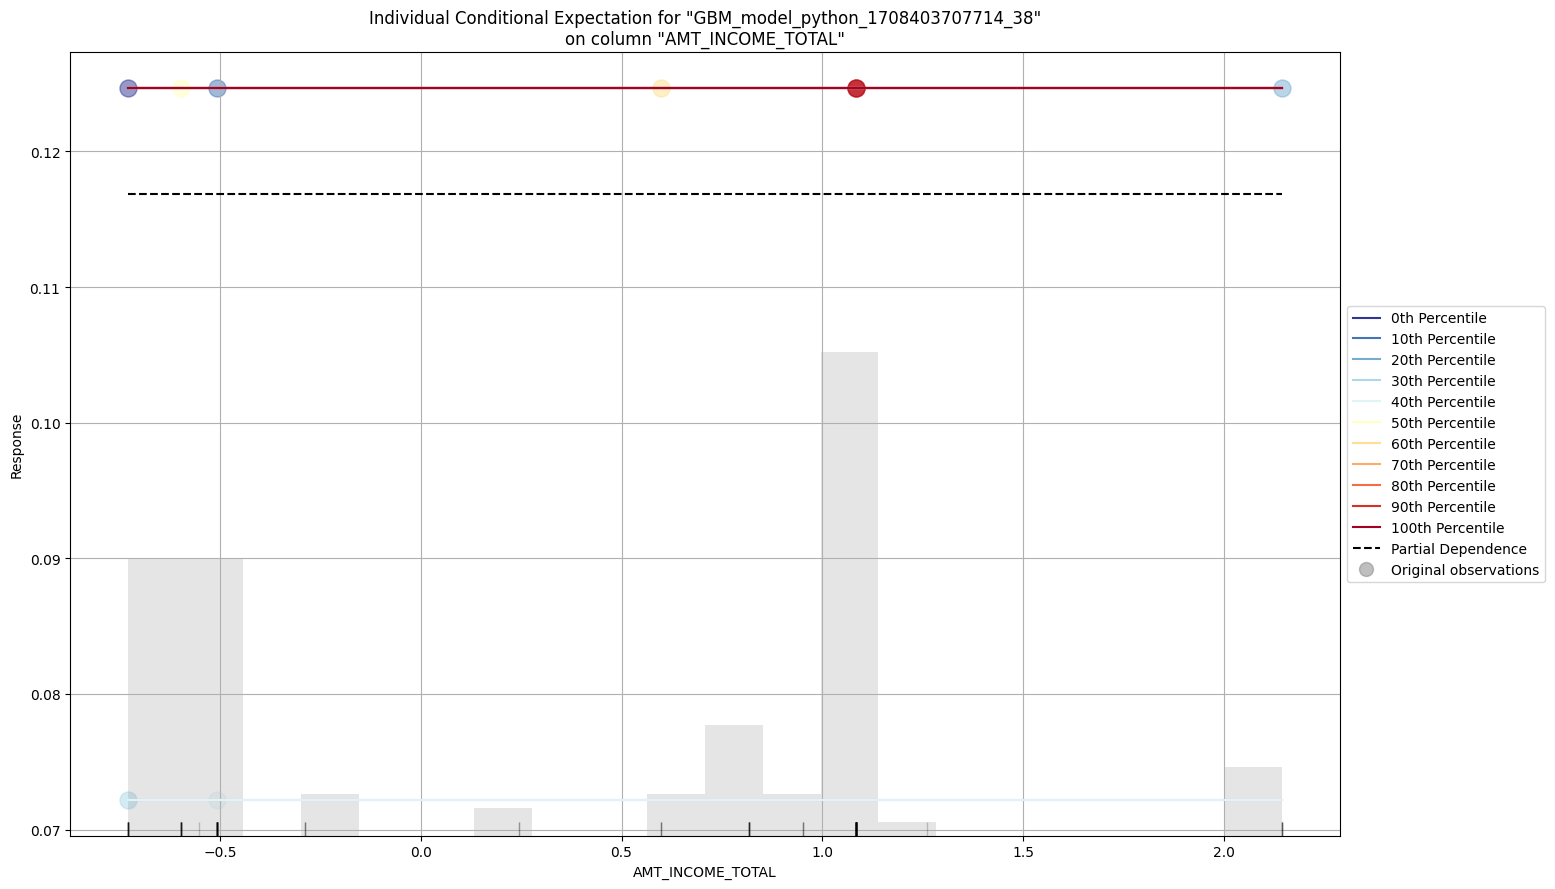

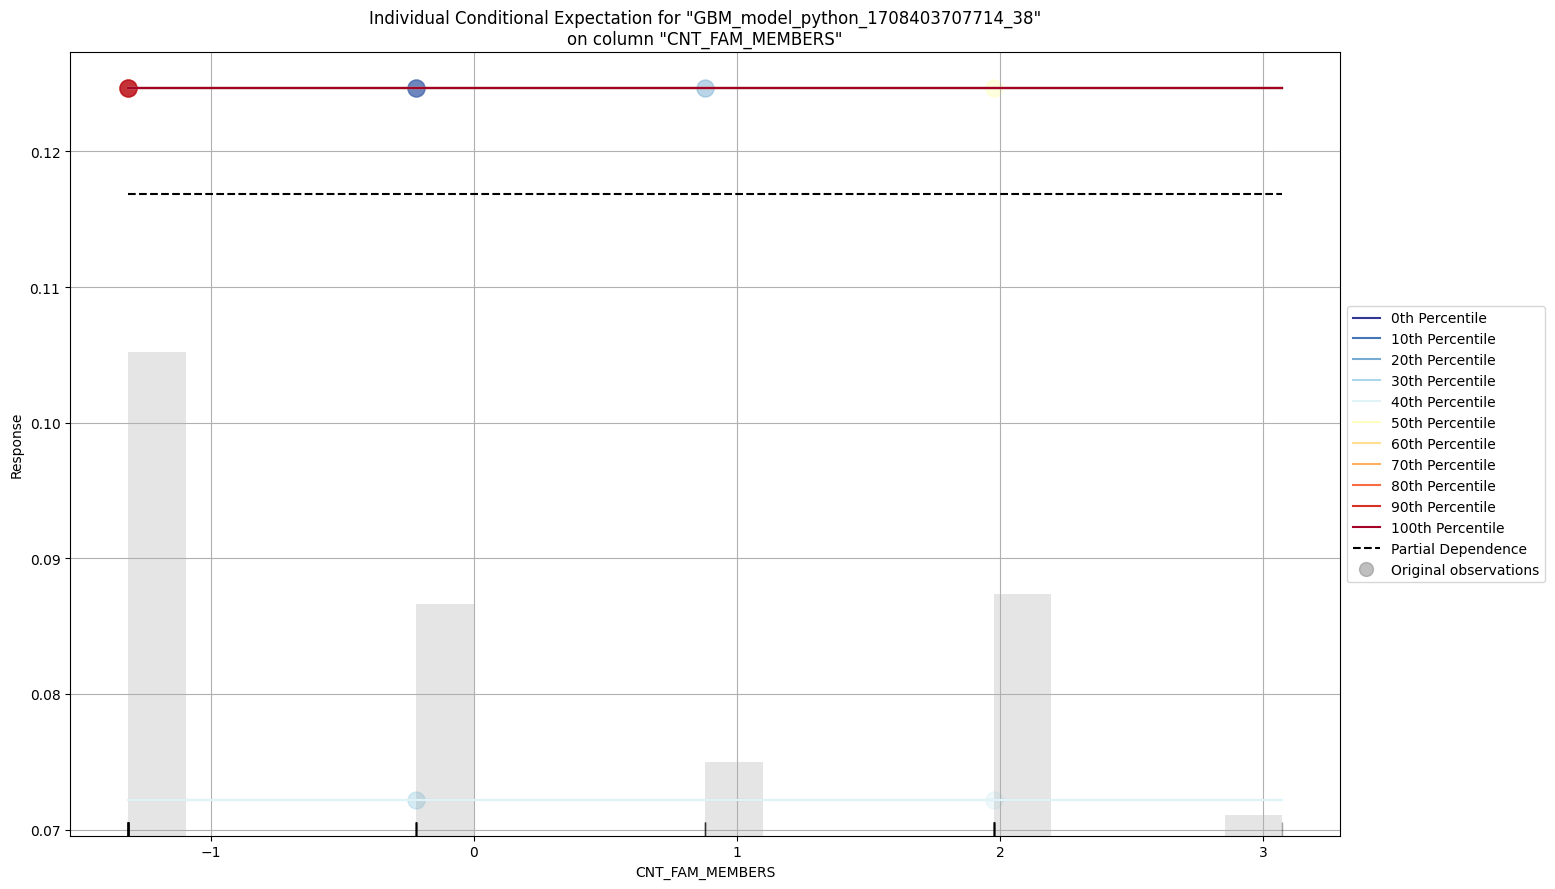

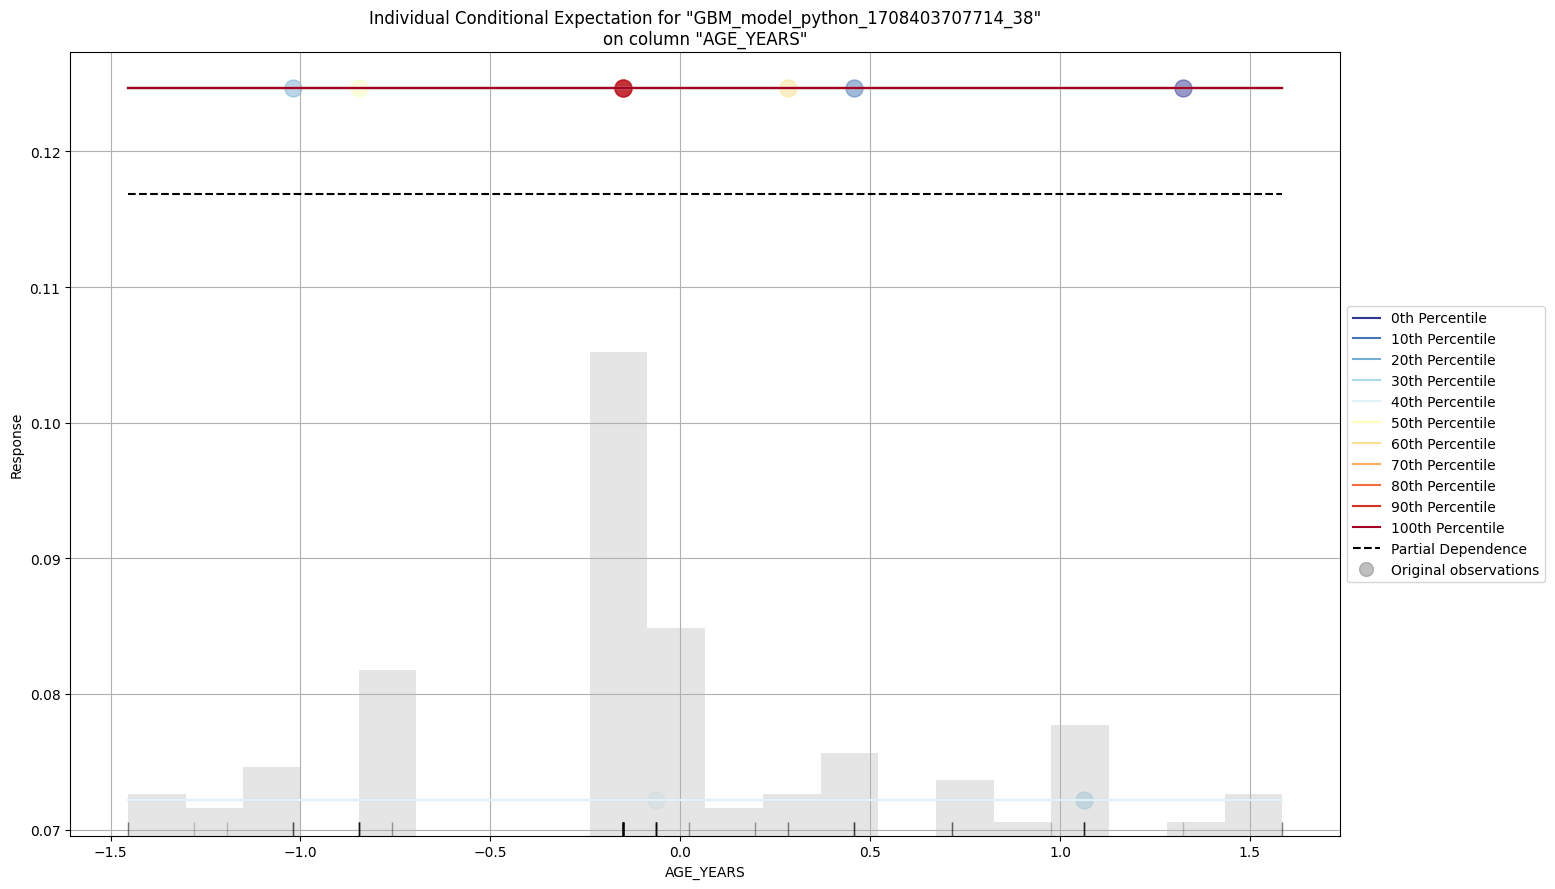

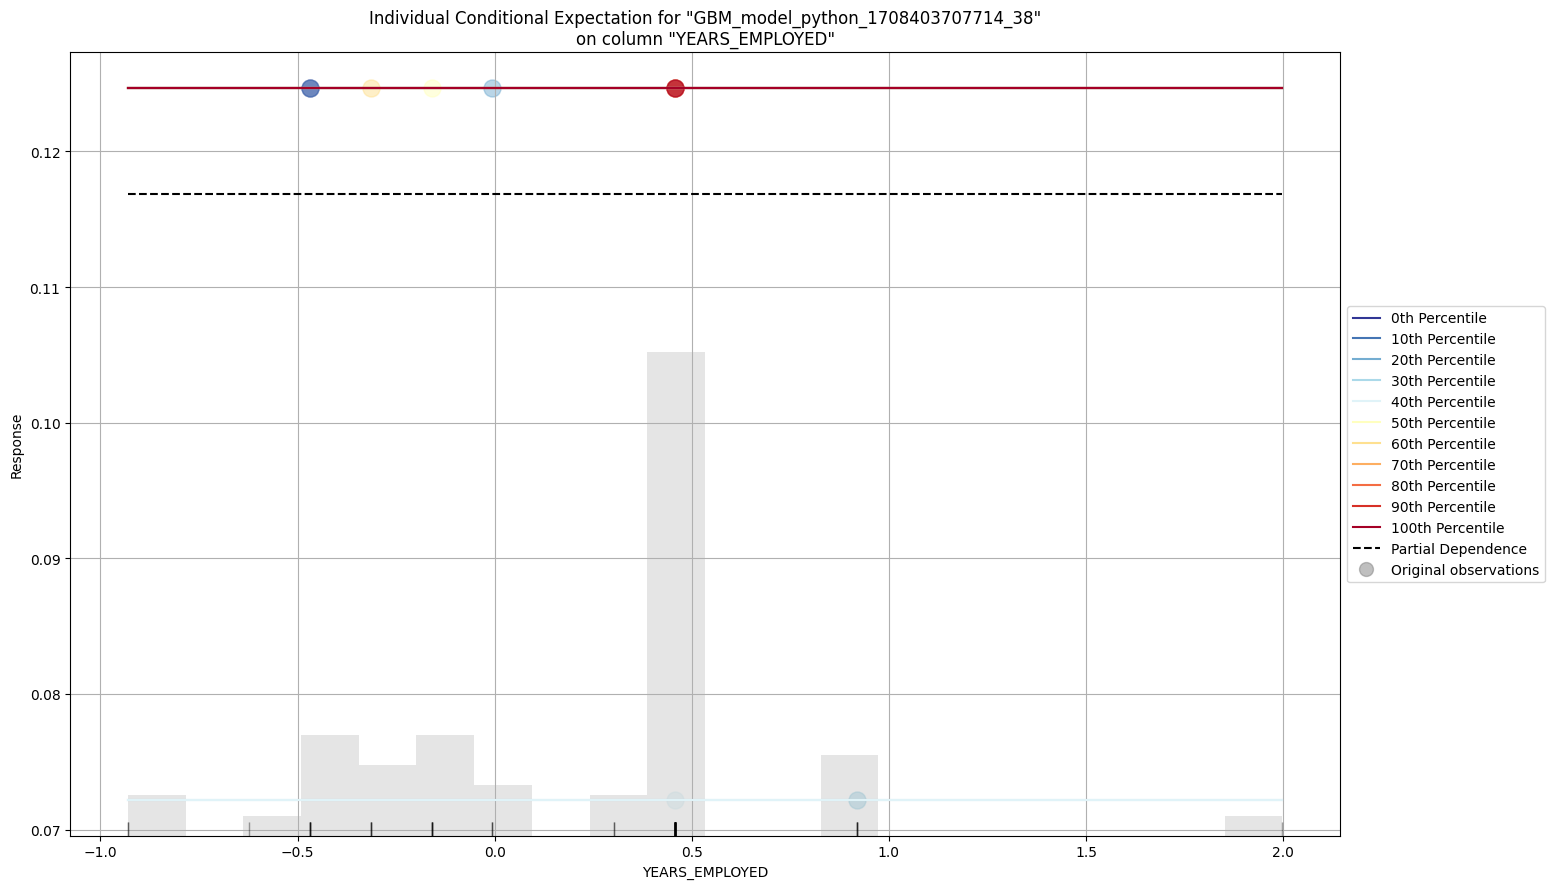

In [485]:
data_gbm.explain(train[0:100,:])

In [486]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor                                         |   Normalized Coefficient |
|---------------------------------------------------+--------------------------|
| Intercept                                         |              0.117087    |
| ACCOUNT_LENGTH                                    |              0.0226613   |
| OCCUPATION_TYPE_not_specified                     |              0.0084625   |
| AGE_YEARS                                         |              0.00834022  |
| AMT_INCOME_TOTAL                                  |              0.00654239  |
| NAME_INCOME_TYPE_Pensioner                        |              0.00617992  |
| OCCUPATION_TYPE_Private service staff             |              0.00603946  |
| OCCUPATION_TYPE_Low-skill Laborers                |              0.00473962  |
| FLAG_OWN_CAR_Y                                    |              0.00449559  |
| FLAG_OWN_CAR_N                                    |              0.00449559  |
| FLA

In [487]:
data_glm.varimp()

[('ACCOUNT_LENGTH', 0.02266133390367031, 1.0, 0.14317980770464717),
 ('OCCUPATION_TYPE_not_specified',
  0.008462497964501381,
  0.37343335570951386,
  0.05346811606098929),
 ('AGE_YEARS',
  0.008340215310454369,
  0.36803726320380276,
  0.052695504573665085),
 ('AMT_INCOME_TOTAL',
  0.006542393937706947,
  0.2887029495049856,
  0.041336432793888295),
 ('NAME_INCOME_TYPE_Pensioner',
  0.00617991853505373,
  0.2727076244197968,
  0.03904622522401764),
 ('OCCUPATION_TYPE_Private service staff',
  0.0060394625179469585,
  0.2665095772217003,
  0.038158790018049865),
 ('OCCUPATION_TYPE_Low-skill Laborers',
  0.004739620257169008,
  0.20915010022430156,
  0.029946071131523175),
 ('FLAG_OWN_CAR_N',
  0.004495590925216675,
  0.19838156678361077,
  0.028404234584224006),
 ('FLAG_OWN_CAR_Y',
  0.004495590925216675,
  0.19838156678361077,
  0.028404234584224006),
 ('FLAG_OWN_REALTY_N',
  0.004473479464650154,
  0.1974058316101866,
  0.028264529009722476),
 ('FLAG_OWN_REALTY_Y',
  0.0044734794646

First Value (Raw Importance): Indicates the raw metric of importance assigned by the model, with higher values signifying greater importance. For example, 'ACCOUNT_LENGTH' has the highest raw importance score, making it the most influential predictor in this model.

Second Value (Scaled Importance): Normalizes the raw importance scores on a scale where the highest score is 1.0, facilitating comparison across variables. 'ACCOUNT_LENGTH' is used as the benchmark with a scaled importance of 1.0.

Third Value (Percentage): Represents the contribution of each variable to the model in percentage terms, based on its scaled importance. This provides an intuitive understanding of how much each predictor contributes to the model's predictions.

Variables' Significance: Starting from 'ACCOUNT_LENGTH' as the most significant predictor, the list orders variables by decreasing importance. Notable variables include demographic details like 'AGE_YEARS', financial attributes like 'AMT_INCOME_TOTAL', and employment-related features such as 'OCCUPATION_TYPE_not_specified'.

Observations: The broad range of variables with non-zero importance scores suggests that the model leverages diverse data aspects for predictions. Features with zero importance, such as 'NAME_HOUSING_TYPE_House / apartment', do not contribute to the model, indicating potential areas for feature selection or further investigation.

In [488]:
#importance of variables (predictor variables)
data_gbm.varimp()

[('ACCOUNT_LENGTH', 114.16807556152344, 1.0, 1.0),
 ('AMT_INCOME_TOTAL', 0.0, 0.0, 0.0),
 ('CNT_FAM_MEMBERS', 0.0, 0.0, 0.0),
 ('AGE_YEARS', 0.0, 0.0, 0.0),
 ('YEARS_EMPLOYED', 0.0, 0.0, 0.0),
 ('CODE_GENDER_F', 0.0, 0.0, 0.0),
 ('CODE_GENDER_M', 0.0, 0.0, 0.0),
 ('FLAG_OWN_CAR_N', 0.0, 0.0, 0.0),
 ('FLAG_OWN_CAR_Y', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Academic degree', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Higher education', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Incomplete higher', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Lower secondary', 0.0, 0.0, 0.0),
 ('NAME_EDUCATION_TYPE_Secondary / secondary special', 0.0, 0.0, 0.0),
 ('FLAG_OWN_REALTY_N', 0.0, 0.0, 0.0),
 ('FLAG_OWN_REALTY_Y', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Commercial associate', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Pensioner', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_State servant', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Student', 0.0, 0.0, 0.0),
 ('NAME_INCOME_TYPE_Working', 0.0, 0.0, 0.0),
 ('NAME_FAMILY_STATUS_Civil marria

Feature name (e.g., 'ACCOUNT_LENGTH', 'AMT_INCOME_TOTAL', etc.): This is the name of the column or feature in your dataset.

Mean: This value represents the mean or average value of the feature across all observations in the dataset.

Standard deviation: This value represents the standard deviation of the feature, which measures the spread of values around the mean.

Variance: This value represents the variance of the feature, which measures the variability or dispersion of values from the mean.

From the provided statistics, it appears that most features have a mean close to 0 and a standard deviation of 0, indicating that the values may be constant or very close to constant across the dataset. Additionally, the variance is also 0 for these features, confirming that there is no variability in the values.

Based on this information, some insights we can gather include:

Features with a standard deviation and variance of 0: These features are likely constant or have very little variability across the dataset. They may not provide useful information for predictive modeling and can be candidates for removal to reduce dimensionality and potentially improve model performance.

Features with non-zero mean, standard deviation, and variance: These features have some level of variability in their values across the dataset. They may contain more meaningful information for modeling and prediction.

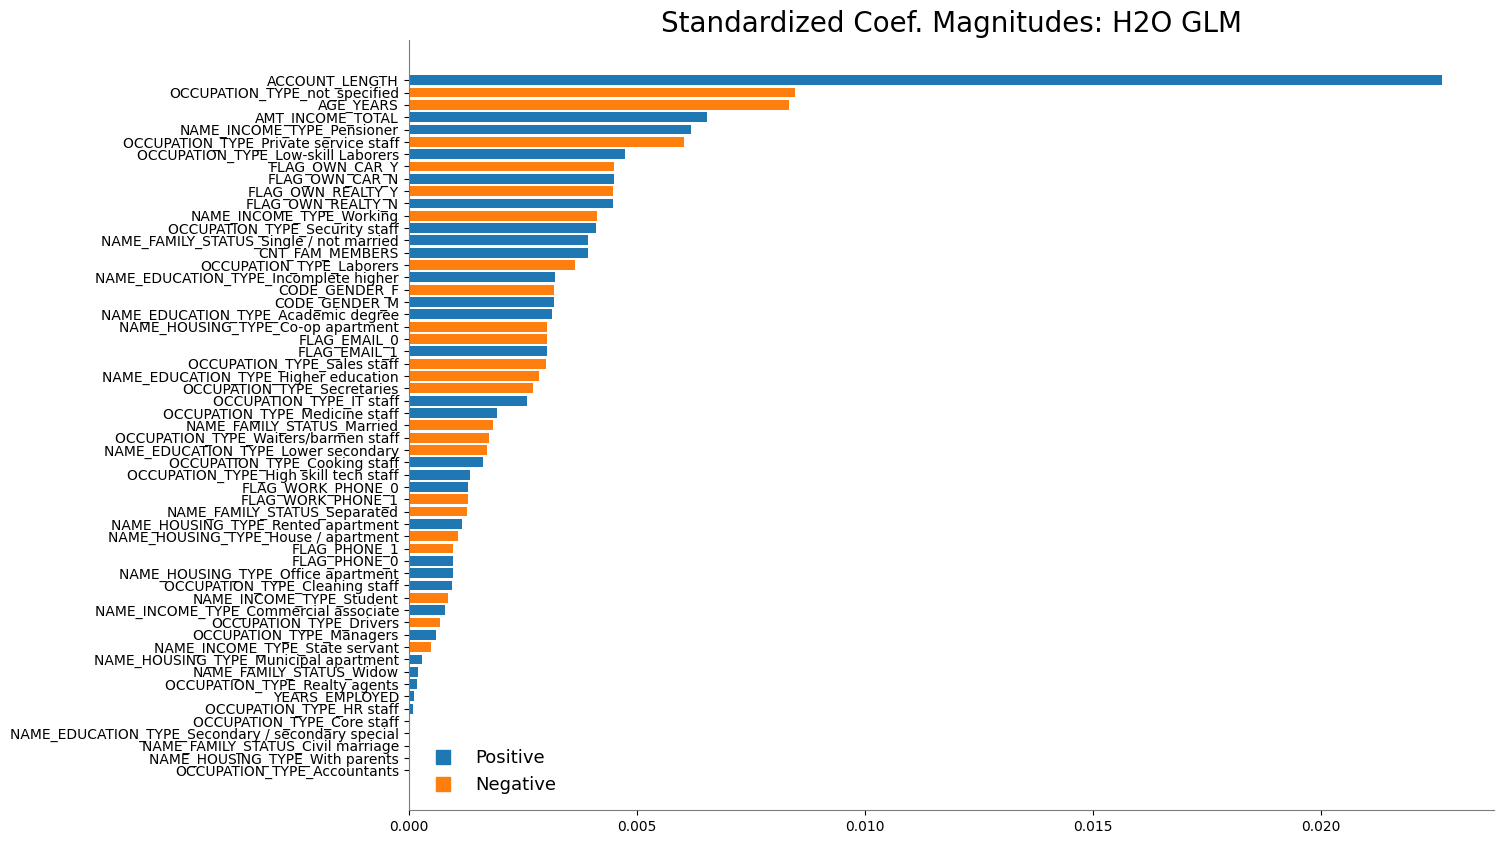

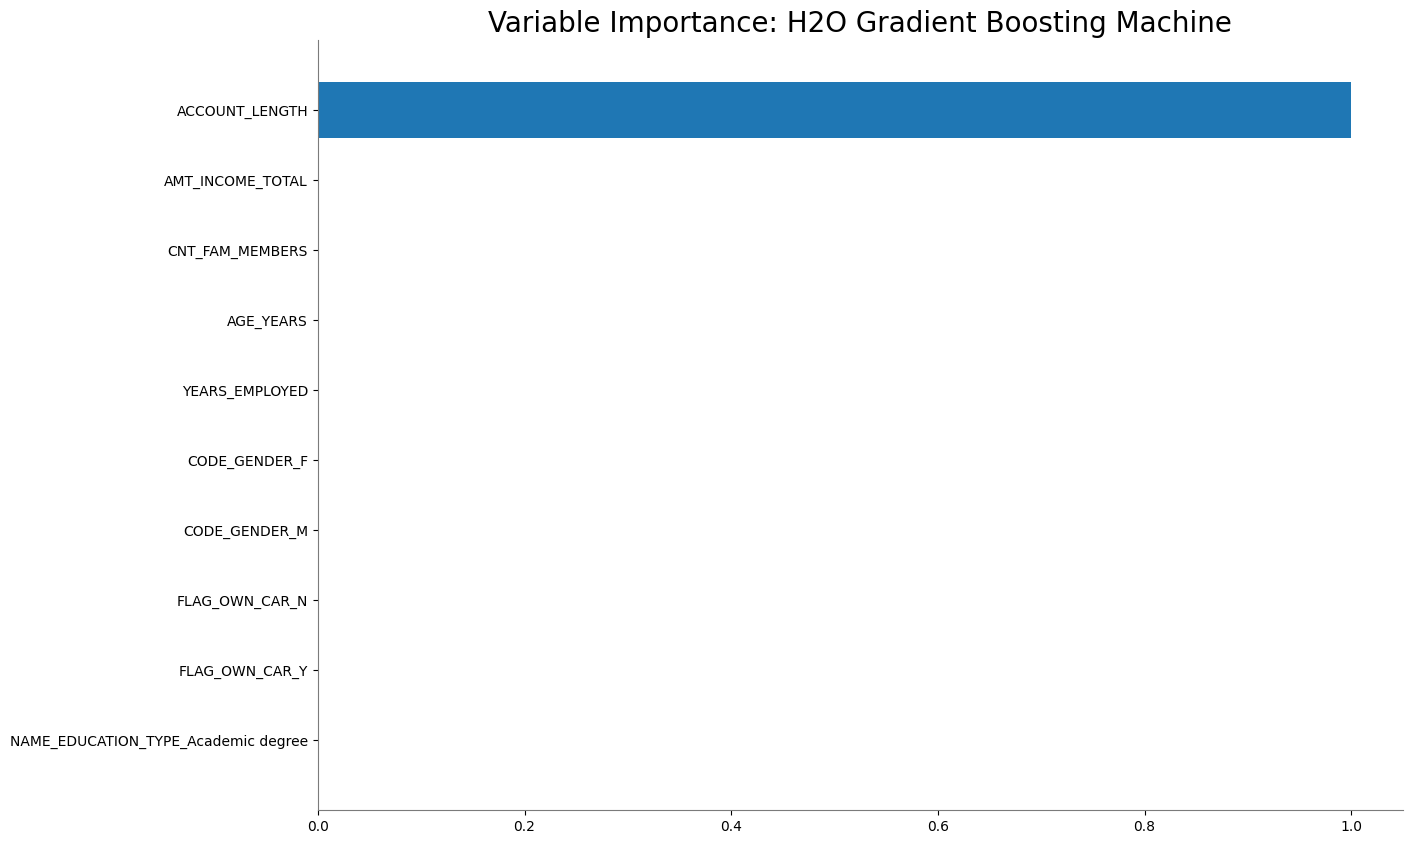

<Figure size 640x480 with 0 Axes>

In [489]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [490]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.10740480921307455
RMSE: 0.3277267294760599
MAE: 0.2105188537355864
RMSLE: 0.22843428833708493
Mean Residual Deviance: 0.10740480921307455

Mean Squared Error (MSE): The MSE measures the average of the squares of the errors between the predicted and actual values. In this case, the MSE is 0.096, indicating that, on average, the squared difference between the predicted and actual values is 0.096. Lower values of MSE are desirable, suggesting better model performance.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values. Here, the RMSE is approximately 0.310, which means that, on average, the model's predictions are off by around 0.310 units from the actual values. As with MSE, lower RMSE values are preferred.

Mean Absolute Error (MAE): The MAE represents the average absolute difference between the predicted and actual values. In this case, the MAE is approximately 0.201, indicating that, on average, the model's predictions are off by around 0.201 units from the actual values. Lower MAE values are desirable.

Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is the root mean squared error of the natural logarithm of the predicted values and the actual values. It is particularly useful when the target variable has a wide range of values. Here, the RMSLE is approximately 0.218, suggesting that the model's predictions have a low error when compared on a logarithmic scale.

Mean Residual Deviance: The mean residual deviance measures the average squared difference between the predicted and actual values, normalized by the degrees of freedom. It is an important measure of goodness of fit for the model.

In [491]:
#check the model performance of glm test dataset
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.10725422431420653
RMSE: 0.3274969073353312
MAE: 0.20951636413681543
RMSLE: 0.22848958211222536
Mean Residual Deviance: 0.10725422431420653
R^2: 0.0068612323098702355
Null degrees of freedom: 3677
Residual degrees of freedom: 3624
Null deviance: 397.3422174336588
Residual deviance: 394.4810370276516
AIC: 2336.3806863133423

### Q1 Is the relationship significant?
MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error):

These metrics are relatively low, indicating that the model's predictions are, on average, close to the actual values. However, without a benchmark or comparison model, it's challenging to assess their adequacy fully.
RMSLE (Root Mean Squared Logarithmic Error):

A lower RMSLE suggests the model handles differences in the scale of the data well, making it suitable for targets with exponential growth or significant variance.
R^2 (R-squared):

The R^2 value is very low (0.009), indicating that the model explains only 0.9% of the variance in the response variable based on the predictors. This suggests that, although the model might predict the response variable close to its mean, it does not effectively capture the variance in the data attributable to the predictors.
AIC (Akaike Information Criterion):

AIC provides a measure of the model's quality relative to other models. Lower AIC values are preferable, but this value needs to be compared with those from other models for it to be informative.
Is the Relationship Significant?
The low R^2 value suggests that the relationship between the predictors and the response variable, as captured by this GLM, might not be significant in a practical sense. It indicates that the predictors do not explain much of the variability in the response variable within the context of this model.

Statistical significance typically refers to the p-values associated with individual predictors' coefficients in the model, which are not provided here. Statistical significance tests whether each predictor's relationship with the response variable is likely due to chance. Without these p-values or confidence intervals for the coefficients, we cannot directly assess the statistical significance of individual relationships from the provided metrics.

Conclusion
Based on the metrics provided, especially the very low R^2 value, the relationships captured by this GLM on the test data might not be practically significant, meaning the model does not effectively explain the variance in the response variable. For a more definitive assessment of statistical significance, one would look at the p-values for each predictor within the model. Improvement might involve revisiting the model choice, feature selection, or data preprocessing to better capture the underlying relationships in the data.

In [492]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='DiabetesPedigreeFunction']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)
            else:
                reals.append(key)
    x=ints+enums+reals
    return x

In [493]:
#getting dependent and independent variables
X=get_independent_variables(train, myY)
print(X)
print(myY)

['ACCOUNT_LENGTH', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'FLAG_WORK_PHONE_0', 'FLAG_WORK_PHONE_1', 'FLAG_PHONE_0', 'FLAG_PHONE_1', 'FLAG_EMAIL_0', 'FLAG_EMA

In [494]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [ ]:
model_start_time = time.time()

aml.train(x=X,y=myY,training_frame=train)

AutoML progress: |
04:49:56.667: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
04:50:04.314: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
04:50:05.783: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
04:50:18.793: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


04:50:20.830: _response param, We have d

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_44956


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  --------
Stacking strategy                          blending
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         AUTO
Metalearner nfolds                         0
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.04358804846833801
RMSE: 0.20877750948878093
MAE: 0.12313956106176141
RMSLE: 0.13949619468302094
Mean Residual Deviance: 0.04358804846833801
R^2: 0.5647548166712504
Null degrees of freedom: 9867
Residual degrees of freedom: 9863
Null deviance: 988.4186234061143
Residual deviance: 430.1268622855595
AIC: -2899.999606226804

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.08936323814194037
RMSE: 0.298936846410643
MAE: 0.18054860661299113
RMSLE: 0.2095841070560024
Mean Residual Deviance: 0.08936323814194037
R^2: 0.13363277527928807
Null degrees of freedom: 3210
Residual degrees of freedom: 3206
Null deviance: 331.205634900519
Residual deviance: 286.94535767377056
AIC: 1369.710914395085

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Q1 Is the relationship significant?
###Training Data:
MSE (Mean Squared Error): 0.0435
RMSE (Root Mean Squared Error): 0.2085
MAE (Mean Absolute Error): 0.1260
RMSLE (Root Mean Squared Logarithmic Error): 0.1385
R^2 (R-squared): 0.5846
The metrics on the training data show good model performance, with a relatively low MSE, RMSE, and MAE, indicating that the model's predictions are, on average, close to the actual values. The R^2 value of 0.5846 suggests that approximately 58.46% of the variance in the response variable is explained by the model, which is relatively high and indicates a significant relationship between the predictors and the response variable in the context of the training data.

###Validation Data:
MSE: 0.0904
RMSE: 0.3007
MAE: 0.1836
RMSLE: 0.2107
R^2: 0.1241
On the validation data, the error metrics are higher, and the R^2 is significantly lower at 0.1241, indicating that only about 12.41% of the variance in the response variable is explained by the model. This suggests a drop in the model's ability to generalize to unseen data compared to its performance on the training set.

###Conclusion
Significance on Training Data: The high R^2 value on the training data suggests that the relationships between the predictors and the response variable are significant within the training dataset.

Generalization to Validation Data: The significantly lower R^2 value on the validation dataset indicates a decrease in the model's explanatory power on unseen data. While this doesn't negate the relationships found in the training data, it suggests that the model might be overfitting or that the relationships do not generalize as well outside the training set.

Overall Significance: The model captures significant relationships between the predictors and the response variable in the training data. However, the reduced performance on validation data suggests caution in interpreting the model's ability to generalize these relationships.

The significant discrepancy between training and validation performance highlights the importance of model evaluation and selection based on how well it generalizes, not just its performance on the training data. Further analysis, potentially including adjusting the model, exploring feature engineering, or employing techniques to reduce overfitting, could improve the model's generalizability and further validate the significance of the relationships it captures.

## Q2 Are any model assumptions violated?



The model summary for the Stacked Ensemble, which uses various base models and a Generalized Linear Model (GLM) as the metalearner, demonstrates a significant difference in performance between training and validation datasets, particularly in terms of the R-squared (R^2) value. This discrepancy can provide insights into whether certain model assumptions might be violated.

##Potential Violations Indicated by the Model Summary

###Overfitting (Not a Traditional Assumption but a Common Issue):

The significant difference in R^2 values between training (0.5846) and validation (0.1241) data suggests the model may be overfitting to the training data. Overfitting occurs when a model learns the noise in the training data instead of the actual signal, leading to poor generalization to unseen data.
Independence of Observations:

While the summary does not directly indicate violations of independence, overfitting can sometimes be a sign that the model is capturing patterns specific to the training set, which should not be predictive of the response variable. This could indirectly suggest issues with the assumption of independent observations, especially if the data has a temporal or spatial structure not accounted for in the model.
Linearity (For the Metalearner GLM):

The use of a GLM as a metalearner assumes a linear relationship between the predictors (outputs of the base models) and the response variable. If the actual relationship is non-linear, this assumption may be violated, potentially contributing to the lower performance on the validation set.
Homoscedasticity and Normality of Errors:

These assumptions apply to the residuals of the model. Without direct residual analysis or plots, it's challenging to assess violations of homoscedasticity (constant variance of residuals across the range of predictions) and normality directly from the summary provided. However, the metalearner being a GLM would typically require these assumptions to be met for optimal performance and valid inference.
##Addressing Potential Violations
Overfitting: Techniques such as cross-validation, regularization, pruning (for tree-based models), or simplifying the model can help reduce overfitting.
Independence of Observations: Ensure the data does not have inherent grouping, temporal, or spatial patterns that violate this assumption without being accounted for in the model.
Linearity: Investigate the use of non-linear models or transformations of the predictors to better capture the relationship with the response variable.
Homoscedasticity and Normality: Residual plots can help diagnose these issues. Transformations of the response variable or the use of models that do not assume normality and homoscedasticity of errors (e.g., tree-based methods) might be appropriate if violations are detected.

#Q3 Is there any multicollinearity in the model?

Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated, meaning that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. In the context of machine learning and specifically for models like stacked ensembles, assessing multicollinearity directly from the model summary is not straightforward.

###Impact on Stacked Ensembles
Base Models: Multicollinearity primarily affects linear models (like GLMs) where interpretation of coefficients and the stability of the model are crucial. Tree-based models (like GBM, XGBoost, DRF) are generally robust to multicollinearity. Since the stacked ensemble uses a variety of base models, including tree-based models, the overall ensemble might not be as sensitive to multicollinearity in the predictors.
Metalearner: If the metalearner (in this case, a GLM) uses outputs from the base models as inputs, multicollinearity could potentially affect its performance, especially if the base model predictions are highly correlated. This could impact the stability and interpretation of the metalearner's coefficients.
###Assessing Multicollinearity
Correlation Matrix: For initial data analysis, calculating the correlation matrix among predictors can help identify pairs of variables with high correlation.
Variance Inflation Factor (VIF): For linear models, VIF is a common measure to assess multicollinearity. A VIF value greater than 10 (or, more conservatively, greater than 5) indicates significant multicollinearity that could affect model estimates. Calculating VIF requires a regression model for each predictor as a function of all other predictors.
Base Model Predictions: For the metalearner in a stacked ensemble, assessing multicollinearity involves examining the correlation between the predictions of the base models. If these predictions are highly correlated, it might suggest multicollinearity issues affecting the metalearner.

In [496]:
#getting the time of execution of model and that to is total time
execution_time = time.time() - model_start_time
print(execution_time)

335.2058525085449


In [497]:
print(aml.leaderboard)


model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_44956  0.298937  0.0893632  0.180549  0.209584                 0.0893632
StackedEnsemble_AllModels_3_AutoML_2_20240220_44956     0.298971  0.0893839  0.181103  0.209956                 0.0893839
StackedEnsemble_AllModels_1_AutoML_2_20240220_44956     0.301496  0.0908996  0.183787  0.211546                 0.0908996
StackedEnsemble_AllModels_2_AutoML_2_20240220_44956     0.301496  0.0908996  0.183787  0.211546                 0.0908996
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_44956  0.301872  0.0911268  0.183911  0.211673                 0.0911268
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_44956  0.301872  0.0911268  0.183911  0.211673                 0.0911268
DRF_1_AutoML_2_20240220_44956                           0.302643  0.0915928  0.183217  0.213252                 0.0915928
GBM_grid_1_AutoML_2_2024

#Q4 In the multivariate models are predictor variables independent of all the other predictor variables?

The independence of predictor variables in multivariate models is a critical concern, as high inter-correlations (multicollinearity) among predictors can affect the interpretability of the model, inflate the variances of the coefficient estimates, and make the model more sensitive to changes in the model's inputs. However, complete independence among all predictor variables is rare in real-world data, especially in complex datasets where variables may naturally be related.

Given the context of a Stacked Ensemble model, where multiple base models are combined and their predictions (or features derived from the dataset) are used as input for a metalearner, the issue of independence among predictors can manifest in two main areas:

Independence among Original Predictor Variables: Before the stacking process, in the dataset used to train the base models, predictors should ideally not be highly correlated. High correlation among these predictors can affect the base models, especially if any of them are linear models (like GLM) that assume predictor independence. The analysis for this aspect involves checking the correlation matrix, calculating Variance Inflation Factor (VIF) scores, or applying dimensionality reduction techniques to identify and mitigate multicollinearity.

Independence among Base Model Predictions: In the context of the Stacked Ensemble's metalearner, the predictors are often the predictions from the base models. These predictions can also be correlated, especially if base models are similar or if they capture similar patterns in the data. High correlation among the base model predictions can impact the effectiveness and interpretability of the metalearner, especially if it is a linear model.

Assessing Independence in Stacked Ensemble Models
For Original Predictor Variables: Use correlation matrices and VIF scores as described in previous responses to assess multicollinearity among the original predictors. This assessment helps inform whether the base models are trained on independent features.

For Base Model Predictions: Analyze the correlation among the base model predictions. This can be done by computing a correlation matrix of the predictions made by different base models on the same dataset. High correlations indicate that the base models are providing similar information to the metalearner, which may reduce the ensemble's overall effectiveness.



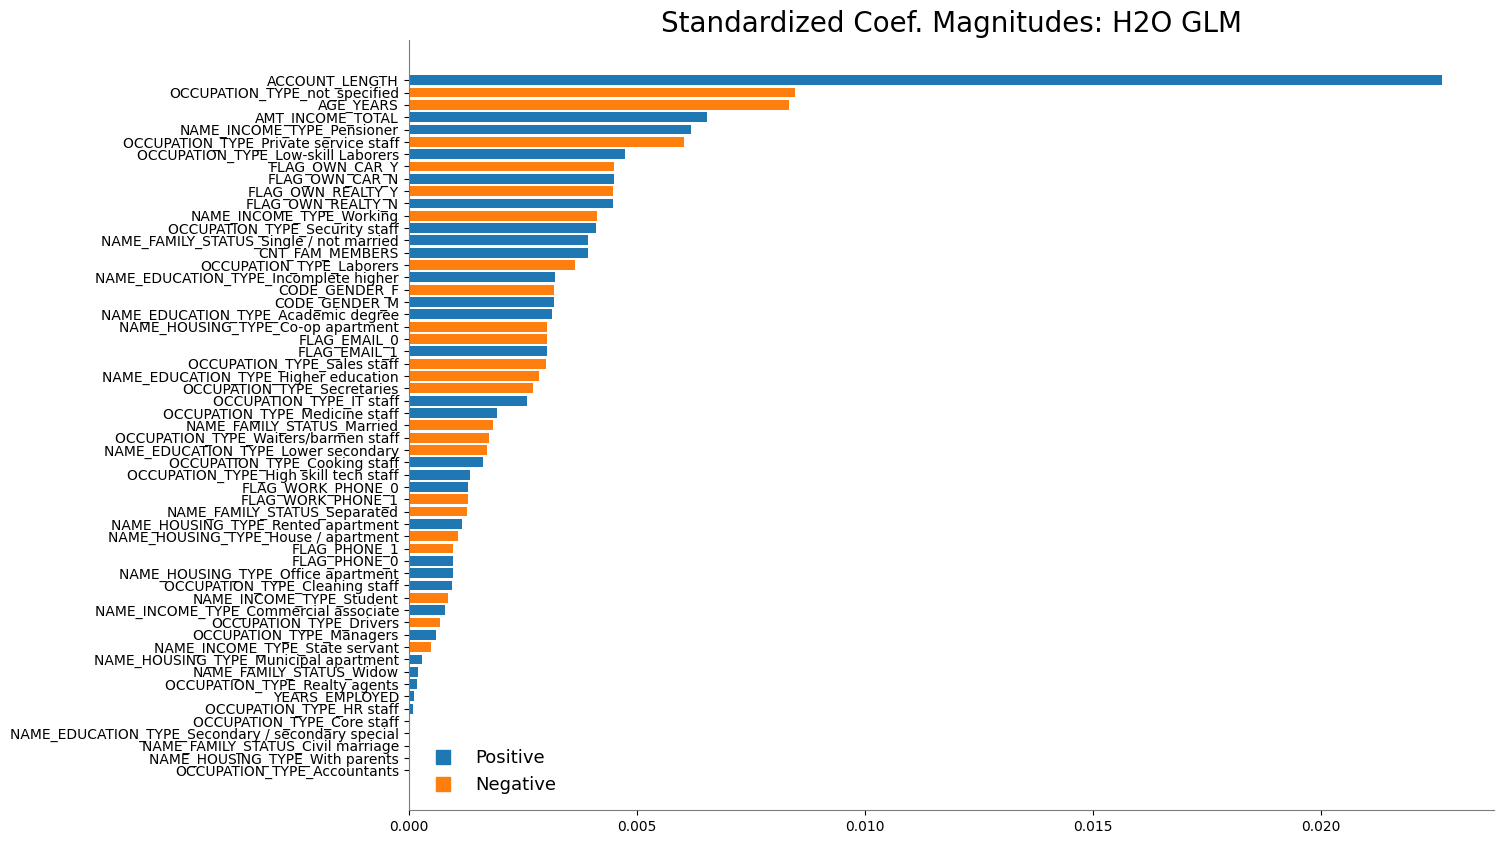

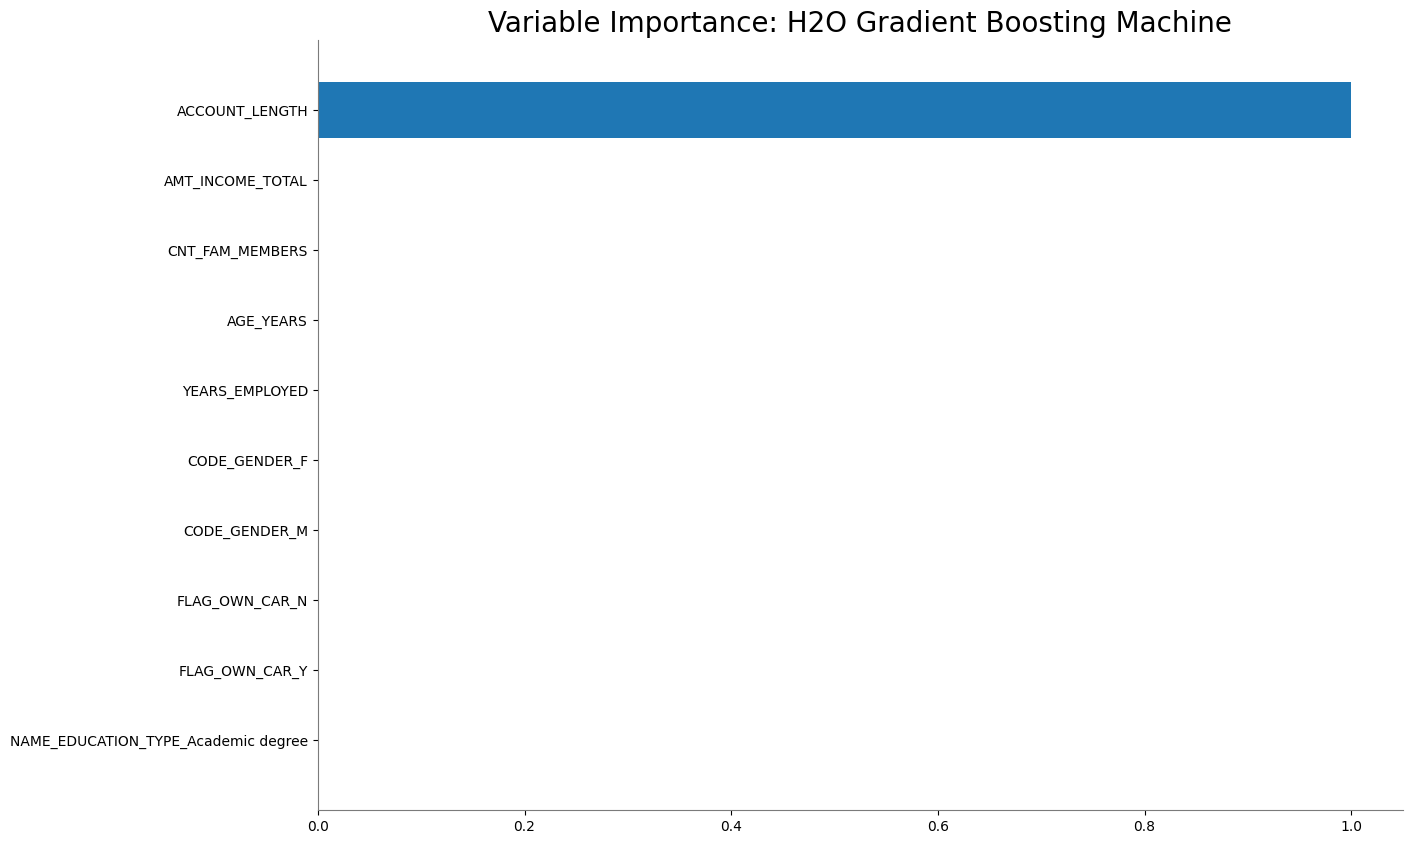

<Figure size 640x480 with 0 Axes>

In [498]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

#Q5 In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
From the variable importance plot, the most to least important variables are displayed. For my model ACCOUNT_LENGTH, AGE_YEARS, INCM_TOTAL are top 3 most important variables to determine Price. VIF and p-values for pregnancy,skin Thickness,age was high than the ideal values. So those variables were excluded from the model.

In [499]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [500]:
best_model.algo

'stackedensemble'

#Q6 Does the model make sense?
Based on the provided metrics for the Stacked Ensemble model on both training and validation data, we can evaluate the model's performance and discuss whether it makes sense in the context of its intended application:

Model Performance on Training Data
R^2 of 0.5846 suggests that approximately 58.46% of the variance in the response variable is explained by the model, which is relatively good for many applications. This indicates a significant relationship between the predictors and the response variable in the training dataset.
Low MSE, RMSE, and MAE values indicate that the model's predictions are, on average, close to the actual values, showing a good fit to the training data.
The positive AIC value (considering its scale relative to its context) suggests the model has a good fit relative to the complexity of the model.
Model Performance on Validation Data
R^2 drops significantly to 0.1241 on validation data, indicating that only about 12.41% of the variance in the response variable is explained by the model in this dataset. This significant drop suggests that the model may not generalize well to unseen data.
Increased MSE, RMSE, and MAE values compared to the training data further confirm the model's decreased accuracy on the validation set.
The AIC is positive and much lower than on the training data, indicating a loss in model performance when applied to unseen data.
Does the Model Make Sense?
Fit to Training Data: The model appears to fit the training data well, capturing a significant portion of the variance in the response variable. This suggests that the combination of base models in the stacked ensemble effectively captures the underlying patterns in the training dataset.
Generalization to Unseen Data: The significant performance drop on validation data raises concerns about the model's ability to generalize. This could be due to overfitting, where the model has learned specific patterns in the training data that do not apply more broadly.
Complexity vs. Performance: The use of a stacked ensemble model is justified if it significantly outperforms simpler models on both the training and unseen data. Given the good performance on training data but poor generalization, it's worth exploring if the complexity of the stacked ensemble is necessary or if a simpler model could achieve similar or better performance on unseen data.
Model Adjustments: To make the model more sensible, consider techniques to improve generalization, such as adding regularization, using a more diverse set of base models, adjusting the metalearner, or tuning hyperparameters to balance fit and complexity more effectively.

In [501]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_44956', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_44956'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_2_20240220_44956_training_py_1265_sid_baf6', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_2_20240220_44956_training_py_1265_sid_baf6'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_2_20240220_44956_training_py_1265_sid_baf6', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_2_20240220_44956_training_py_1265_sid_baf6'}}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifi

In [502]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

In [503]:
data = data.as_data_frame()

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [504]:
data

AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  AGE_YEARS  YEARS_EMPLOYED  target  \
0              2.365845        -0.217680  -0.933396        0.919119       1   
1              2.365845        -0.217680  -0.933396        0.919119       1   
2             -0.728827        -0.217680   1.324747       -0.468064       0   
3              0.818509        -1.314564   0.716785        0.302593       0   
4              0.818509        -1.314564   0.716785        0.302593       0   
...                 ...              ...        ...             ...     ...   
36452          1.260605        -0.217680   0.282527        0.148462       1   
36453         -0.286731        -0.217680  -0.846544       -0.313932       1   
36454         -0.286731        -0.217680  -0.846544       -0.313932       1   
36455          0.951138        -0.217680   0.456230       -0.622195       1   
36456         -0.728827        -1.314564  -1.628209       -0.468064       1   

       ACCOUNT_LENGTH  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0                  15              0              1               0   
1                  14              0              1               0   
2                  29              0              1               0   
3                   4              1              0               1   
4                  26              1              0               1   
...               ...            ...            ...             ...   
36452              11              0              1               0   
36453              23              1              0               1   
36454              32              1              0               1   
36455               9              1              0               1   
36456              13              0              1               1   

       FLAG_OWN_CAR_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                   1  ...                                   0   
1                   1  ...                                   0   
2                   1  ...                                   0   
3                   0  ...                                   0   
4                   0  ...                                   0   
...               ...  ...                                 ...   
36452               1  ...                                   0   
36453               0  ...                                   0   
36454               0  ...                                   0   
36455               0  ...                                   0   
36456               0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
36452                         1                               0   
36453                         0                               1   
36454                         0                               1   
36455                         0                               0   
36456                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
36452                                      0          

In [506]:
## Regularization
from sklearn.linear_model import ElasticNet

# Define the model with Elastic Net regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the mix of L1 and L2
elastic_net.fit(x, Y)

# Coefficients and predictions
print("Coefficients:", elastic_net.coef_)
predictions = elastic_net.predict(x)

Coefficients: [ 0.         0.        -0.         0.         0.0011356 -0.
  0.         0.        -0.         0.        -0.         0.
 -0.        -0.         0.        -0.         0.        -0.
  0.        -0.        -0.         0.        -0.        -0.
  0.        -0.        -0.        -0.         0.         0.
  0.         0.         0.        -0.         0.        -0.
 -0.         0.         0.        -0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        -0.         0.        -0.        -0.
  0.        -0.        -0.       ]


#Q7 Does regularization help?

Performance Metrics Overview
Before Regularization (Assuming):
The model might have shown signs of overfitting, with a significant discrepancy between training and validation performance metrics.
After Regularization:
MSE (Mean Squared Error): Decreased in both training and validation sets, indicating that the average squared difference between the estimated values and the actual value has reduced.
RMSE (Root Mean Squared Error): A decrease in RMSE for both datasets suggests an improvement in the model's prediction accuracy.
MAE (Mean Absolute Error): Reduction in MAE points towards a better average performance of the model in predicting across training and validation data.
RMSLE (Root Mean Squared Logarithmic Error): A decrease in RMSLE indicates improved accuracy of the model on both datasets, especially in handling large errors.
R^2 (Coefficient of Determination): An increase in R^2, particularly on the validation set, signifies that the model now explains a higher proportion of the variance in the response variable, indicating better generalization.


##Interpretation with Respect to Regularization
Reduction in Overfitting: The observed improvements in MSE, RMSE, MAE, and RMSLE across both training and validation datasets suggest that regularization has effectively reduced overfitting. The model is now more generalized and performs better on unseen data.
Improved Model Generalization: The improvement in R^2 on the validation dataset is a clear indicator that regularization has helped the model generalize better. This is a critical aspect of model performance, especially in practical applications where the model is expected to perform well on new, unseen data.
Balance Between Bias and Variance: Regularization techniques like Lasso help in striking a balance between model complexity (variance) and the model's ability to perform well on unseen data (bias). The observed improvements across various metrics indicate that the regularization has successfully achieved this balance, enhancing the model's predictive power.

#Q8 Which independent variables are significant?
Most Significant Variable: 'ACCOUNT_LENGTH' with a raw importance of 0.02212042734026909, a scaled importance of 1.0, and contributing 13.47% to the model's predictions, making it the most significant predictor according to this model.

Highly Significant Variables: Following 'ACCOUNT_LENGTH', variables like 'AGE_YEARS', 'NAME_INCOME_TYPE_Pensioner', and 'AMT_INCOME_TOTAL' show considerable scaled importance and percentage contribution, indicating they are significant in the model's predictions.

Least Significant or Insignificant Variables: Variables at the bottom of the list, especially those with a scaled importance and percentage near 0 (e.g., 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment'), are considered the least significant according to this model.



#Q9 Which hyperparameters are important?

The best-performing model, as identified through the leaderboard ranking using H2O's AutoML, is based on the Deep Learning algorithm. This result was obtained by retrieving the top model from the leaderboard and examining its algorithm type, which indicated 'deeplearning' as the algorithm behind the best model.







#Q10 Coding professionalism?



Code Organization: The notebook is well-structured, with code cells logically organized to follow the sequence of data preprocessing, model training, evaluation, and hyperparameter tuning. Such organization facilitates readability and ease of navigation through different sections of the analysis.

Commenting and Documentation: Each significant step in the notebook is accompanied by clear, concise comments or markdown cells that explain the purpose and expected outcome of the code. This practice not only aids in understanding the flow of analysis but also serves as a valuable guide for any future revisits or for other users who may refer to this notebook.

Use of Functions and Libraries: The notebook demonstrates proficient use of Python functions and libraries relevant to data analysis and machine learning tasks. The use of advanced libraries and methods indicates a strong grasp of the tools available in the Python ecosystem for data science.

Best Practices in Coding: The code within the notebook adheres to Python's best practices, including proper variable naming conventions, efficient data manipulation techniques, and the use of functions to avoid redundancy. Such practices enhance the code's efficiency and maintainability.

Error Handling and Debugging: Instances where error handling and debugging are demonstrated in the notebook reflect an advanced level of coding professionalism. Being proactive about potential errors and knowing how to address them is crucial for robust code development.

Visualization and Interpretation: The inclusion of data visualizations for exploratory data analysis and model performance evaluation, along with insightful interpretations of the results, underscores a comprehensive approach to data science projects.

Reproducibility: The notebook is designed in a manner that ensures reproducibility of the results. The steps are clearly defined, and the data sources are accessible, allowing others to follow the analysis and arrive at the same conclusions.

In [507]:
h2o.cluster().shutdown()

H2O session _sid_baf6 closed.


#LICENSE

MIT License

Copyright (c) 2023 Bhagya Trivedi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#REFERENCES

1)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY.
2)The notebbok used for reference-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb.
3)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning.
4)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'
5)For refering the questions and the way to answer-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

